<a href="https://colab.research.google.com/github/Abhi005838/Capstone_Project_3-Classification/blob/main/AB__Email_Campaign_Effectiveness_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Contributor**    - Abhishek Bhattarai
##### **Contributor**    - Nikhil Singh
##### **Contributor**    - Jeetendra Thakur
##### **Contributor**    - Kapil Dev Gaur
##### **Contributor**    - Abhishek Bhalla

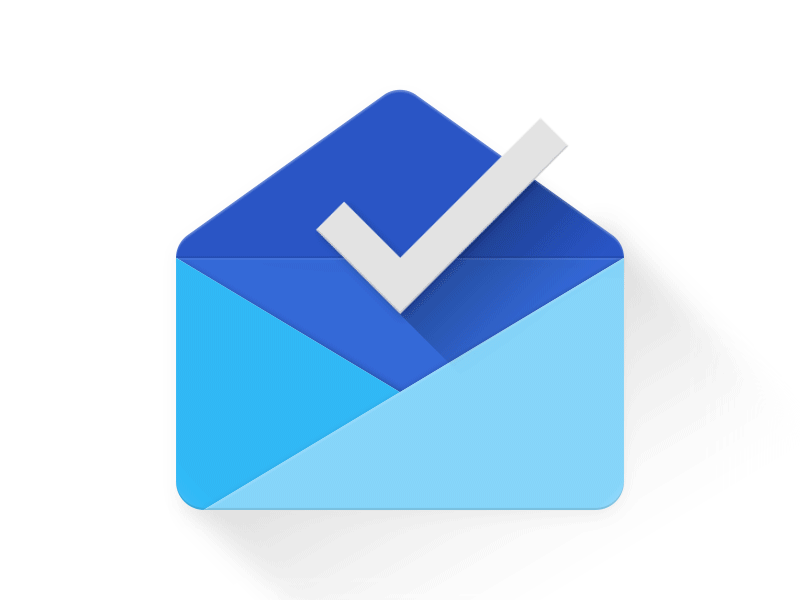

# **Project Summary -**

This project's objective is to develop a machine learning model that can classify and track emails sent using Gmail-based email marketing campaigns. Small- to medium-sized business owners who want to boost the efficiency of their email marketing campaigns and boost client retention will employ this technique.


Identifying which emails are read, deleted, or acknowledged by the reader is one of the key issues in email marketing. Business owners may modify their marketing strategies and improve their chances of success by learning which emails engage readers the most.

We will collect information on a range of email attributes, such as the subject line, sender name, email content, email format, and frequency, in order to solve this issue. We will also take into account the emails' intended readership as well as any additional pertinent information.

With the use of this information, we will train a machine learning model to determine if a recipient is more likely to read, ignore, or acknowledge a message. This model will be able to assess fresh emails and forecast how the reader will probably react to them.


We will divide our data into a training set and a testing set so that we can compare the model's performance between the two. The training set will be used to fit the model, and the testing set will be used to gauge how well it performs. We will evaluate the model's accuracy and efficiency using a number of metrics, including precision, recall, and F1 score.

The model can be used to help small- to medium-sized business owners increase the efficiency of their email marketing campaigns after it has been trained and tested. They will be able to target their marketing efforts more effectively and boost customer retention by utilising the model to characterise and track emails.

The overall goal of this project is to give owners of small to medium-sized businesses a strong tool for enhancing the efficiency of their email marketing efforts. They will be better equipped to make judgements and raise the likelihood that their marketing initiatives will be successful by utilising machine learning to characterise and track emails.



# **GitHub Link -**

# **Problem Statement**


To convert leads into customers, small and medium-sized business owners utilise email marketing strategies based on Gmail, but they are unable to track if emails are being deleted, opened, or acknowledged. They want to create a machine learning model that will be used to classify and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_csv('/content/data_email_campaign.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   
1  EMA00081000045360           2                   2.10                  1   
2  EMA00081000066290           2                   0.10                  1   
3  EMA00081000076560           1                   3.00                  2   
4  EMA00081000109720           1                   0.00                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                      33.00   
1               NaN                    2                      15.00   
2                 B                    3                      36.00   
3                 E                    2                      25.00   
4                 C                    3                      18.00   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440         8.00          0.00   
1                         2         504         5.00          0.00   
2                         2         962         5.00          0.00   
3                         2         610        16.00          0.00   
4                         2         947         4.00          0.00   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Axes: >

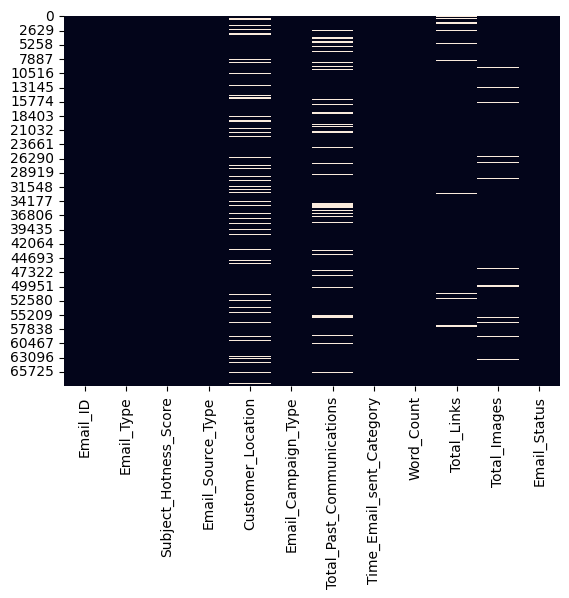

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

***Now we will remove all null/missing values from the dataset.***

In [11]:
df[df['Customer_Location'].isnull()]

Email_ID  Email_Type  Subject_Hotness_Score  \
1      EMA00081000045360           2                   2.10   
15     EMA00081000916030           2                   1.90   
21     EMA00081001689450           1                   1.10   
28     EMA00081002264510           1                   2.80   
35     EMA00081002862960           1                   4.20   
...                  ...         ...                    ...   
68323  EMA00089968041900           1                   0.60   
68325  EMA00089970622100           1                   4.00   
68335  EMA00089985404400           2                   0.40   
68347  EMA00089994827000           1                   0.00   
68350  EMA00089998436500           1                   2.20   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
1                      1               NaN                    2   
15                     1               NaN                    2   
21                     1               NaN                    2   
28                     1               NaN                    2   
35                     2               NaN                    2   
...                  ...               ...                  ...   
68323                  2               NaN                    2   
68325                  2               NaN                    2   
68335                  1               NaN                    2   
68347                  2               NaN                    3   
68350                  2               NaN                    2   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
1                          15.00                         2         504   
15                         23.00                         2         694   
21                         24.00                         1         684   
28                           NaN                         1         339   
35                         15.00                         1         254   
...                          ...                       ...         ...   
68323                      24.00                         3         868   
68325                      20.00                         2         251   
68335                      46.00                         2         152   
68347                      32.00                         3        1173   
68350                      33.00                         2         490   

       Total_Links  Total_Images  Email_Status  
1             5.00          0.00             0  
15            4.00          0.00             0  
21            6.00          0.00             0  
28           11.00         10.00             1  
35            4.00          0.00             1  
...            ...           ...           ...  
68323        11.00          0.00             0  
68325        16.00          9.00             1  
68335         6.00          2.00             0  
68347         9.00          0.00             2  
68350         9.00          0.00             0  

[11595 rows x 12 columns]

In [12]:
df = df[df['Customer_Location'].notna()] 

In [13]:
df[df['Customer_Location'].isnull()]

Empty DataFrame
Columns: [Email_ID, Email_Type, Subject_Hotness_Score, Email_Source_Type, Customer_Location, Email_Campaign_Type, Total_Past_Communications, Time_Email_sent_Category, Word_Count, Total_Links, Total_Images, Email_Status]
Index: []

In [14]:
df[df['Total_Past_Communications'].isnull()]

Email_ID  Email_Type  Subject_Hotness_Score  \
5      EMA00081000131660           1                   1.50   
8      EMA00081000287790           1                   2.00   
17     EMA00081001137220           1                   1.10   
27     EMA00081002245070           2                   1.70   
29     EMA00081002403600           1                   1.20   
...                  ...         ...                    ...   
68274  EMA00089921424600           1                   0.20   
68303  EMA00089950450300           1                   0.20   
68316  EMA00089958529100           1                   0.30   
68331  EMA00089977271000           1                   0.90   
68344  EMA00089990097400           1                   1.10   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
5                      1                 G                    2   
8                      1                 G                    2   
17                     1                 G                    2   
27                     1                 G                    2   
29                     1                 G                    2   
...                  ...               ...                  ...   
68274                  2                 C                    3   
68303                  1                 B                    3   
68316                  1                 E                    3   
68331                  2                 A                    2   
68344                  2                 A                    2   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
5                            NaN                         2         416   
8                            NaN                         3         655   
17                           NaN                         1        1061   
27                           NaN                         2         704   
29                           NaN                         2         988   
...                          ...                       ...         ...   
68274                        NaN                         2         662   
68303                        NaN                         2         737   
68316                        NaN                         2         841   
68331                        NaN                         2        1157   
68344                        NaN                         2         504   

       Total_Links  Total_Images  Email_Status  
5            11.00          0.00             0  
8            11.00          4.00             0  
17           21.00         15.00             0  
27           11.00          0.00             0  
29            9.00          0.00             0  
...            ...           ...           ...  
68274        11.00          5.00             0  
68303         6.00          5.00             0  
68316         9.00          0.00             0  
68331         8.00          7.00             0  
68344          NaN          0.00             0  

[5643 rows x 12 columns]

In [15]:
df = df[df['Total_Past_Communications'].notna()] 

In [16]:
df[df['Total_Past_Communications'].isnull()]

Empty DataFrame
Columns: [Email_ID, Email_Type, Subject_Hotness_Score, Email_Source_Type, Customer_Location, Email_Campaign_Type, Total_Past_Communications, Time_Email_sent_Category, Word_Count, Total_Links, Total_Images, Email_Status]
Index: []

In [17]:
df[df['Total_Links'].isnull()]

Email_ID  Email_Type  Subject_Hotness_Score  \
13     EMA00081000667000           2                   4.00   
14     EMA00081000781390           1                   3.00   
44     EMA00081003662300           2                   0.90   
108    EMA00081009511290           1                   0.20   
127    EMA00081011161830           1                   1.50   
...                  ...         ...                    ...   
68125  EMA00089790564800           1                   2.90   
68141  EMA00089804834800           2                   0.80   
68302  EMA00089949985200           1                   1.60   
68343  EMA00089990006700           2                   0.10   
68345  EMA00089991651300           2                   0.10   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
13                     1                 E                    2   
14                     1                 G                    2   
44                     1                 E                    2   
108                    2                 C                    3   
127                    2                 G                    2   
...                  ...               ...                  ...   
68125                  2                 C                    2   
68141                  1                 G                    2   
68302                  2                 G                    2   
68343                  1                 D                    1   
68345                  2                 F                    3   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
13                         11.00                         2         565   
14                         15.00                         3         700   
44                         38.00                         1         700   
108                        40.00                         2         623   
127                        17.00                         3         842   
...                          ...                       ...         ...   
68125                      12.00                         2         721   
68141                      33.00                         2         662   
68302                      20.00                         1         868   
68343                       0.00                         2         840   
68345                      41.00                         2        1038   

       Total_Links  Total_Images  Email_Status  
13             NaN          0.00             0  
14             NaN         13.00             0  
44             NaN          0.00             0  
108            NaN         14.00             0  
127            NaN          0.00             0  
...            ...           ...           ...  
68125          NaN          1.00             0  
68141          NaN          8.00             0  
68302          NaN          0.00             0  
68343          NaN          0.00             1  
68345          NaN         15.00             0  

[1628 rows x 12 columns]

In [18]:
df = df[df['Total_Links'].notna()] 

In [19]:
df[df['Total_Links'].isnull()]

Empty DataFrame
Columns: [Email_ID, Email_Type, Subject_Hotness_Score, Email_Source_Type, Customer_Location, Email_Campaign_Type, Total_Past_Communications, Time_Email_sent_Category, Word_Count, Total_Links, Total_Images, Email_Status]
Index: []

In [20]:
df[df['Total_Images'].isnull()]

Email_ID  Email_Type  Subject_Hotness_Score  \
37     EMA00081003119020           1                   0.00   
66     EMA00081005351560           1                   1.40   
98     EMA00081008458330           2                   0.10   
147    EMA00081013352590           1                   0.70   
233    EMA00081021338230           2                   0.00   
...                  ...         ...                    ...   
68120  EMA00089787933300           2                   0.30   
68132  EMA00089798370500           1                   0.60   
68195  EMA00089846353000           1                   0.30   
68213  EMA00089862573800           2                   0.30   
68308  EMA00089953837900           2                   0.30   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
37                     2                 C                    3   
66                     1                 B                    2   
98                     2                 E                    3   
147                    2                 E                    2   
233                    1                 G                    3   
...                  ...               ...                  ...   
68120                  1                 G                    3   
68132                  1                 G                    2   
68195                  1                 D                    3   
68213                  1                 G                    1   
68308                  2                 E                    3   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
37                         45.00                         2         490   
66                         40.00                         2         440   
98                         20.00                         2        1014   
147                        13.00                         2         868   
233                        16.00                         2        1296   
...                          ...                       ...         ...   
68120                      36.00                         2         812   
68132                      32.00                         1        1122   
68195                      34.00                         2         673   
68213                       0.00                         2        1289   
68308                      37.00                         3         339   

       Total_Links  Total_Images  Email_Status  
37            9.00           NaN             1  
66            4.00           NaN             0  
98            6.00           NaN             0  
147          11.00           NaN             0  
233           9.00           NaN             0  
...            ...           ...           ...  
68120        11.00           NaN             2  
68132         6.00           NaN             0  
68195        24.00           NaN             2  
68213         1.00           NaN             1  
68308         9.00           NaN             0  

[1196 rows x 12 columns]

In [21]:
df=df[df['Total_Images'].notna()]

In [22]:
df[df['Total_Images'].isnull()]

Empty DataFrame
Columns: [Email_ID, Email_Type, Subject_Hotness_Score, Email_Source_Type, Customer_Location, Email_Campaign_Type, Total_Past_Communications, Time_Email_sent_Category, Word_Count, Total_Links, Total_Images, Email_Status]
Index: []

In [23]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

**So, Now you can see we clear the all null values from the dataset.**

### What did you know about your dataset?

We know that this is the dataset of Email Campaign of small & medium companies which contains each and every information containing from Email-ID to Email source , from Email type to customer location almost everything we have so that we can do analysis in the basis of this dataset.

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [25]:
# Dataset Describe
df.describe()

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count    48291.00               48291.00           48291.00   
mean         1.29                   1.10               1.46   
std          0.45                   1.00               0.50   
min          1.00                   0.00               1.00   
25%          1.00                   0.20               1.00   
50%          1.00                   0.80               1.00   
75%          2.00                   1.80               2.00   
max          2.00                   5.00               2.00   

       Email_Campaign_Type  Total_Past_Communications  \
count             48291.00                   48291.00   
mean                  2.27                      28.90   
std                   0.47                      12.53   
min                   1.00                       0.00   
25%                   2.00                      20.00   
50%                   2.00                      28.00   
75%                   3.00                      38.00   
max                   3.00                      67.00   

       Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
count                  48291.00    48291.00     48291.00      48291.00   
mean                       2.00      700.49        10.44          3.55   
std                        0.63      271.98         6.39          5.59   
min                        1.00       40.00         1.00          0.00   
25%                        2.00      521.00         6.00          0.00   
50%                        2.00      694.00         9.00          0.00   
75%                        2.00      880.00        14.00          5.00   
max                        3.00     1316.00        49.00         45.00   

       Email_Status  
count      48291.00  
mean           0.23  
std            0.50  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            2.00

### Variables Description 

Email_ID - The email addresses of people are listed in this column.

Email_type - There are two categories for email: 1 and 2. We can infer that the formats are similar to important or promotional email.

Subject_Hotness_Score - It is the email effectiveness score based on the content.

Email_Source - It reflects the email's source, such as a sales, marketing, or commodity-related communication.

Email_Campaign_Type - The Campaign type of Email.

Total_Past_Communications - The previous emails from the same source are listed in this column.

Time_Email_sent_Category - It has three categories, 1, 2, and 3, which may provide us time slots for the morning, evening, and night.

Custome_Location - Provides information about the customer's profile and their residence.

Word_Count - It contains the number of words exist in the email.

Total_Links - Total number of links from the email.

Total_Images - The graphic pictures from the email marketing.

Email_Status - The description of the email that is ignored, read, or acknowledged by the reader is contained in the target variable.

### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable.
df.nunique()

Email_ID                     48291
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    44
Email_Status                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = df.copy()
# Checking Shape of Email Read
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 7841
No. of Email Acknowledged : - 1678
No. of Email Ignored : - 38772


In [28]:
# Email Status groupby Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Type  Email_Status  Count
0           1             0  27505
1           1             1   5828
2           1             2   1174
3           2             0  11267
4           2             1   2013
5           2             2    504

In [29]:
# Email Status groupby Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Source_Type  Email_Status  Count
0                  1             0  20823
1                  1             1   4336
2                  1             2   1014
3                  2             0  17949
4                  2             1   3505
5                  2             2    664

In [30]:
# Email Status groupby Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

Customer_Location  Email_Status  Count
0                  A             0    977
1                  A             1    206
2                  A             2     45
3                  B             0   3004
4                  B             1    611
5                  B             2    111
6                  C             0   3933
7                  C             1    770
8                  C             2    190
9                  D             0   5013
10                 D             1   1032
11                 D             2    212
12                 E             0   6917
13                 E             1   1436
14                 E             2    307
15                 F             0   3046
16                 F             1    592
17                 F             2    133
18                 G             0  15882
19                 G             1   3194
20                 G             2    680

In [31]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Campaign_Type  Email_Status  Count
0                    1             1    321
1                    1             2    122
2                    1             0     57
3                    2             0  29723
4                    2             1   3854
5                    2             2    514
6                    3             0   8992
7                    3             1   3666
8                    3             2   1042

In [32]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

Time_Email_sent_Category  Email_Status  Count
0                         1             0   7753
1                         1             1   1518
2                         1             2    346
3                         2             0  23328
4                         2             1   4745
5                         2             2   1003
6                         3             0   7691
7                         3             1   1578
8                         3             2    329

In [33]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [34]:
#creating variable to store categorial features
cat_feature = [feature for feature in df.columns.to_list() if feature not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [35]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     34507.00    13784.00
                          sum       43017.70     9962.10
                          mean          1.25        0.72
                          median        1.10        0.30
Total_Past_Communications count     34507.00    13784.00
                          sum     1009812.00   385772.00
                          mean         29.26       27.99
                          median       29.00       28.00
Total_Links               count     34507.00    13784.00
                          sum      383003.00   121124.00
                          mean         11.10        8.79
                          median        9.00        8.00
Total_Images              count     34507.00    13784.00
                          sum      135812.00    35418.00
                          mean          3.94        2.57
                          median        1.00        0.00
Word_Count                count     34507.00    13784.00
                          sum    23703270.00 10124066.00
                          mean        686.91      734.48
                          median      678.00      722.00

In [36]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     26173.00    22118.00
                          sum       28552.30    24427.50
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     26173.00    22118.00
                          sum      777837.00   617747.00
                          mean         29.72       27.93
                          median       30.00       27.00
Total_Links               count     26173.00    22118.00
                          sum      263740.00   240387.00
                          mean         10.08       10.87
                          median        9.00        9.00
Total_Images              count     26173.00    22118.00
                          sum       86566.00    84664.00
                          mean          3.31        3.83
                          median        0.00        0.00
Word_Count                count     26173.00    22118.00
                          sum    18016458.00 15810878.00
                          mean        688.36      714.84
                          median      684.00      704.00

In [37]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                        A          B          C          D  \
Subject_Hotness_Score     count    1228.00    3726.00    4893.00    6257.00   
                          sum      1357.30    4146.20    5406.90    6924.00   
                          mean        1.11       1.11       1.11       1.11   
                          median      0.90       0.90       0.80       0.90   
Total_Past_Communications count    1228.00    3726.00    4893.00    6257.00   
                          sum     34925.00  107394.00  141172.00  179391.00   
                          mean       28.44      28.82      28.85      28.67   
                          median     28.00      28.00      28.00      28.00   
Total_Links               count    1228.00    3726.00    4893.00    6257.00   
                          sum     12602.00   39278.00   51629.00   65112.00   
                          mean       10.26      10.54      10.55      10.41   
                          median      9.00       9.00       9.00       9.00   
Total_Images              count    1228.00    3726.00    4893.00    6257.00   
                          sum      4124.00   13751.00   17687.00   21827.00   
                          mean        3.36       3.69       3.61       3.49   
                          median      0.00       0.00       0.00       0.00   
Word_Count                count    1228.00    3726.00    4893.00    6257.00   
                          sum    847754.00 2613129.00 3442150.00 4380493.00   
                          mean      690.35     701.32     703.48     700.09   
                          median    694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count     8660.00    3771.00    19756.00  
                          sum       9461.20    4117.00    21567.20  
                          mean         1.09       1.09        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     8660.00    3771.00    19756.00  
                          sum     252377.00  108876.00   571449.00  
                          mean        29.14      28.87       28.93  
                          median      29.00      28.00       28.00  
Total_Links               count     8660.00    3771.00    19756.00  
                          sum      89667.00   39950.00   205889.00  
                          mean        10.35      10.59       10.42  
                          median       9.00       9.00        9.00  
Total_Images              count     8660.00    3771.00    19756.00  
                          sum      30182.00   13823.00    69836.00  
                          mean         3.49       3.67        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count     8660.00    3771.00    19756.00  
                          sum    6058082.00 2630553.00 13855175.00  
                          mean       699.55     697.57      701.31  
                          median     694.00     694.00      694.00

In [38]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2          3
Subject_Hotness_Score     count     500.00    34091.00   13700.00
                          sum        76.20    50849.80    2053.80
                          mean        0.15        1.49       0.15
                          median      0.20        1.40       0.10
Total_Past_Communications count     500.00    34091.00   13700.00
                          sum         0.00   911433.00  484151.00
                          mean        0.00       26.74      35.34
                          median      0.00       26.00      36.00
Total_Links               count     500.00    34091.00   13700.00
                          sum       500.00   364955.00  138672.00
                          mean        1.00       10.71      10.12
                          median      1.00        9.00       9.00
Total_Images              count     500.00    34091.00   13700.00
                          sum         0.00   125510.00   45720.00
                          mean        0.00        3.68       3.34
                          median      0.00        0.00       0.00
Word_Count                count     500.00    34091.00   13700.00
                          sum    328507.00 23543620.00 9955209.00
                          mean      657.01      690.61     726.66
                          median    675.50      684.00     721.00

In [39]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count     9617.00    29076.00    9598.00
                          sum      10673.70    31656.60   10649.50
                          mean         1.11        1.09       1.11
                          median       0.90        0.80       0.80
Total_Past_Communications count     9617.00    29076.00    9598.00
                          sum     276343.00   842608.00  276633.00
                          mean        28.73       28.98      28.82
                          median      28.00       28.00      28.00
Total_Links               count     9617.00    29076.00    9598.00
                          sum     100800.00   302369.00  100958.00
                          mean        10.48       10.40      10.52
                          median       9.00        9.00       9.00
Total_Images              count     9617.00    29076.00    9598.00
                          sum      34369.00   102526.00   34335.00
                          mean         3.57        3.53       3.58
                          median       0.00        0.00       0.00
Word_Count                count     9617.00    29076.00    9598.00
                          sum    6754414.00 20368849.00 6704073.00
                          mean       702.34      700.54     698.49
                          median     694.00      694.00     694.00

In [40]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score         831.10   0.50    0.20
Total_Past_Communications   62830.00  37.44   40.00
Total_Links                 17525.00  10.44    9.00
Total_Images                 6095.00   3.63    0.00
Word_Count                1039212.00 619.32  610.00

In [41]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        7064.50   0.90    0.30
Total_Past_Communications  272195.00  34.71   36.00
Total_Links                 77590.00   9.90    9.00
Total_Images                25197.00   3.21    0.00
Word_Count                4651844.00 593.27  578.00

In [42]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        45084.20   1.16    1.00
Total_Past_Communications  1060559.00  27.35   26.00
Total_Links                 409012.00  10.55    9.00
Total_Images                139938.00   3.61    0.00
Word_Count                28136280.00 725.69  713.00

In [43]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       713.00    118.10
                          mean        0.61      0.23
                          median      0.30      0.20
Total_Past_Communications sum     46739.00  16091.00
                          mean       39.81     31.93
                          median     40.50     36.00
Total_Links               sum     13161.00   4364.00
                          mean       11.21      8.66
                          median     11.00      8.00
Total_Images              sum      4737.00   1358.00
                          mean        4.03      2.69
                          median      1.00      0.00
Word_Count                sum    700110.00 339102.00
                          mean      596.35    672.82
                          median    593.00    667.50
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [44]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       6246.90     817.60
                          mean         1.07       0.41
                          median       0.70       0.20
Total_Past_Communications sum     205546.00   66649.00
                          mean        35.27      33.11
                          median      36.00      35.00
Total_Links               sum      61350.00   16240.00
                          mean        10.53       8.07
                          median       9.00       7.00
Total_Images              sum      20902.00    4295.00
                          mean         3.59       2.13
                          median       0.00       0.00
Word_Count                sum    3347654.00 1304190.00
                          mean       574.41     647.88
                          median     565.00     649.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [45]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1          2
Subject_Hotness_Score     sum       36057.80    9026.40
                          mean          1.31       0.80
                          median        1.20       0.40
Total_Past_Communications sum      757527.00  303032.00
                          mean         27.54      26.90
                          median       26.00      26.00
Total_Links               sum      308492.00  100520.00
                          mean         11.22       8.92
                          median       10.00       8.00
Total_Images              sum      110173.00   29765.00
                          mean          4.01       2.64
                          median        1.00       0.00
Word_Count                sum    19655506.00 8480774.00
                          mean        714.62     752.71
                          median      700.00     737.00
Email Ignored based on Email_Source_Type 

Email_Source_Type        

In [46]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.474767555030958

In [47]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.711747530595762

In [48]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.28825246940424

In [49]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [50]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.04
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.03
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.20
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.80
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.02
3   0.08
dtype: float64

In [51]:
# Link-to-Word ratio
df_Link_to_Word_ratio = df['Total_Links'] / df['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = df['Total_Images'] / df['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = df['Total_Images'] + df['Total_Links'] / df['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (df['Total_Links'] / df['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = df['Total_Images'] / df['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = df['Subject_Hotness_Score'] * df['Total_Past_Communications']

In [52]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.5652916426589876

In [53]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006410044474887156

In [54]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019496359894082844

In [55]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9496359894082846

In [56]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24549898096034492

In [57]:
#Hotness score
df_Hotness_Score.mean()

26.134029115156036

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate. 
> * No. of Email Read : - 11039 i.e., 17%
> * No. of Email Acknowledged : - 2373 i.e., 3%
> * No. of Email Ignored : - 54941 i.e., 80%

This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement. 

I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.

The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.

Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Continous Variables - Distplot

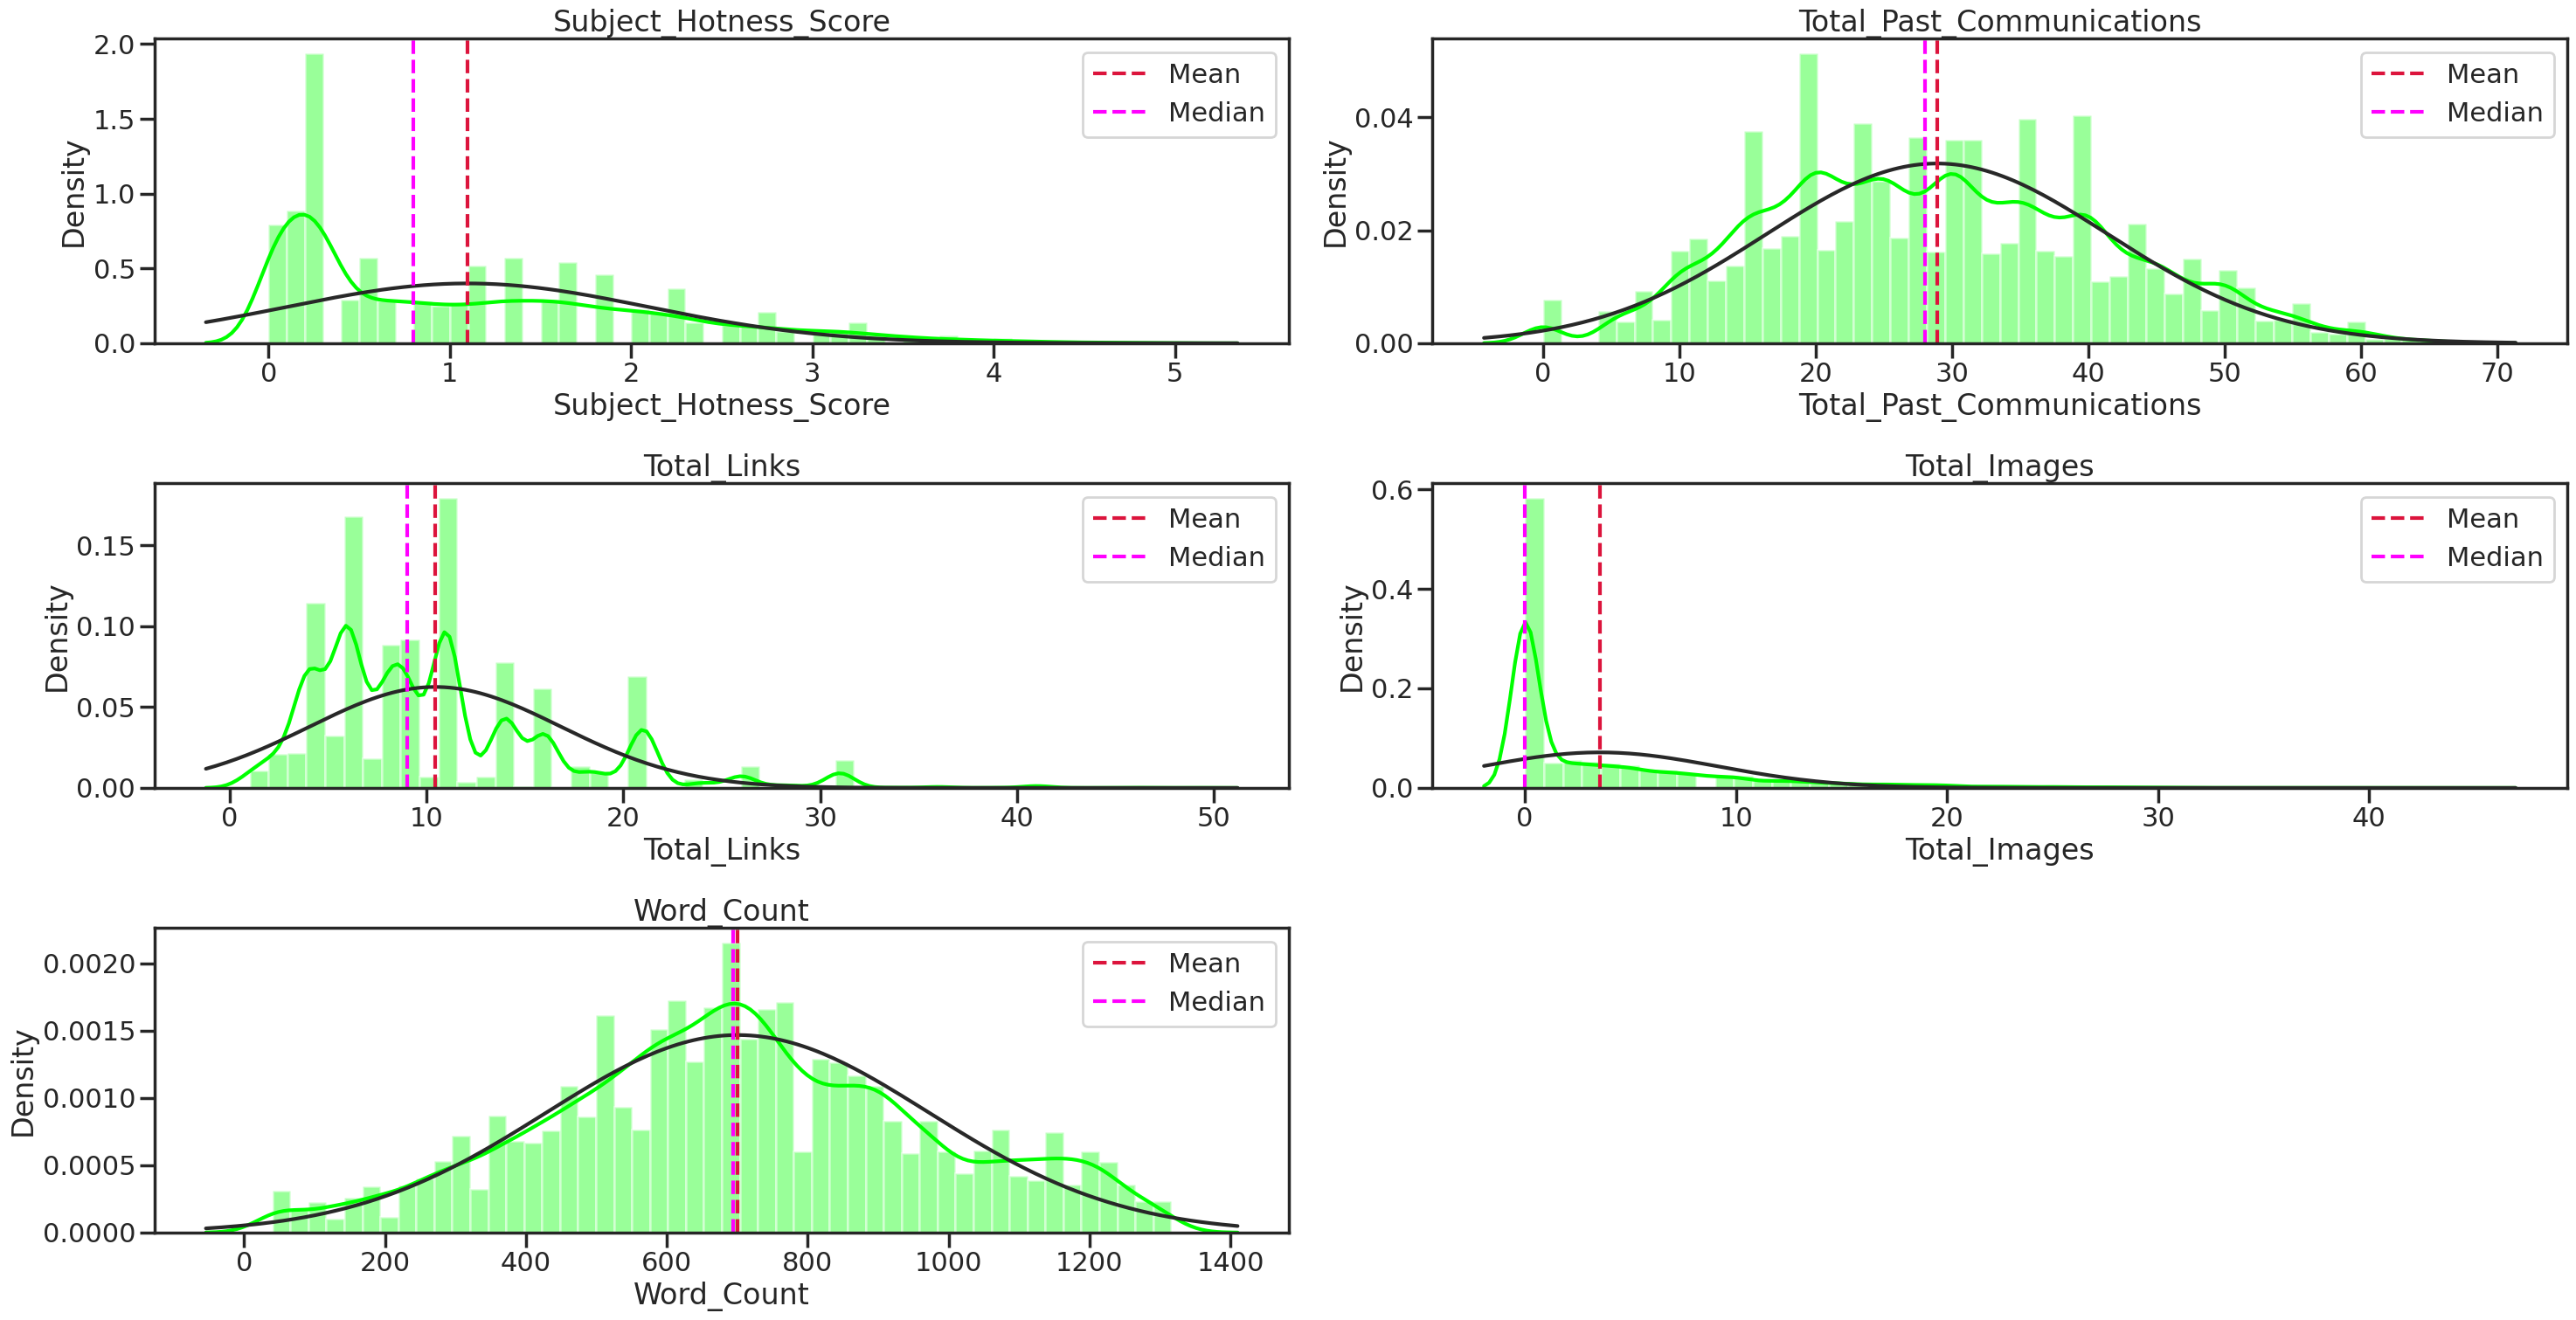

In [58]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (30,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color ='lime', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='crimson', linestyle='dashed', linewidth=3,label= 'Mean');  #red
    plt.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=3,label='Median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

The ideal visualisation for comprehending distributions and viewing continuous data is the above-illustrated Distplot, which combines the KDE and histogram charts.

##### 2. What is/are the insight(s) found from the chart?

In contrast to the word count and total communication count, which exhibit roughly normal distribution, the subject hotness score, total image count, and total links are positively skewed.

1.  The average value for the subject hotness score is 1. 
2.  The average value for the total communication is 30.
3.  The average value for the total links is 10. 
4.  The average value for the total image is 3. 
5.  The average value for the word count is 700.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot was created to better understand the distribution of each variable, which would ultimately aid in the development of a model and the treatment of outliers or null values, while also demonstrating the critical significance that each value has in the success of an email campaign. This plot alone is insufficient to forecast negative growth.

#### Chart - 2 Enagement Based on Email Type

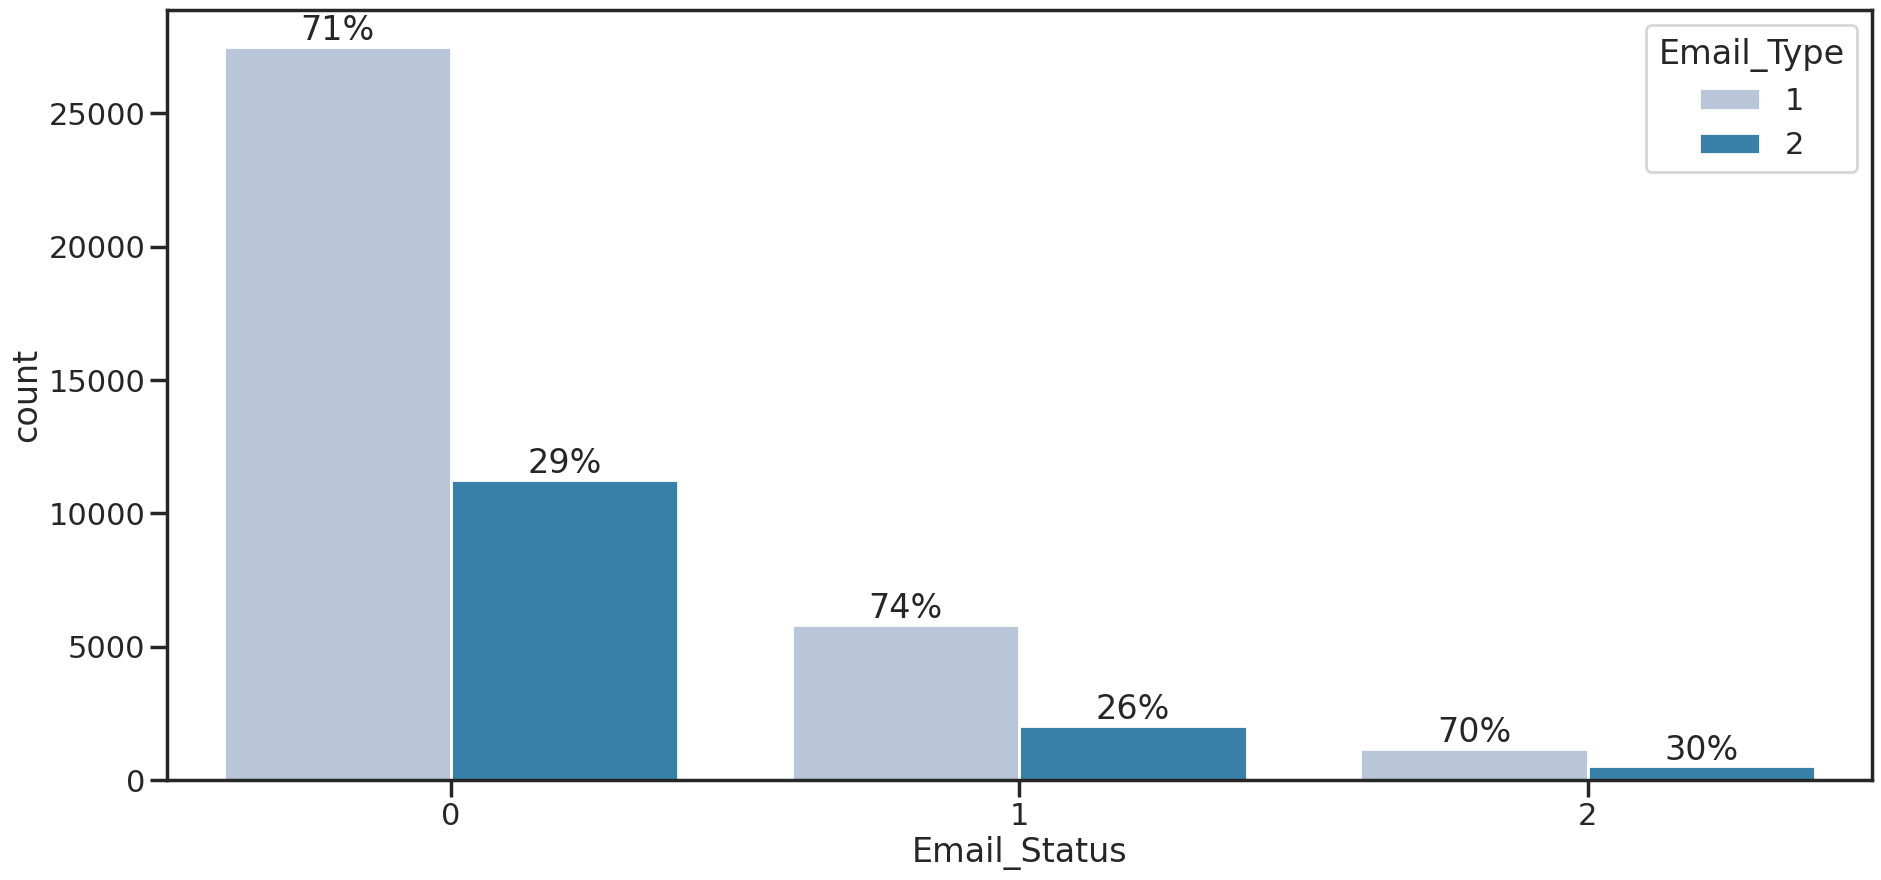

In [59]:
# Chart - 2 visualization code
plt.figure(figsize = (22,10))
ax = sns.countplot(x=df['Email_Status'],hue=df['Email_Type'],palette='PuBu')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

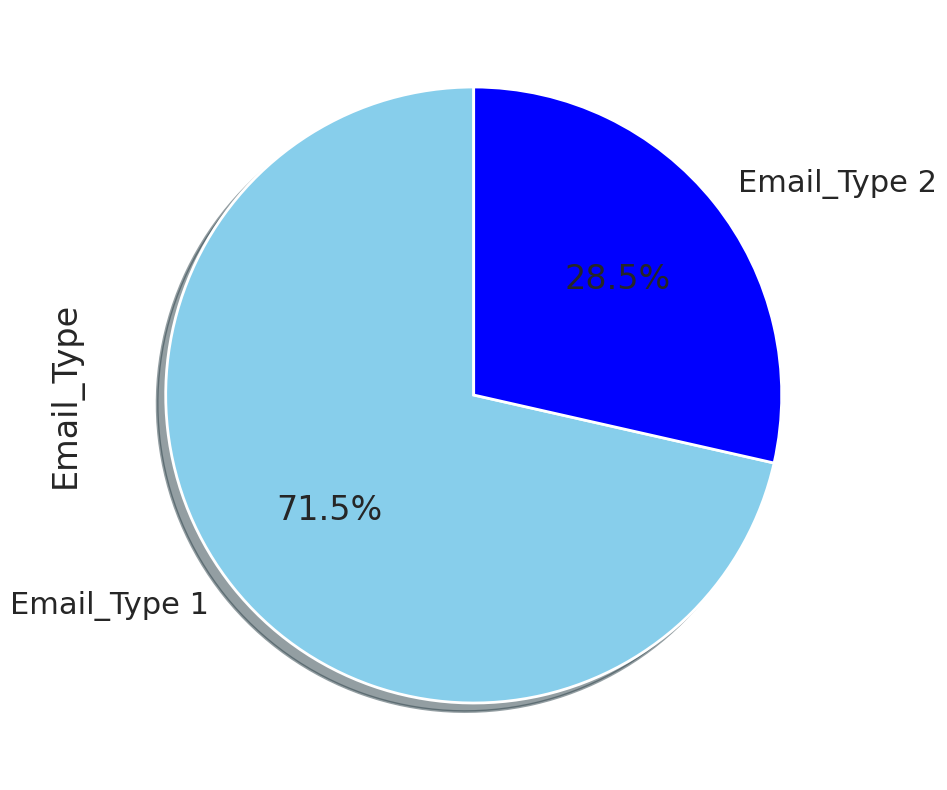

In [60]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(22,10),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','blue'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

The count map aids in understanding the count of individual categories and understanding the percentage of each category using a pie chart.


##### 2. What is/are the insight(s) found from the chart?

Emails that are generally recognised are much less in number than emails that are ignored.

71% of emails are type 1, however 71% of those emails are ignored, meaning that only 29% of type 1 emails have an open rate.
Similar to this, 29% of emails are of type 2, of which 29% are disregarded, meaning that 71% of type 2 emails had an open rate.

Despite being delivered in less volume, Type 2 results are more encouraging because more emails were recognised.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even though it was helpful, this graph was unable to have any commercial effects other than to show how emails are being interacted with in an interesting way.

#### Chart - 3 Engagement based on Email Type with all numerical features

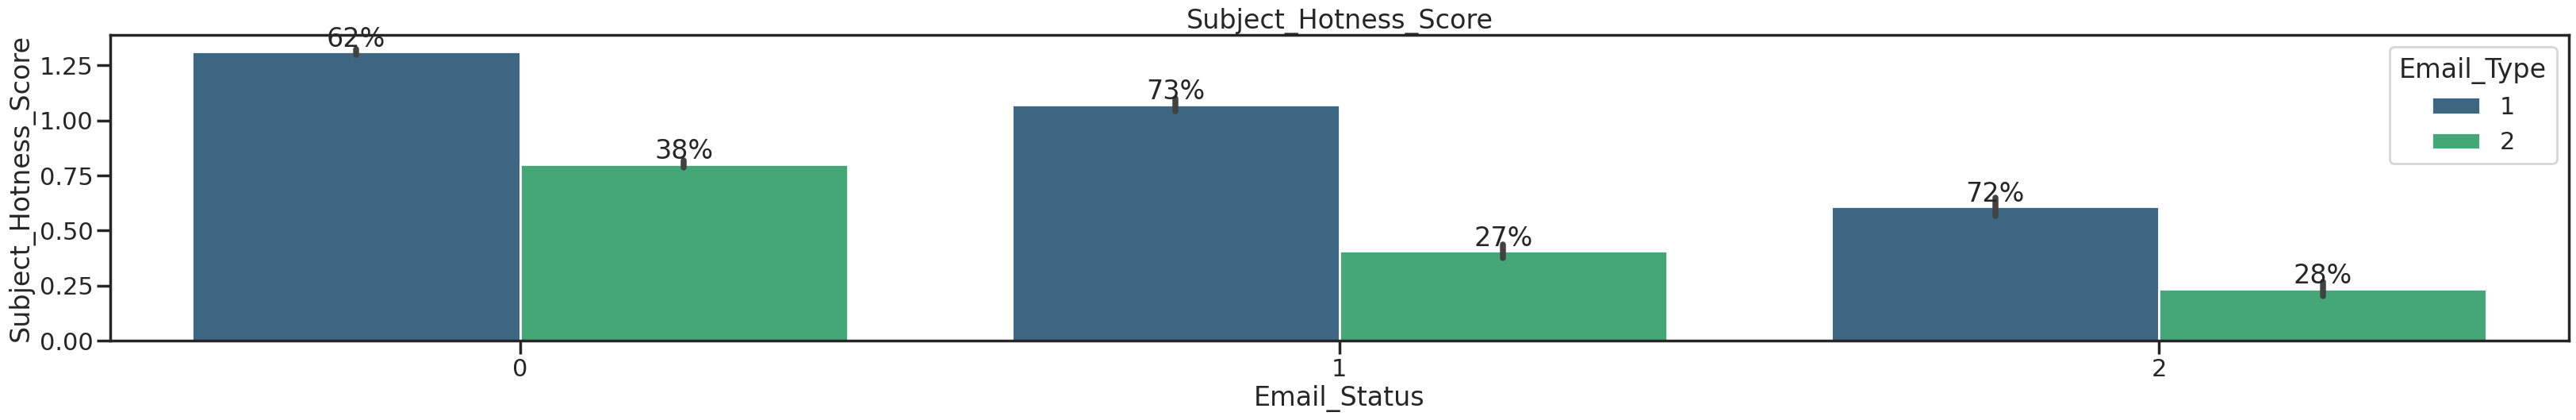

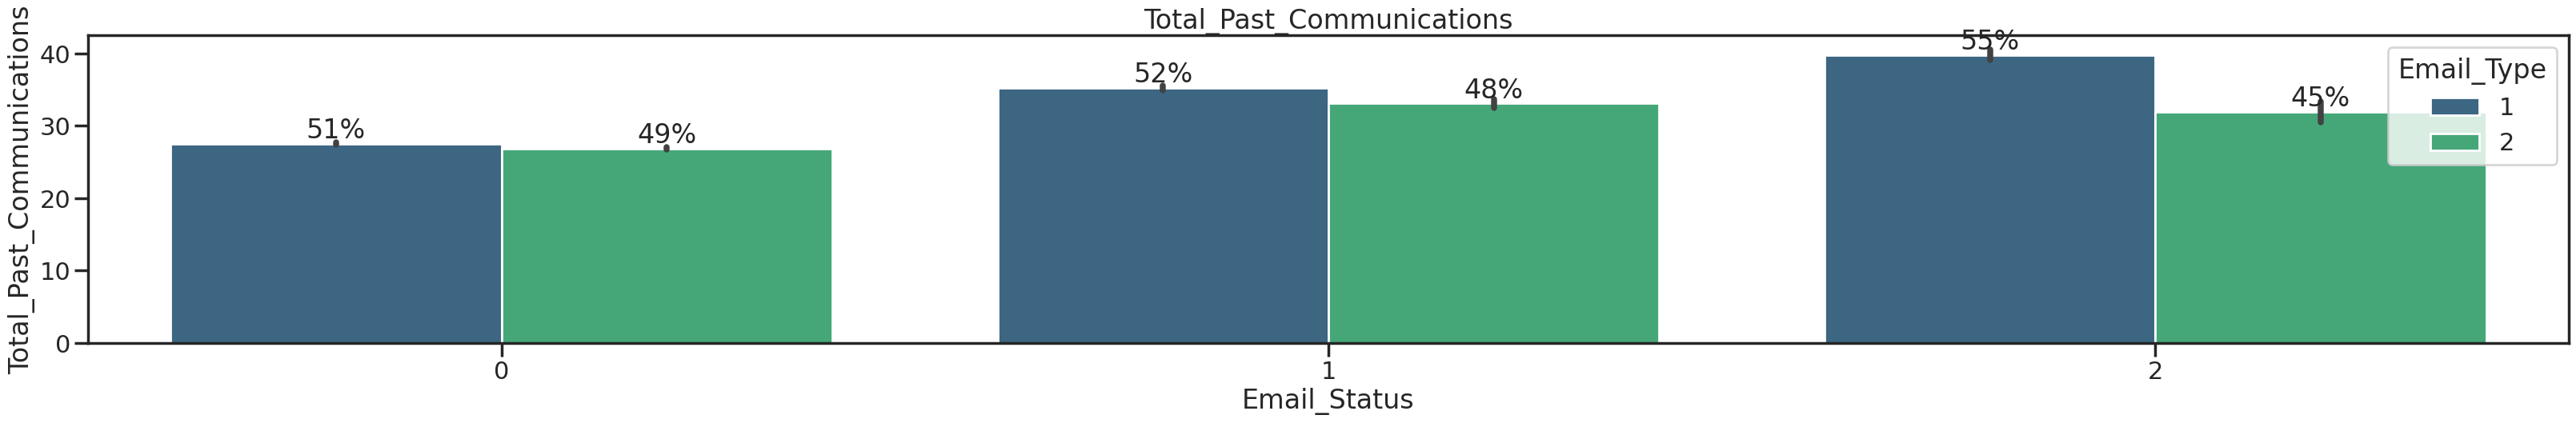

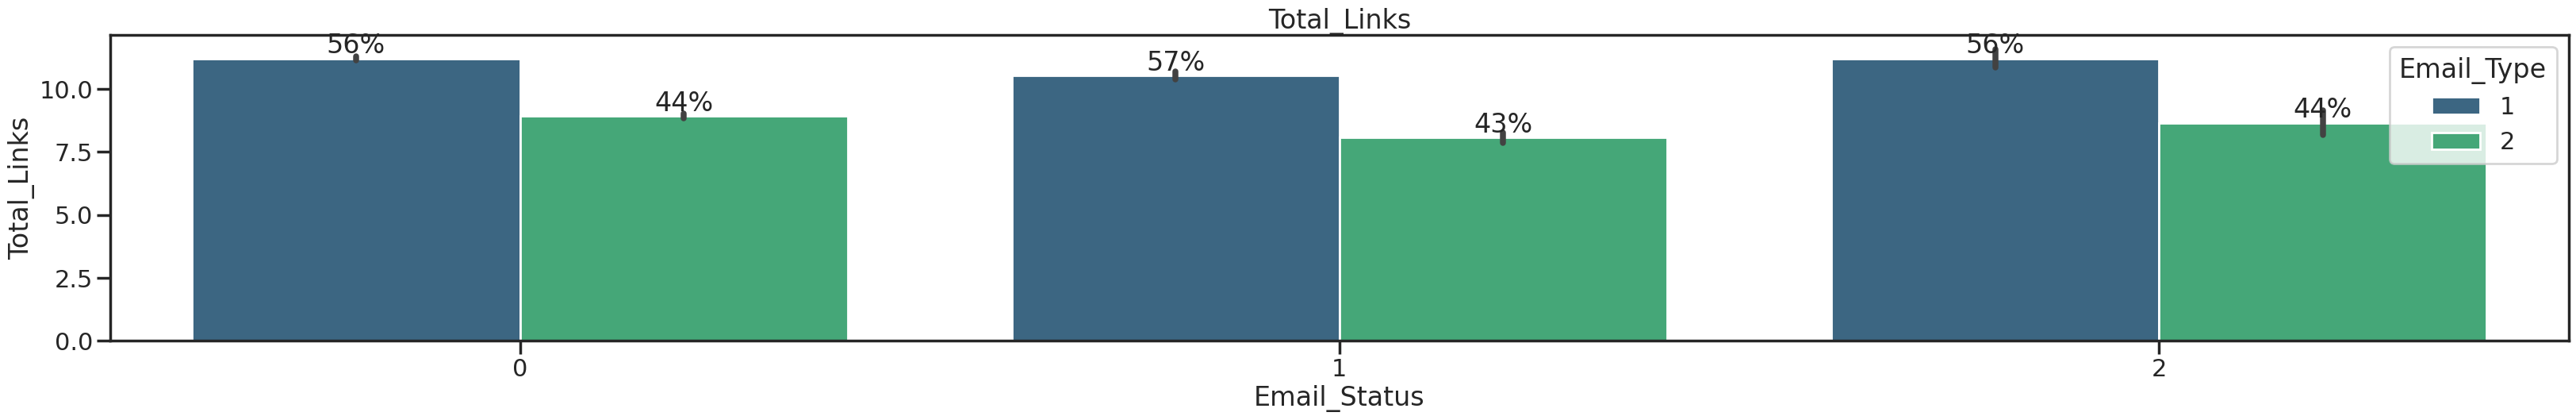

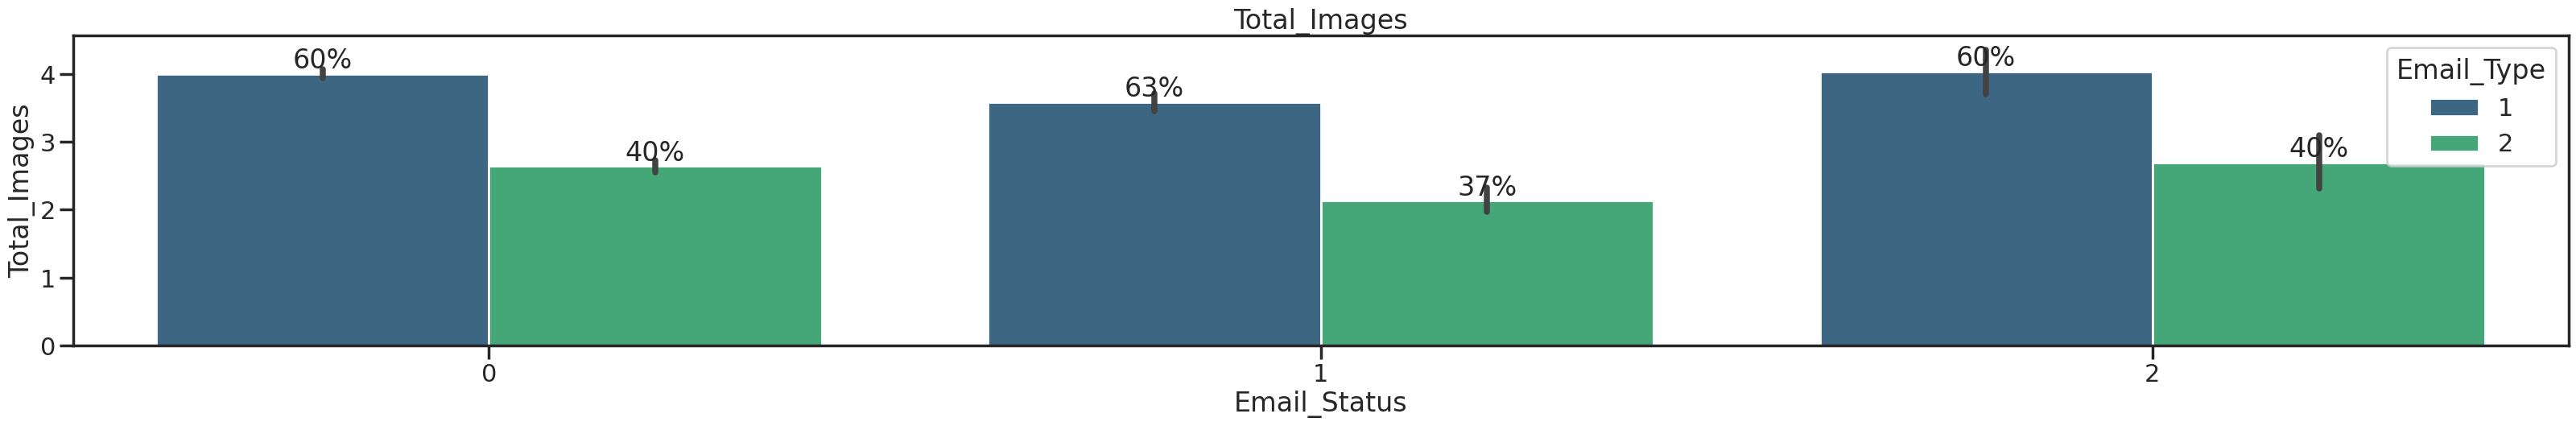

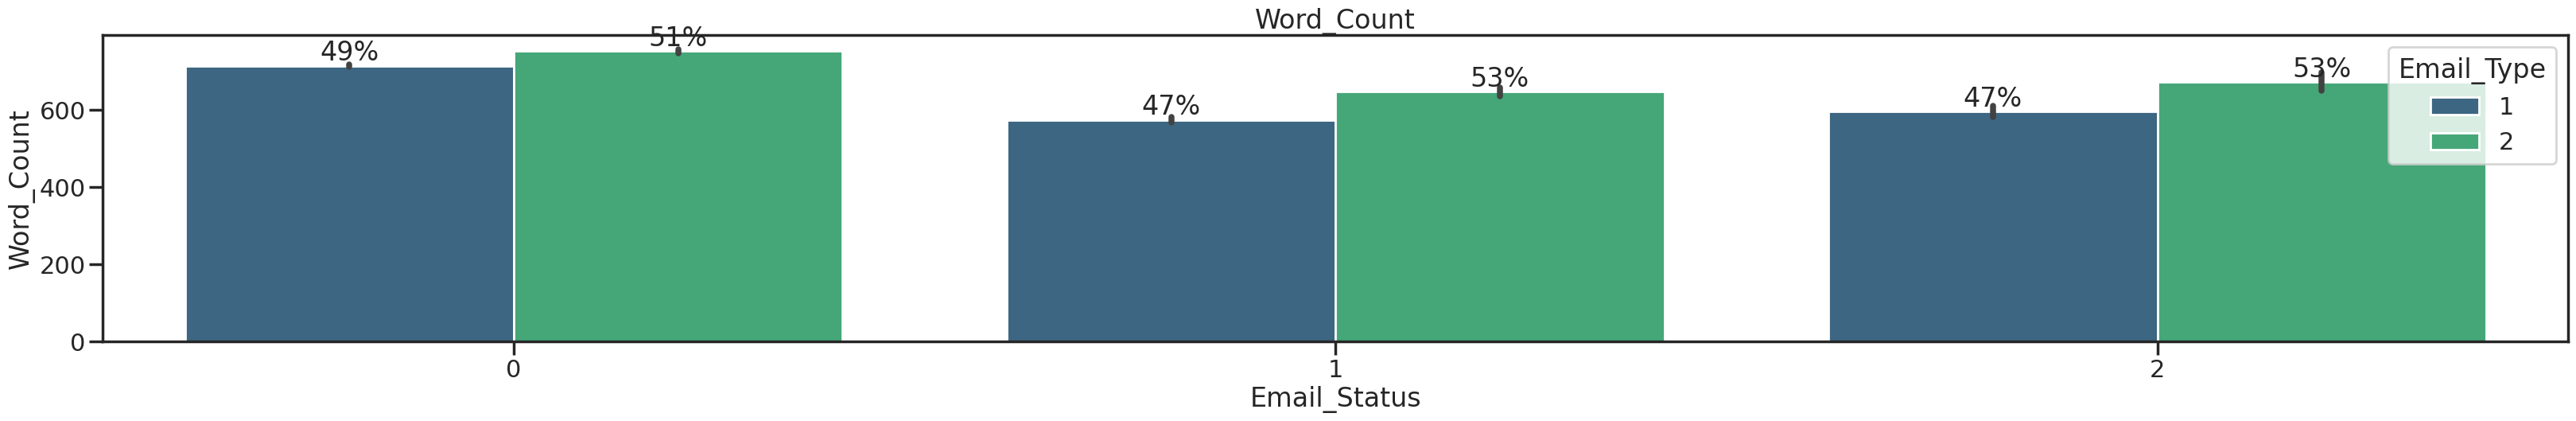

In [61]:
# Chart - 3 visualization code

for value in num_feature:
  plt.figure(figsize = (40,5))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Email_Type',palette= "viridis");
  unique = len([x for x in df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data.
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email type with respect to Email status, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

According to the previous graph, even though type 1 emails were sent more frequently and had higher rates of being ignored, type 2 emails, which were sent less frequently, had higher engagement rates.

It is evident from the current graph that greater past communication is necessary for better engagement, combined with an average word length of 600, a subject hotness score of 0.6, and material with an average number of links of 10 and three images.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Email marketing is the main method for expanding a business and creating cash, yet the click-through rate for marketing and conversion rates are poor and marketing emails are frequently ignored.

#### Chart - 4 Email Campaign Type

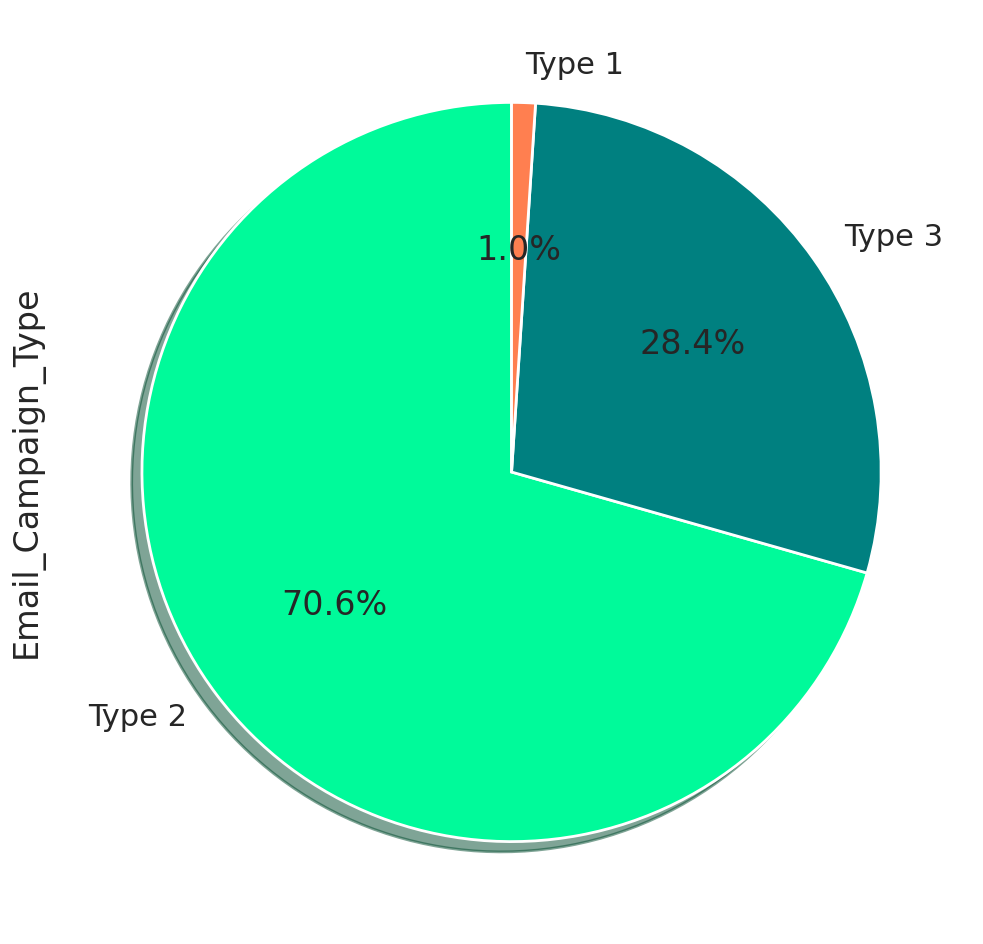

In [62]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(22,12),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                               colors=['mediumspringgreen','teal','coral'],
                               explode=[0,0,0]
                              );

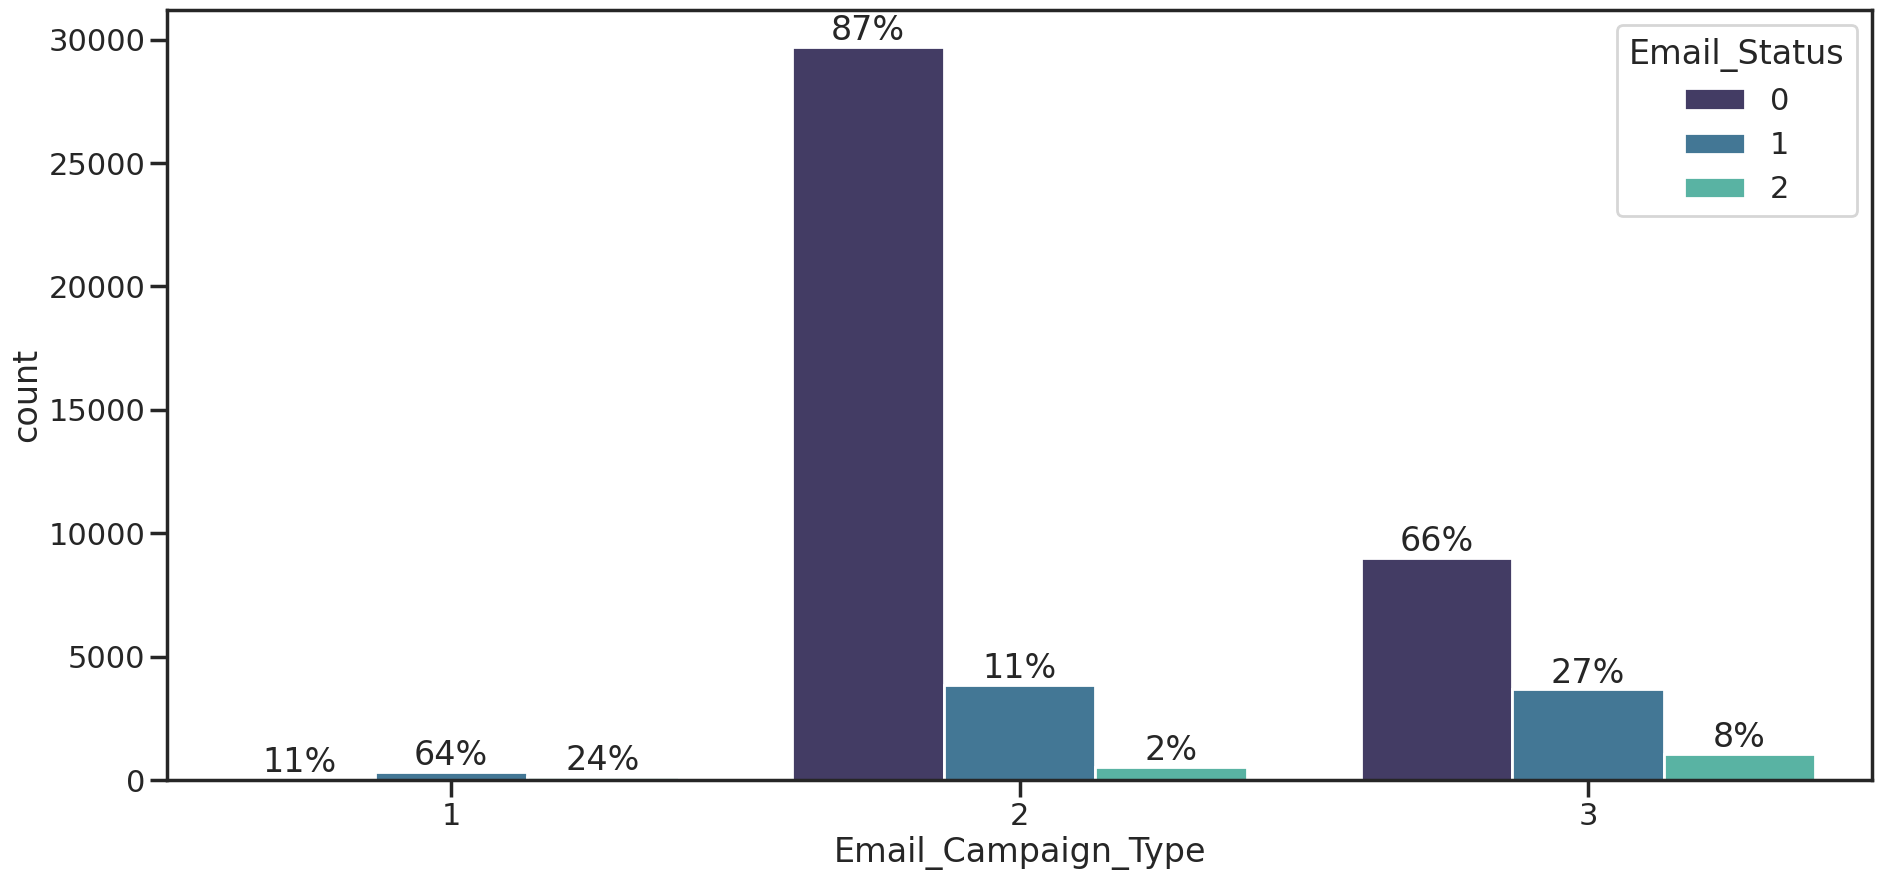

In [63]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (22,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'],palette='mako')
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data to show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart and also i have used Pie chart to show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Campaign 1 had a very small amount of emails, but those emails had a far greater open rate than the others.Emails from email campaign type 2 are largely ignored, with only 1% of them being acknowledged.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and company should stop campaign 2 as its most of the emails are ignored.

If emails are ignored in huge number, its better to stop that category and make sure to use a/b test with the content and other category before sending in bulk as it will only cost loss of revenue.

#### Chart - 5 Location with most Email Acknowledged

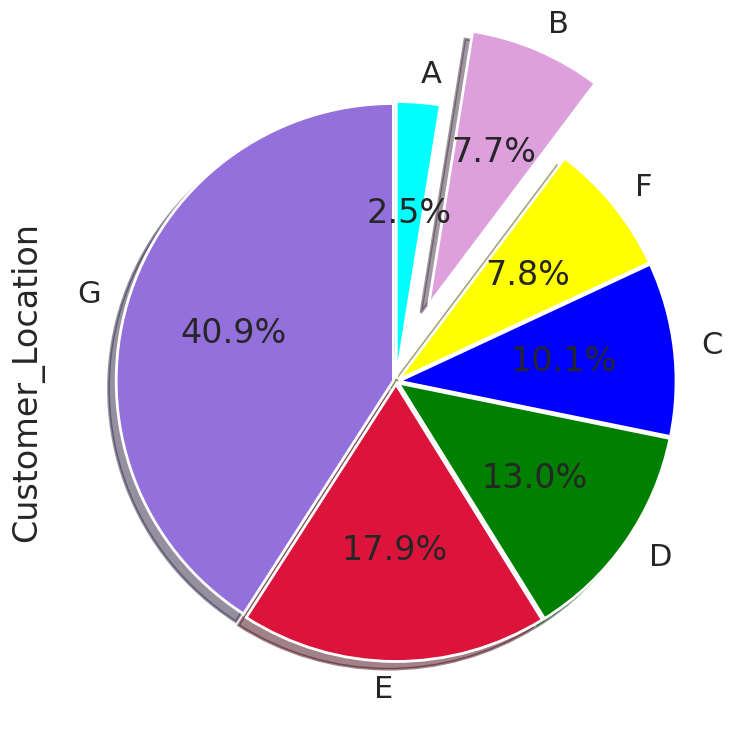

In [64]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(18,9),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['mediumpurple','crimson','green','blue','yellow','plum','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


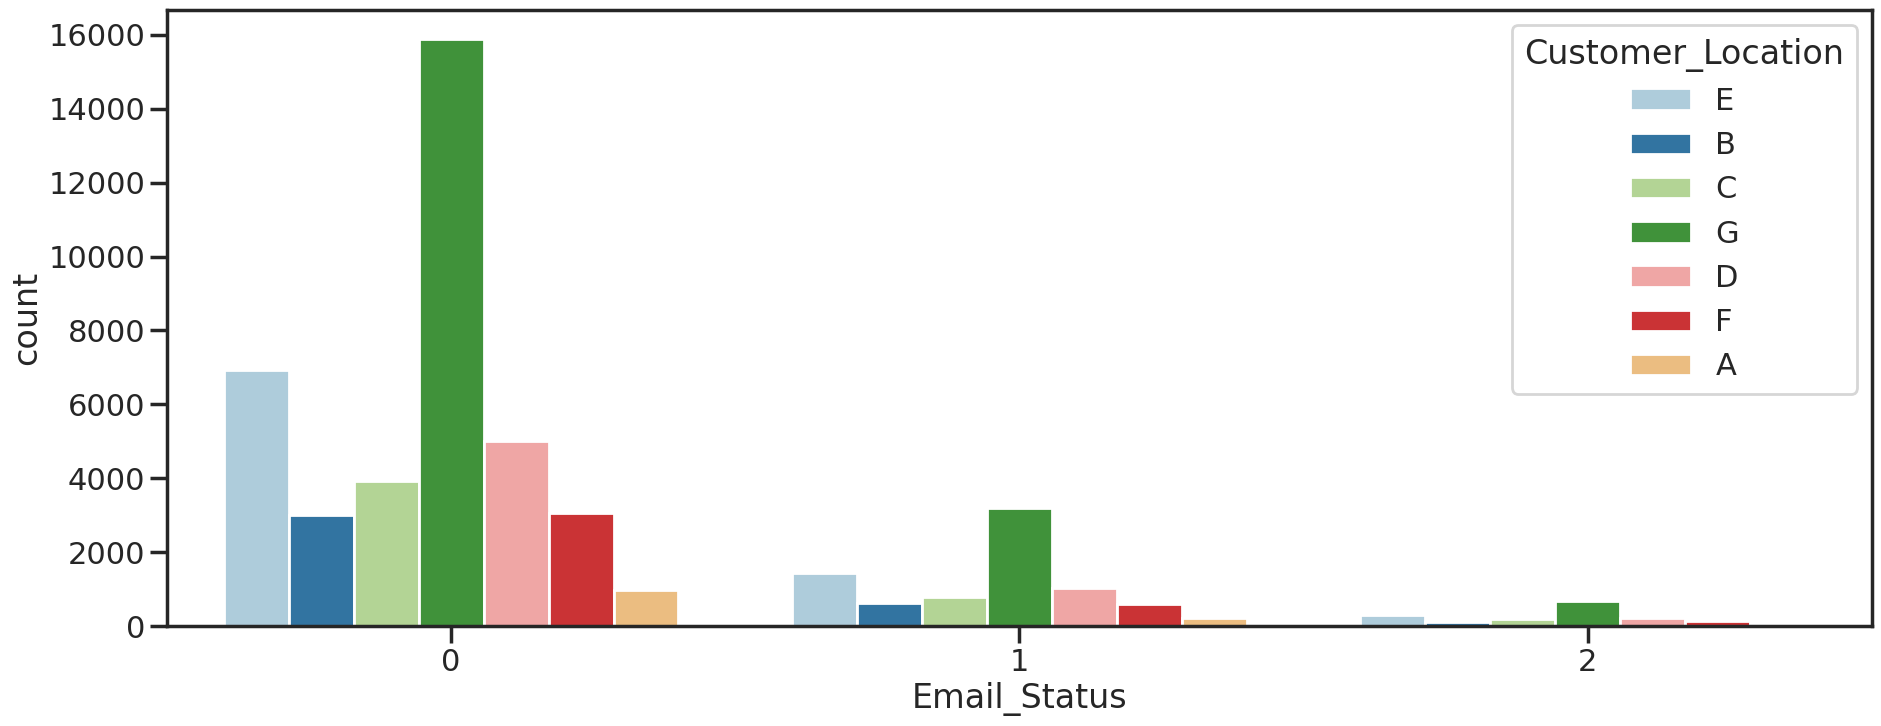

In [65]:
#based on location identifying how email status changed
plt.figure(figsize = (22,8))
ax = sns.countplot(x=df['Email_Status'],hue=df['Customer_Location'],palette= "Paired")
plt.show()

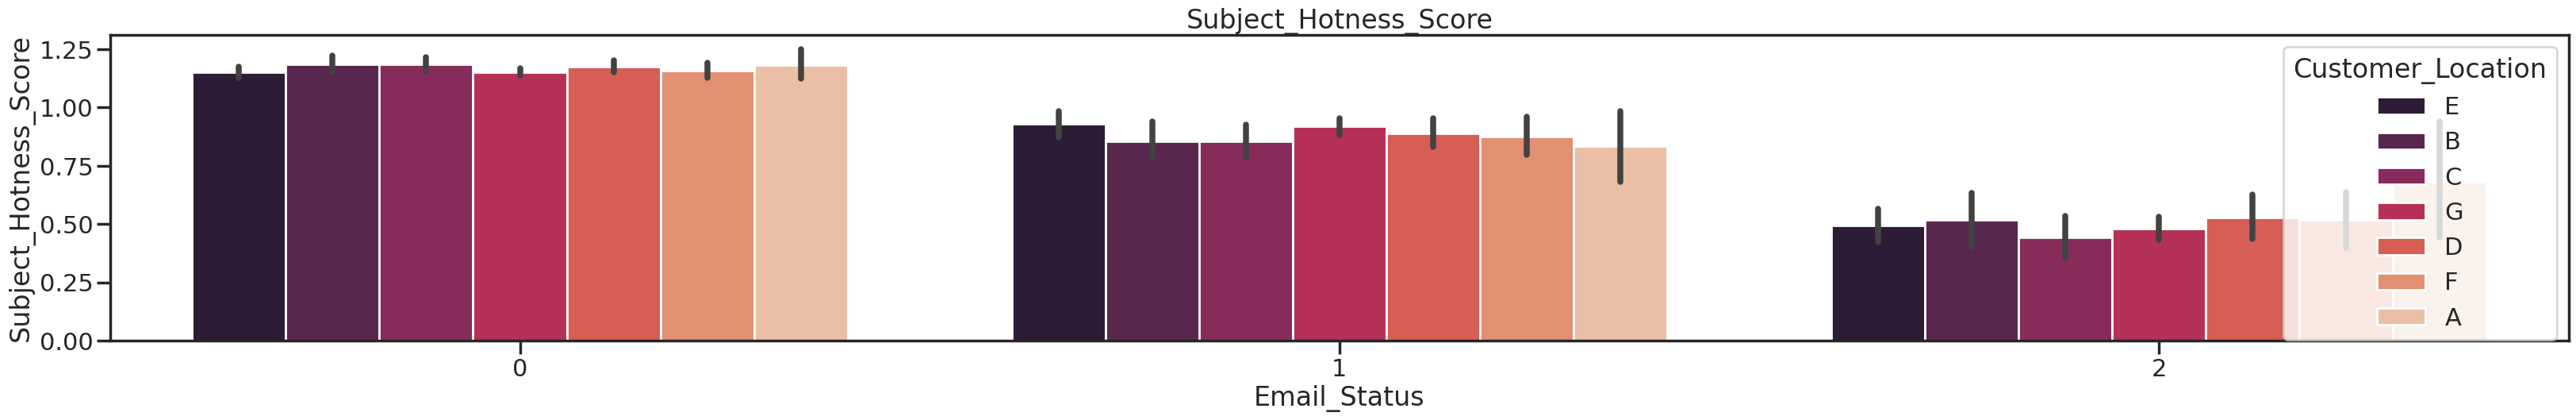

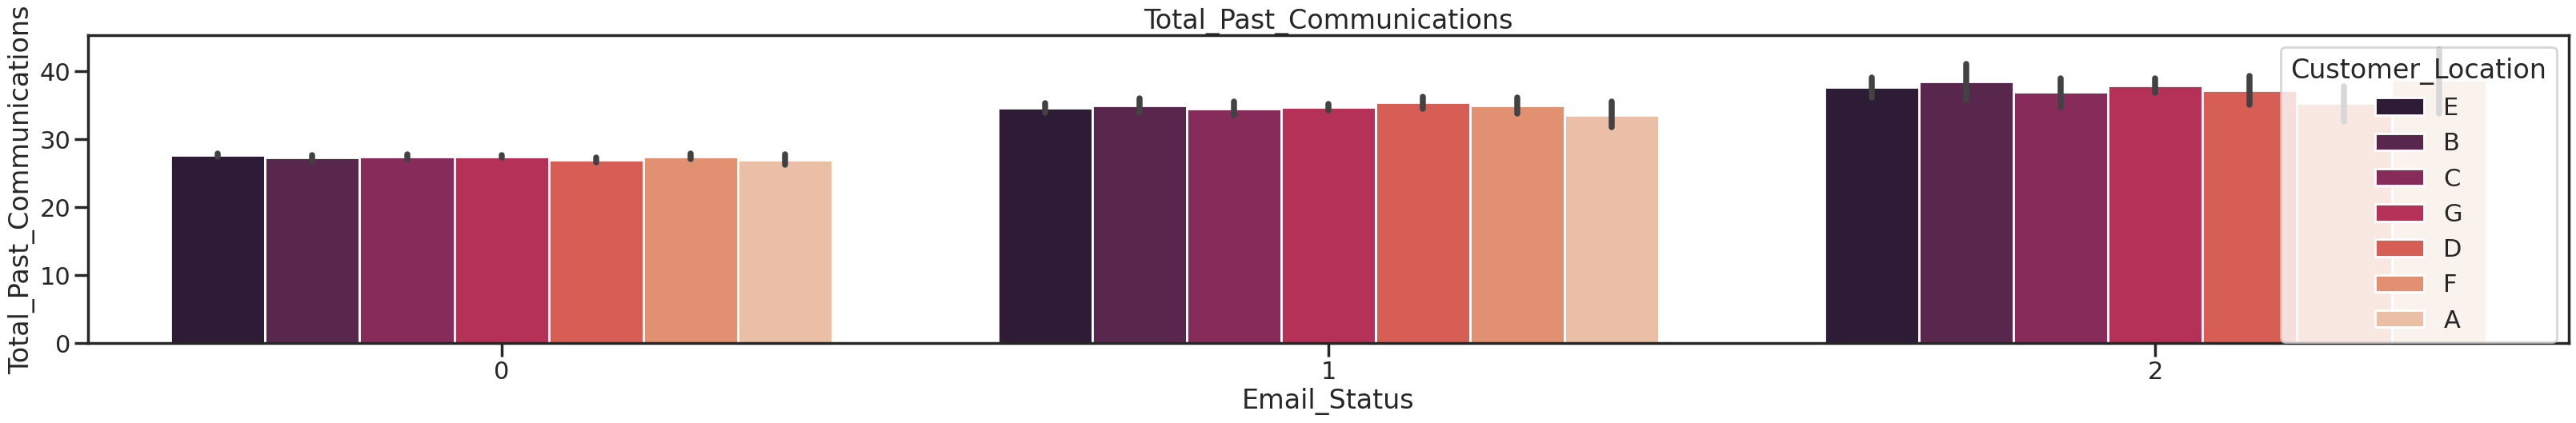

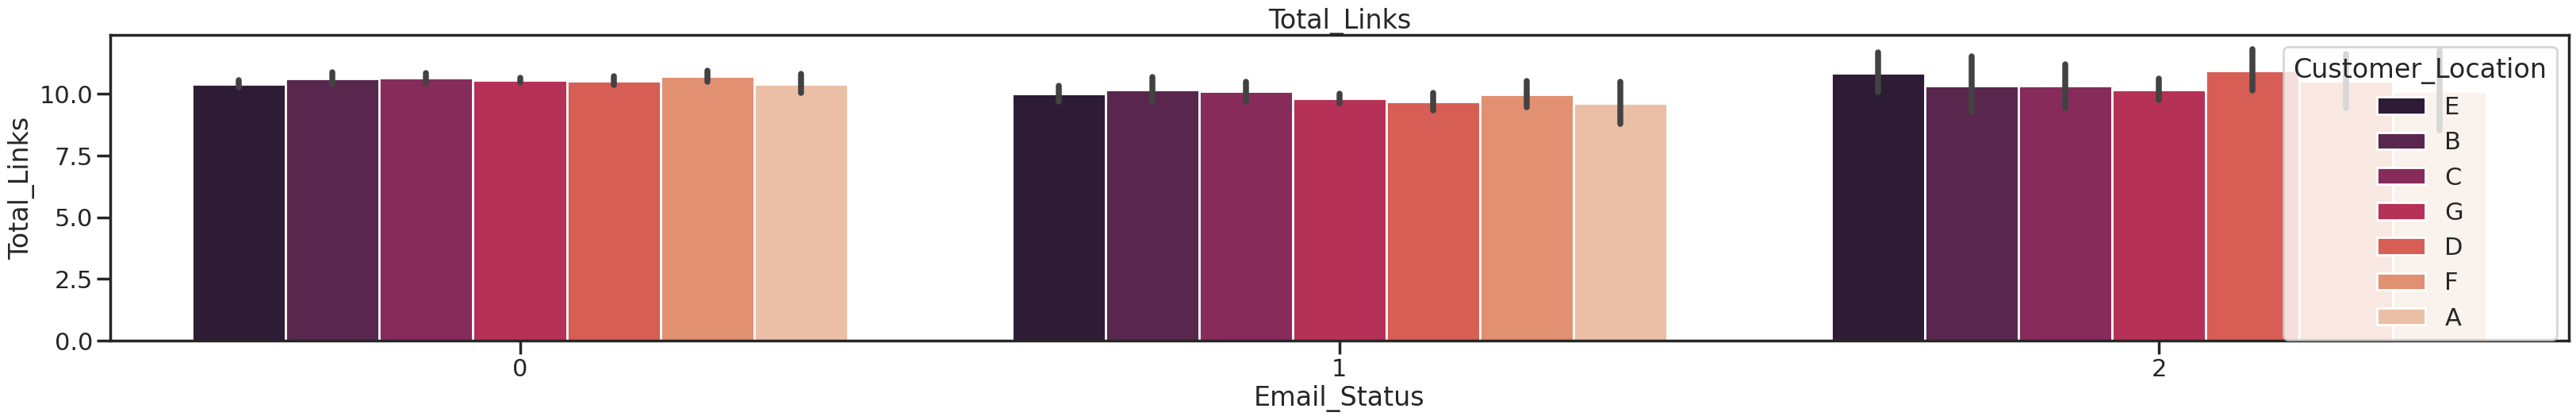

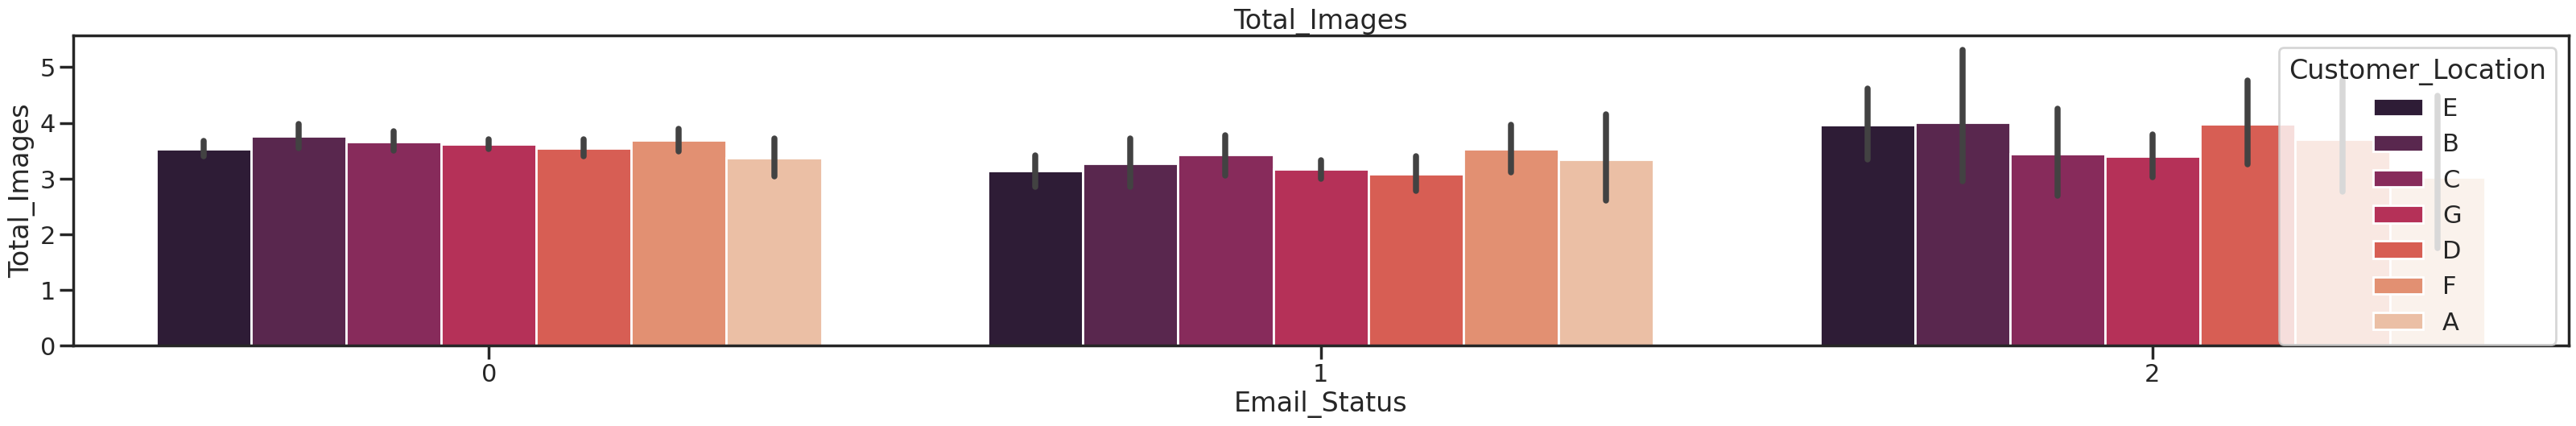

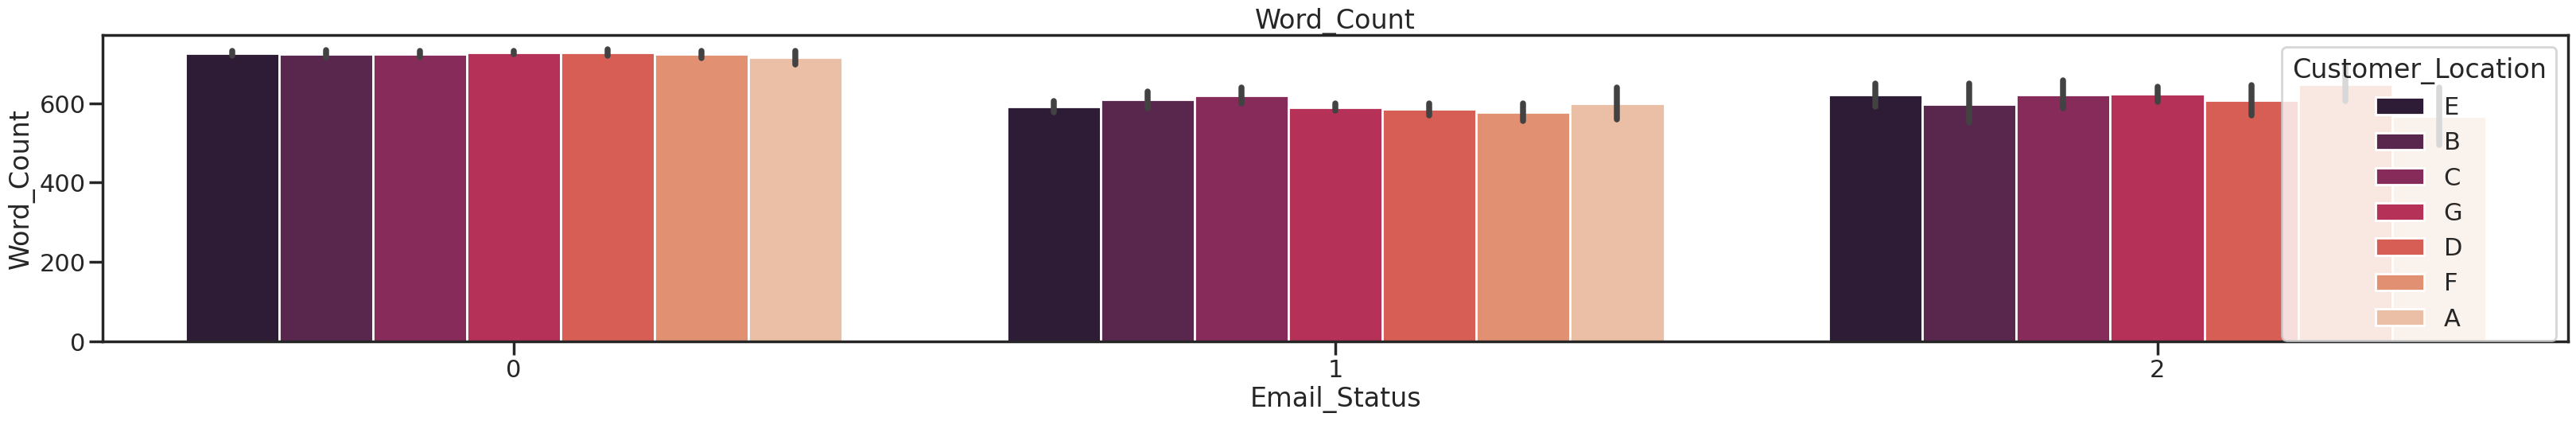

In [66]:
#checking effect of location on other numerical features
for value in num_feature:
  plt.figure(figsize = (40,5))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Customer_Location',palette= "rocket");
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Bar Graph are easy to understand which helps in understanding of the variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

While receiving only a small number of emails, Location C has the highest level of engagement and the largest number of emails that have been recognised.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In accordance with the location, email should be sent more frequently to location C than to site G, where the majority of emails are disregarded and barely any emails receive acknowledgement.

Although customer site G may have had greater potential, its lower coversion rate could result in additional revenue loss

#### Chart - 6

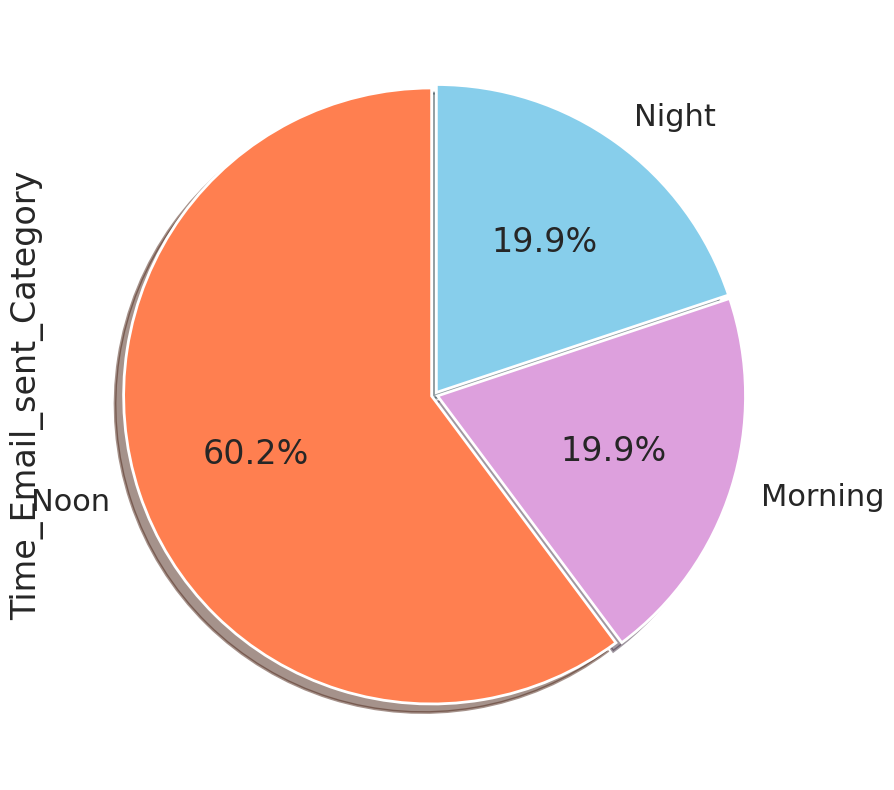

In [67]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(20,10),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['coral','plum','skyblue'],
                               explode=[0.01,0.01,0.01]
                              );

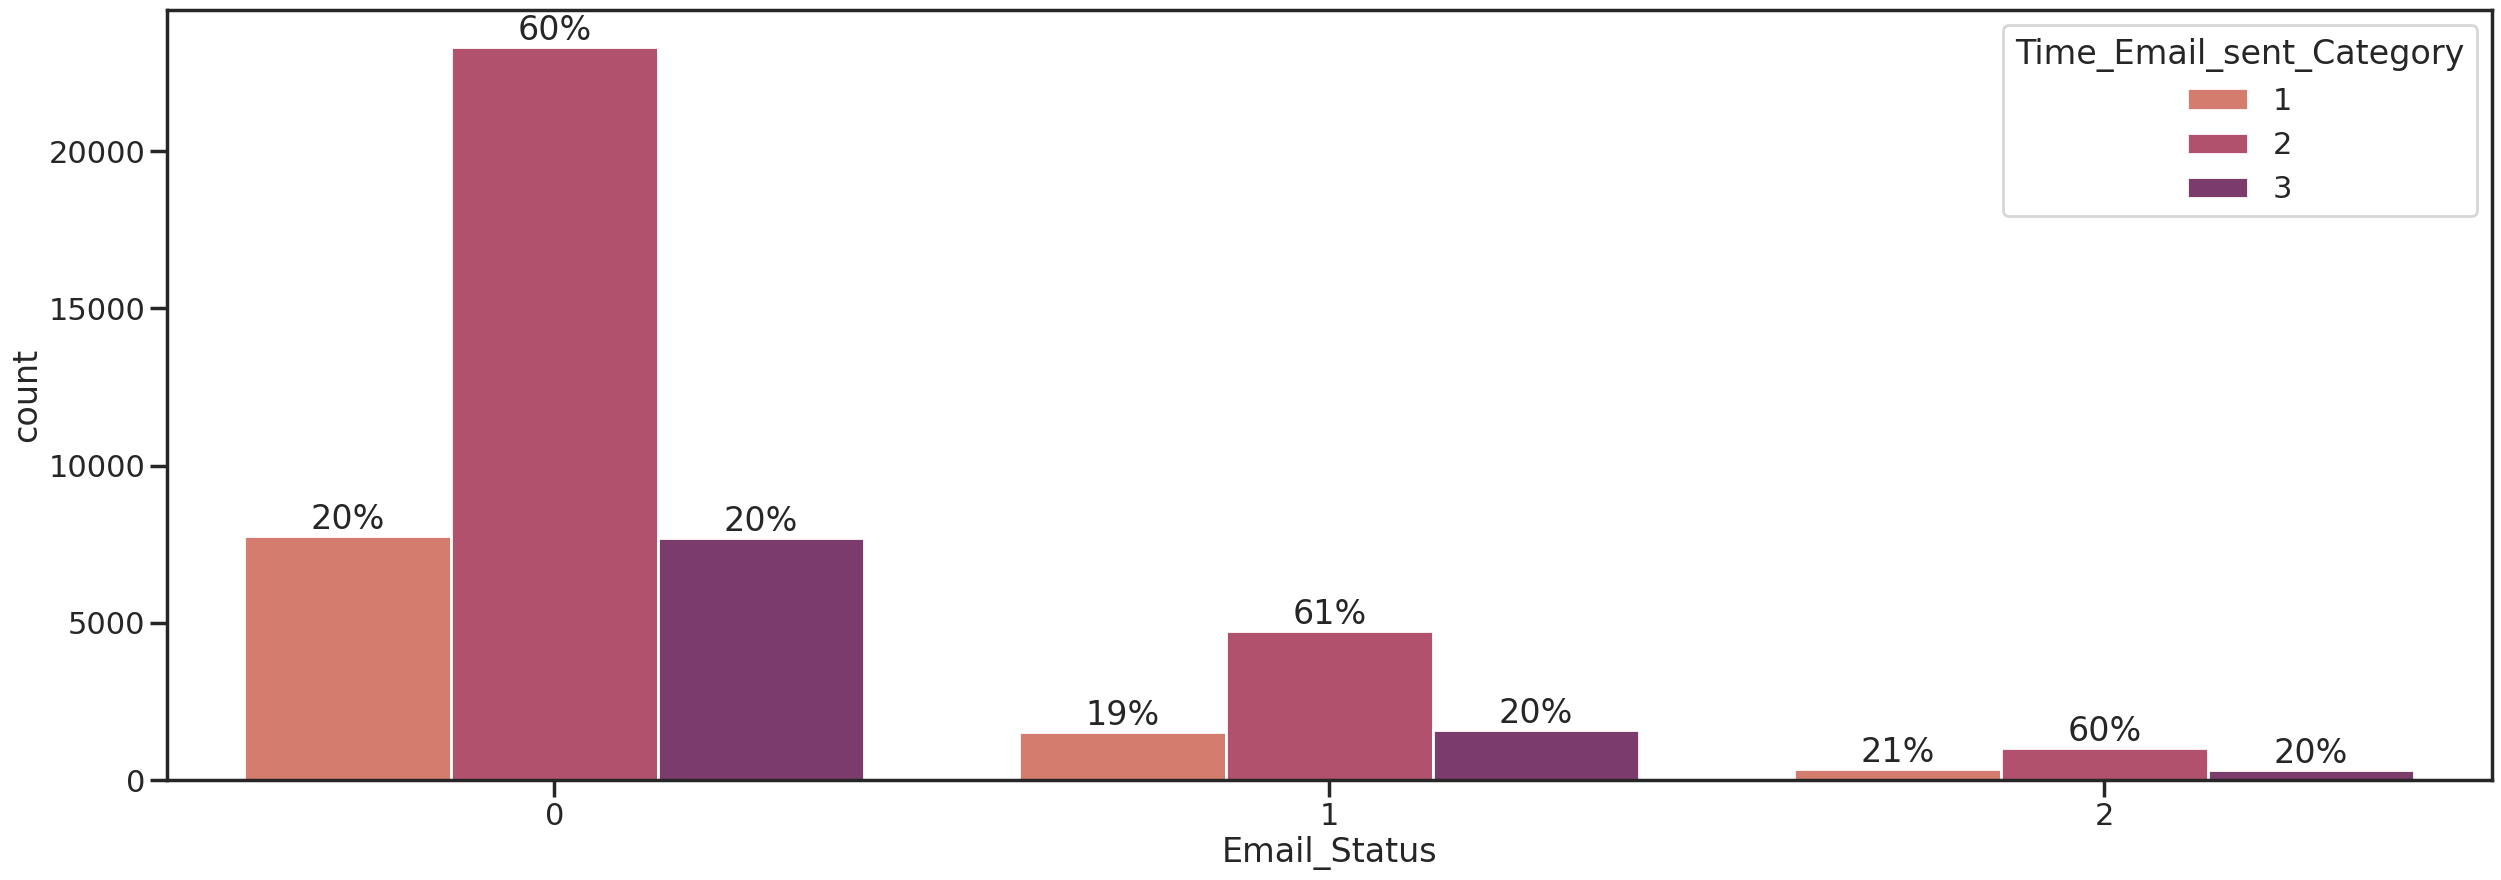

In [68]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (30,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'],palette='flare')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Pie charts aid in understanding distribution, while count plots facilitate in recognising the impact of time on how emails were addressed.

##### 2. What is/are the insight(s) found from the chart?

Out of the 60% of emails sent in the afternoon that were disregarded, only 60% of the remaining 40% showed an opened rate.

Given that the ratio of emails sent in the morning and at night is equal, these times generally result in more emails being recognised


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Email sent during afternoon time showed maximum number or emails ignored which can be costly as email acknowledged during this time is very less.

### Chart - 7 Total Past Communication

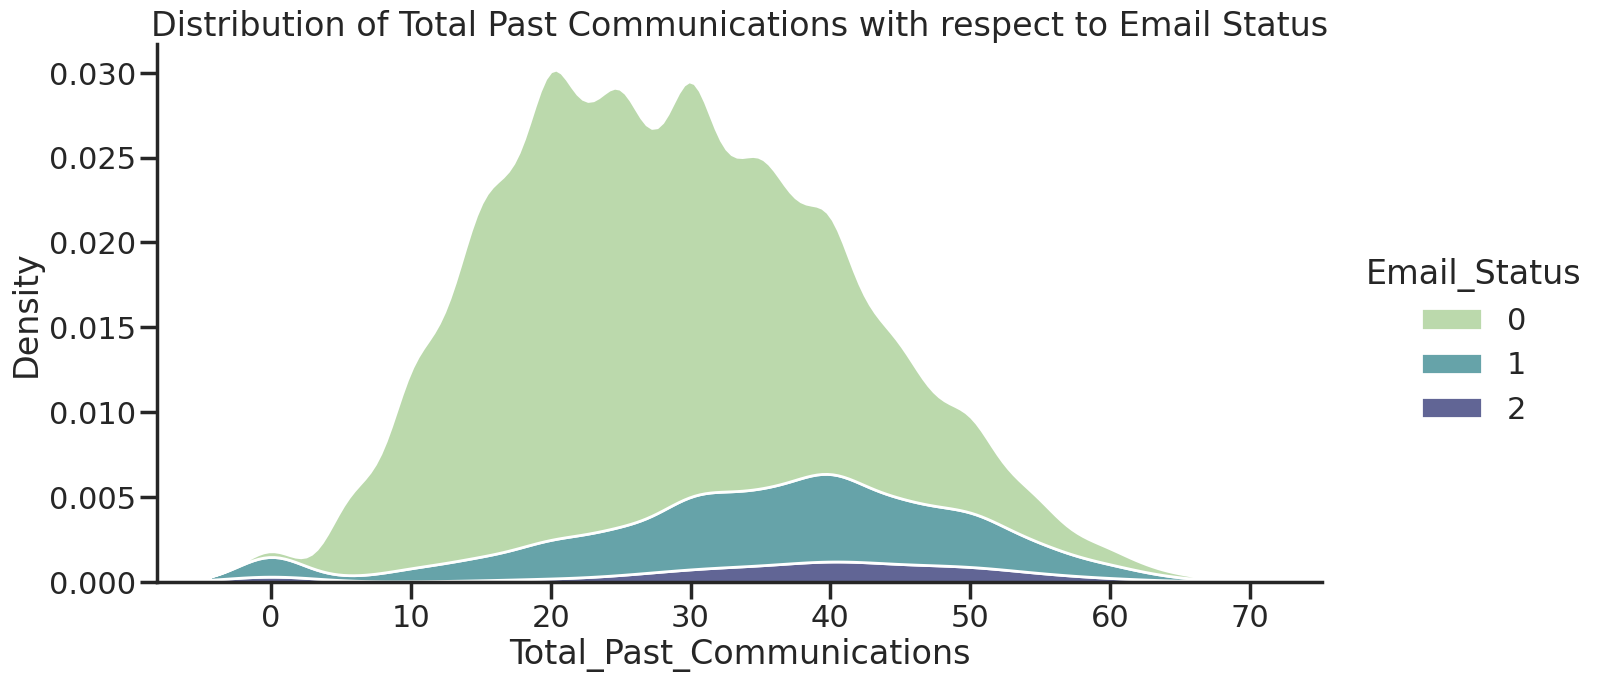

In [69]:
# Chart - 7 visualization code
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='crest');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

Comparing the probability density functions of several features using stacked charts.

##### 2. What is/are the insight(s) found from the chart?

Depending on the density, it is clear that there was less contact for a large number of emails that were ignored than for emails that were acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is crucial to interact with customers rather than merely sending them promotional emails. Given that this is a density plot, all that is shown is distribution—not nearly enough to have an effect on business.

### Chart - 8 - Correlation Heatmap

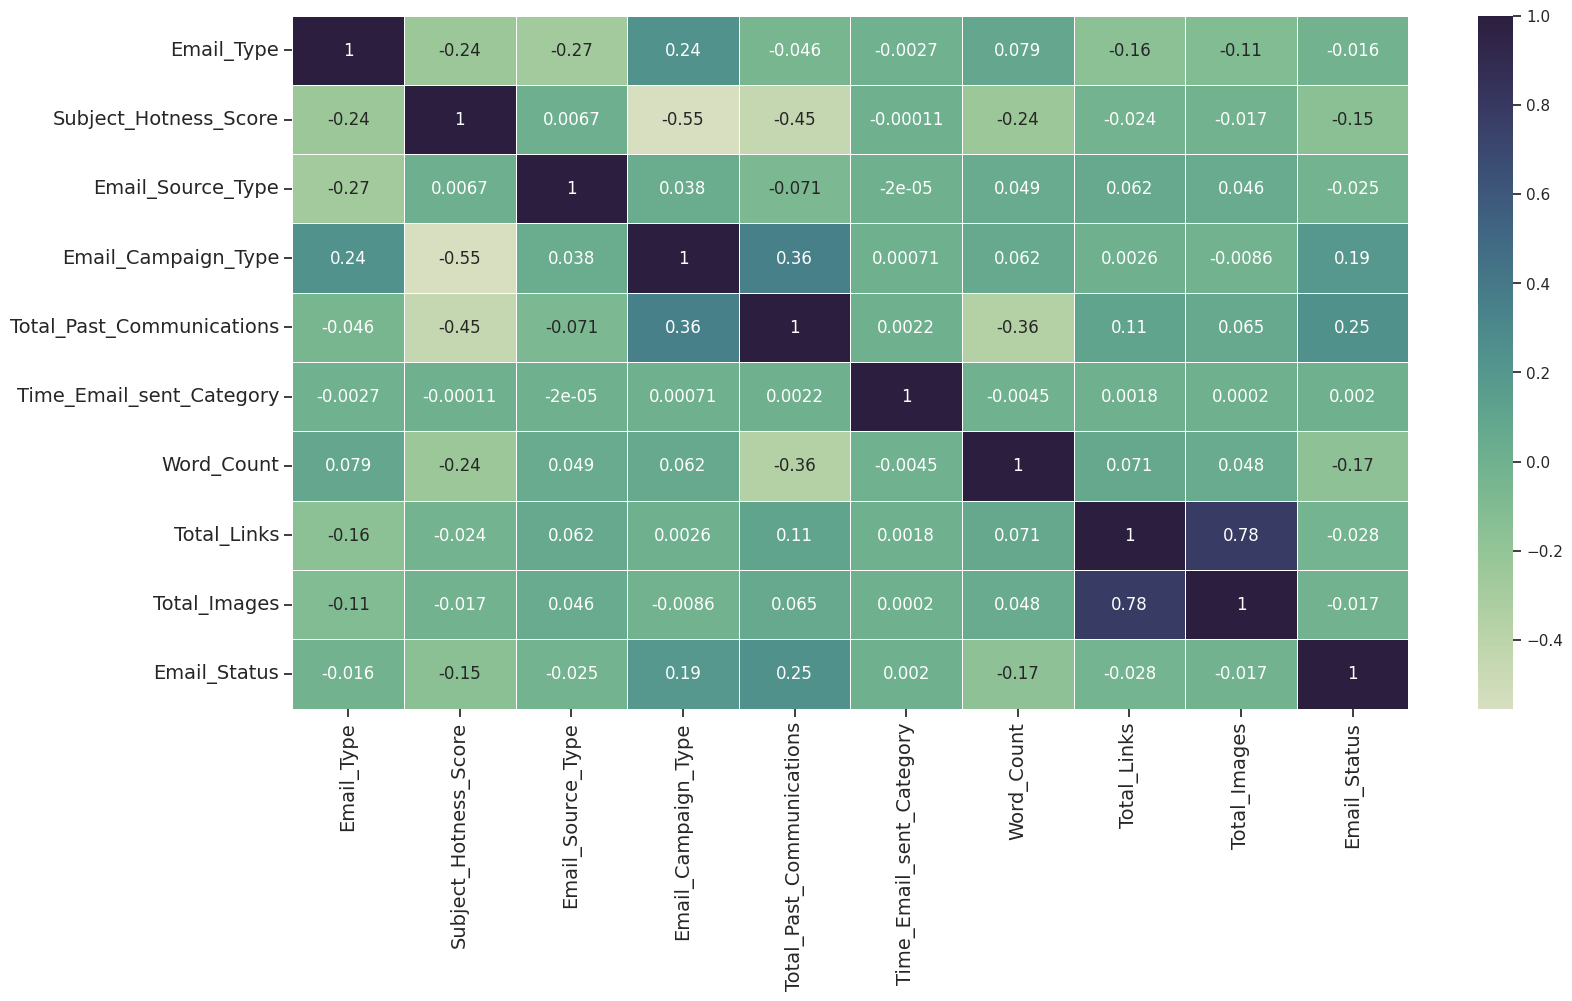

In [70]:
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (18,9))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(df.corr(), annot=True,linewidth=.5,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True));

##### 1. Why did you pick the specific chart?

A table displaying correlation coefficients between variables is called a correlation matrix.I therefore utilised a correlation heatmap to determine the correlation between all the variables as well as the correlation coefficients.


##### 2. What is/are the insight(s) found from the chart?

Multicollinearity is caused by the correlation of 0.78 between all relationships and the final result.

### Chart - 9 - Pair Plot 

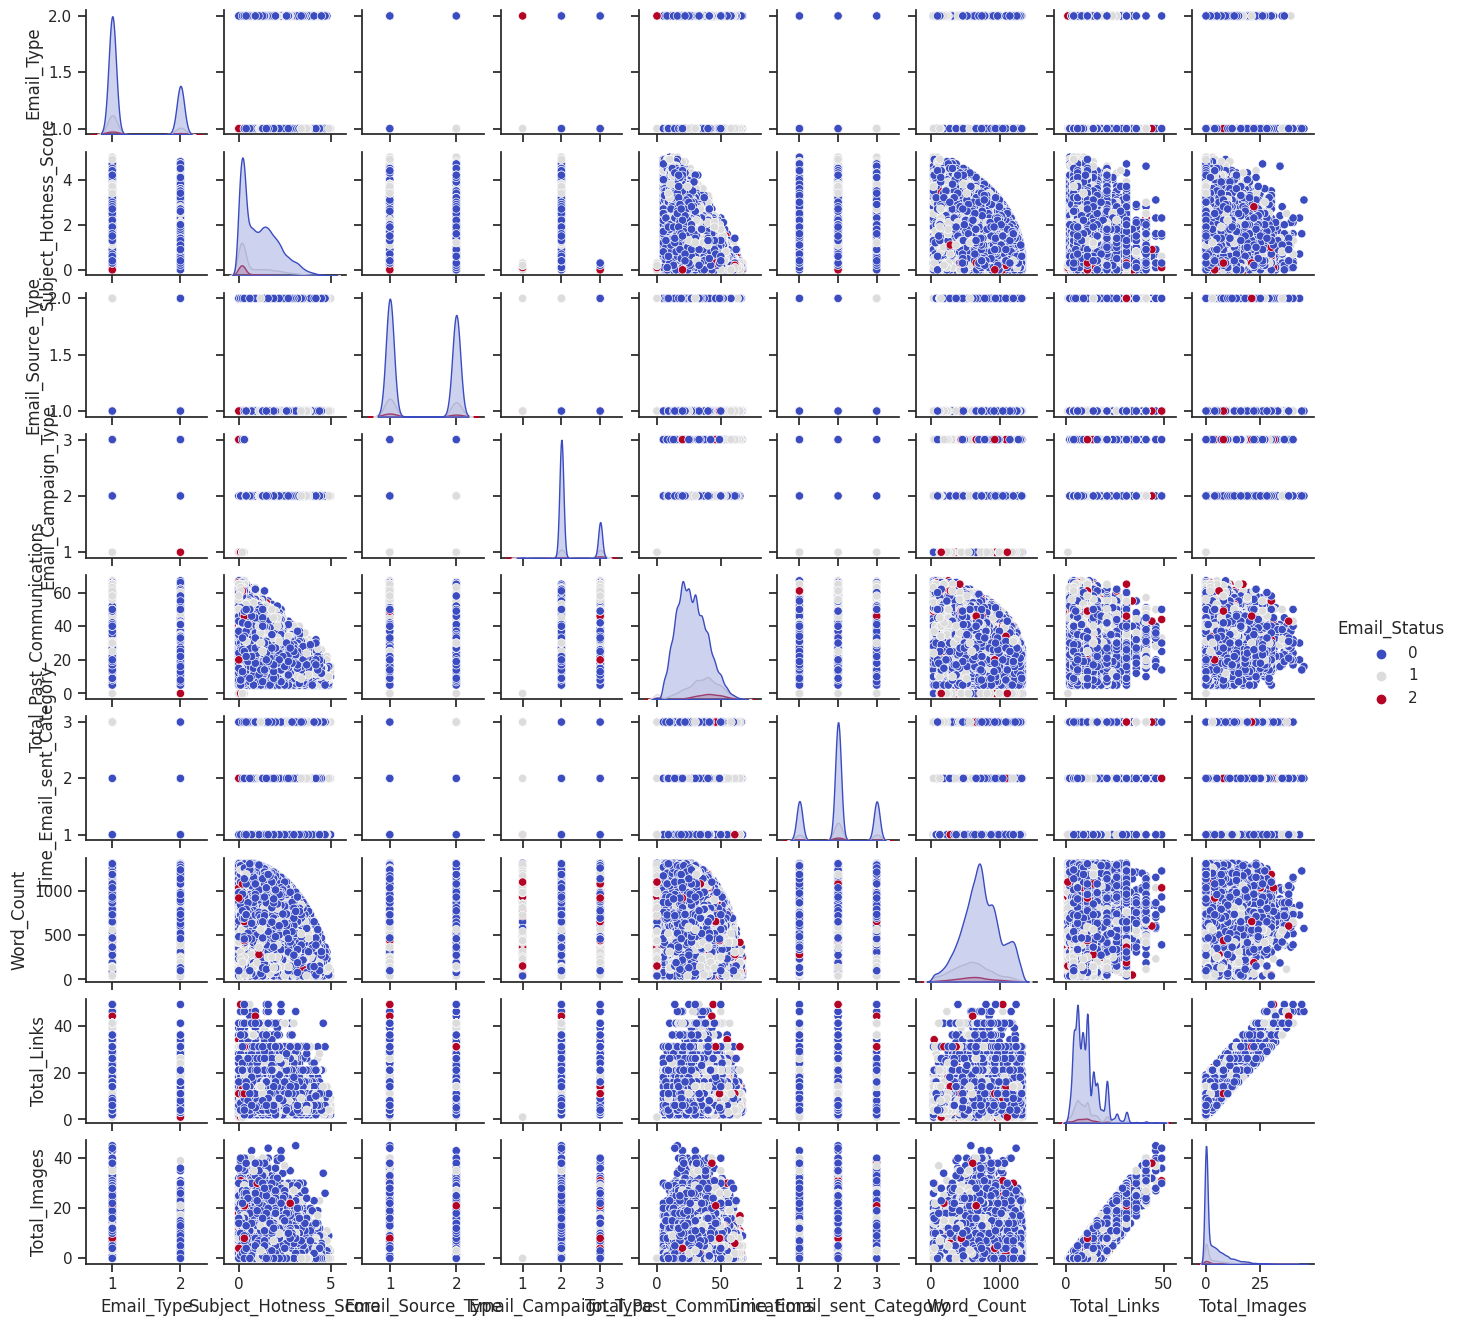

In [71]:
# Pair Plot visualization code
sns.pairplot(df,height=1.5, hue="Email_Status",palette= "coolwarm");

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. In order to assess the data patterns and relationships between the features, I employed a pair plot.


##### 2. What is/are the insight(s) found from the chart?

I discovered from the following chart that there are less linear relationships between variables, and since the majority of the data were categorical data with one or two categories, it did not demonstrate a significant association.

The correlation between the overall number of links and the total number of pixels is linear, as was already evident in the heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Status of the campaign won't be significantly affected by the Email_Type of the campaign.
* The email's Subject_Hotness_Score will not significantly affect the Total_Past_Communications.
* The Customer_Location won't significantly affect the email's total number of links or images.


### Hypothetical Statement - 1 
---
The Email_Status of the campaign won't be significantly affected by the Email_Type of the campaign.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

I used the chi-square test of independence, a statistical test to examine whether there is a statistically significant relationship between two categorical variables.

##### Why did you choose the specific statistical test?

The variables are categorical, and I want to find out if there is a relationship between them, thus this test is appropriate.

### Hypothetical Statement - 2

---
The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [73]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [74]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [75]:
# perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

I applied the Pearson's correlation test, which calculates the linear correlation between two continuous data.


##### Why did you choose the specific statistical test?

Because the variables are continuous and I want to find out if there is a linear relationship between them, this test is appropriate.


### Hypothetical Statement - 3
---
The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'], 
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'], 
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [77]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Images'], 
                                  df[df['Customer_Location'] == 'B']['Total_Images'],
                                  df[df['Customer_Location'] == 'C']['Total_Images'],
                                  df[df['Customer_Location'] == 'D']['Total_Images'], 
                                  df[df['Customer_Location'] == 'E']['Total_Images'],
                                  df[df['Customer_Location'] == 'F']['Total_Images'],
                                  df[df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [78]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(df[df['Customer_Location'] == 'A']['Total_Links'], 
                              df[df['Customer_Location'] == 'B']['Total_Links'],
                              df[df['Customer_Location'] == 'C']['Total_Links'],
                              df[df['Customer_Location'] == 'D']['Total_Links'], 
                              df[df['Customer_Location'] == 'E']['Total_Links'],
                              df[df['Customer_Location'] == 'F']['Total_Links'],
                              df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

Because ANOVA is a statistical test that is used to assess whether there is a statistically significant difference in the means of two or more groups, I used it to test this hypothesis.


##### Why did you choose the specific statistical test?

ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

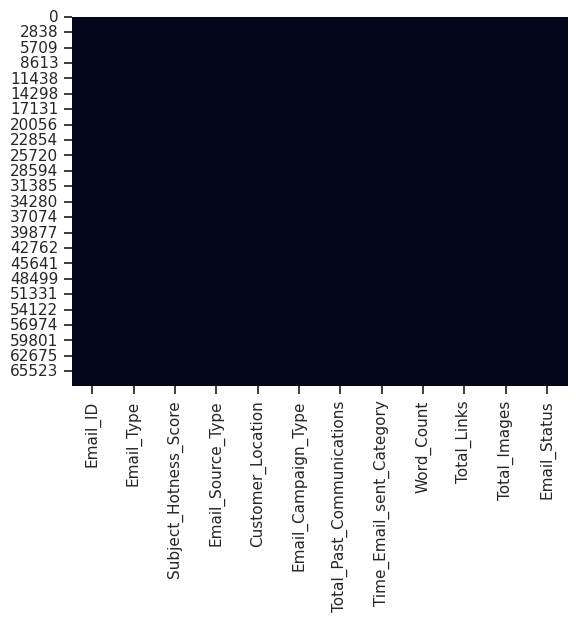

In [79]:
# Handling Missing Values & Missing Value Imputation
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False);

In [80]:
# Missing Value Calculation??
def showMissing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending = False)/len(df)*100

missingVal

Empty DataFrame
Columns: [Missing Data Count, Missing Data Percentage]
Index: []

* Since customer location is a categorial value and there is no way to know what this null value might be, the only way to replace a categorial value is to use mode to replace null values.


In [81]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

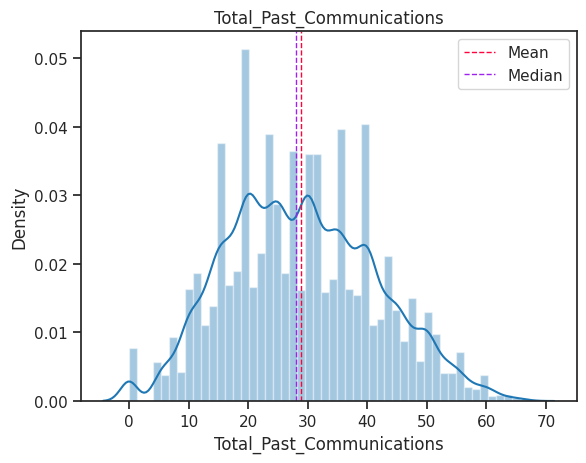

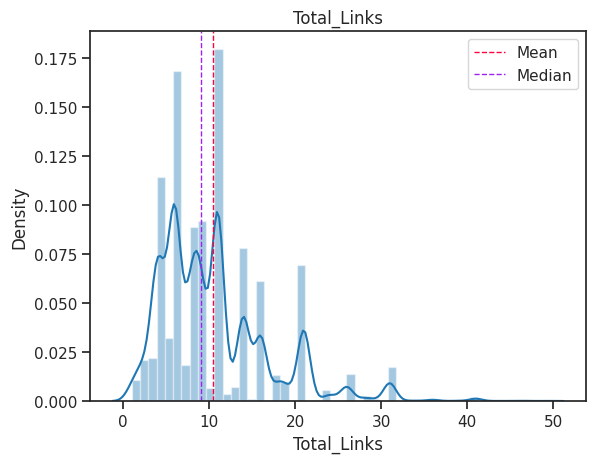

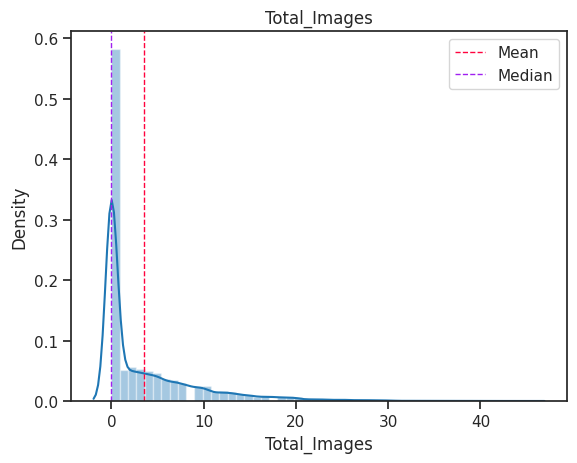

In [82]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'Mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='Median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

* Since only the total historical communication exhibits a nearly normal distribution and the other two exhibit right skew, the mean is used for the total communication, while the median is used for the other two because it is the most resistant to outliers.

In [83]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [84]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since location was categorial data, it was crucial to change the values utilising mode techniques because there was no way to know for sure what such locations might be and since there were roughly 20% of null values, deleting them could result in data loss.

There were two ways to replace the null values for the other two features, which were continuous data and exhibited right skewness, for total pas communication, which had a normal distribution and so substituted its null value using mean. However, because median gets less impacted by outliers than other approaches for right skew, I chose it to replace the null value.


### 2. Handling Outliers

In [85]:
# Handling Outliers & Outlier treatments in numerical feature
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Past_Communications', 'Total_Links', 'Total_Images', 'Word_Count']


In [86]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [87]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

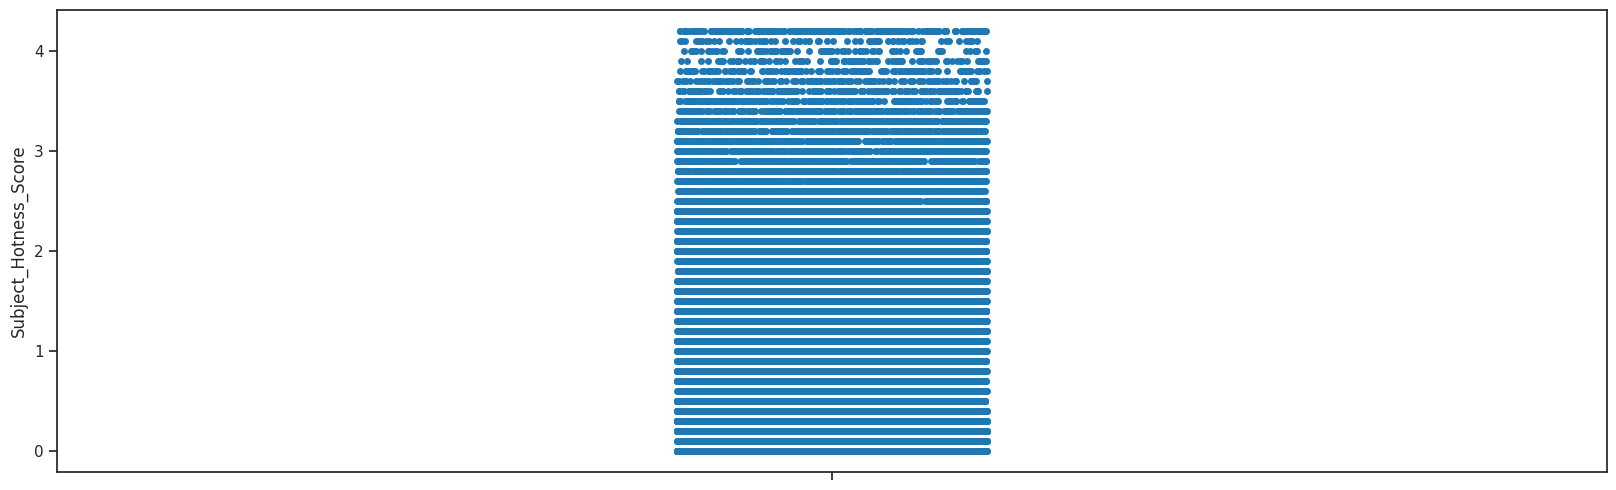

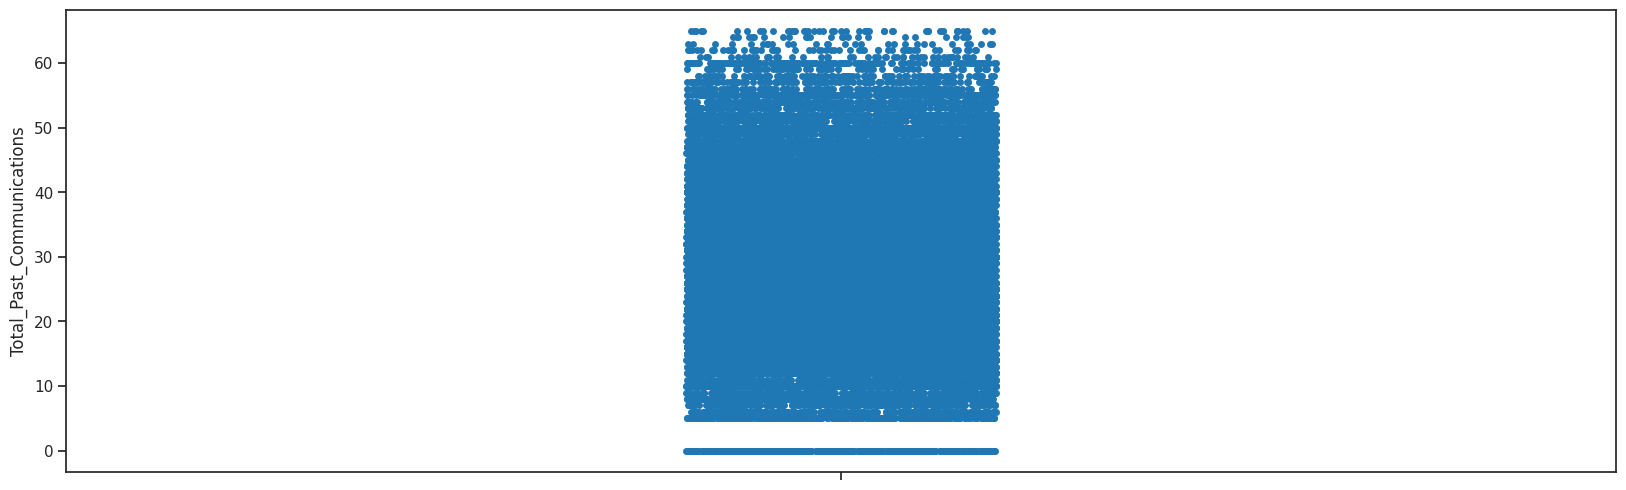

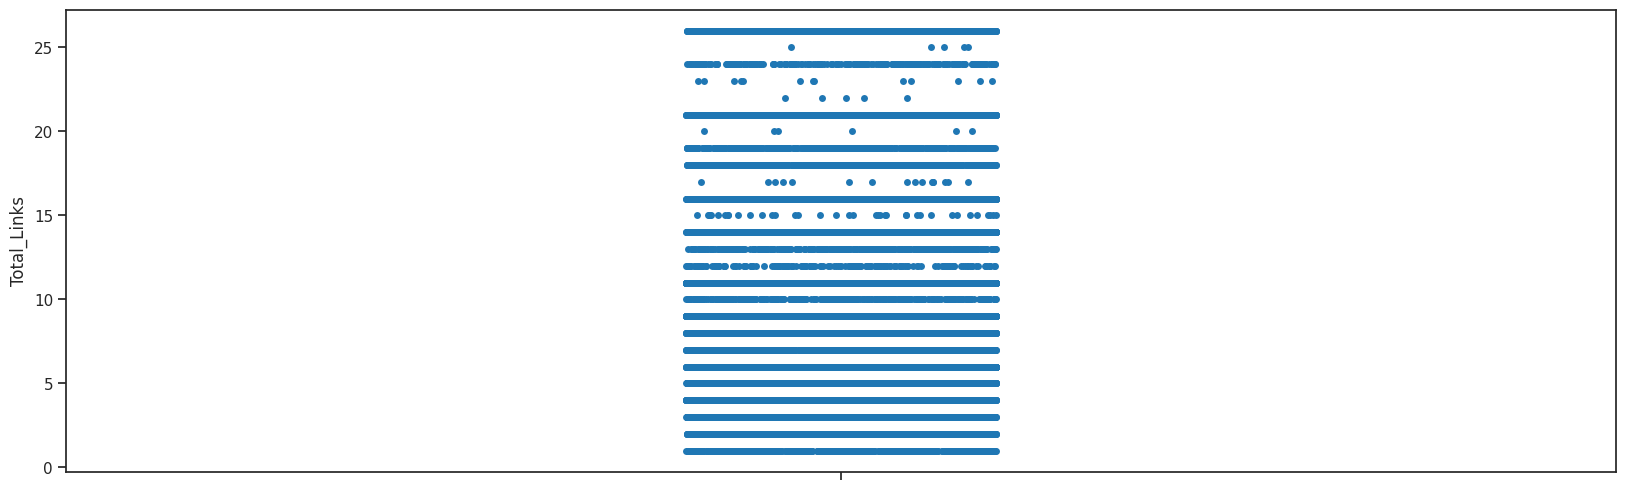

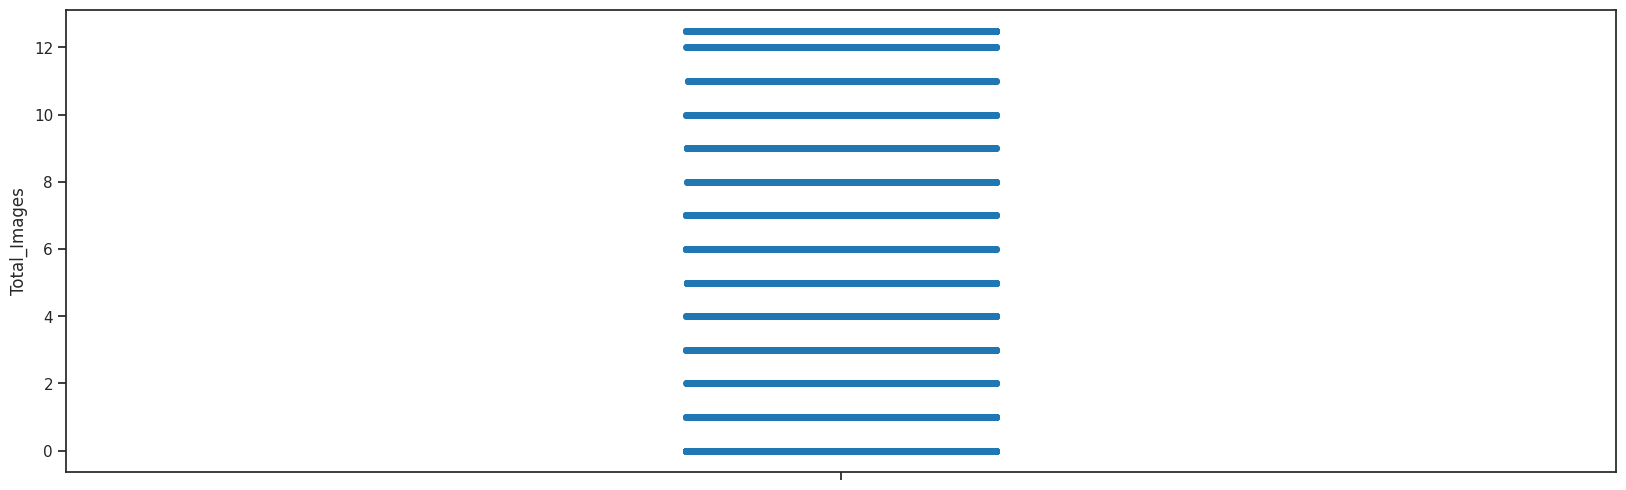

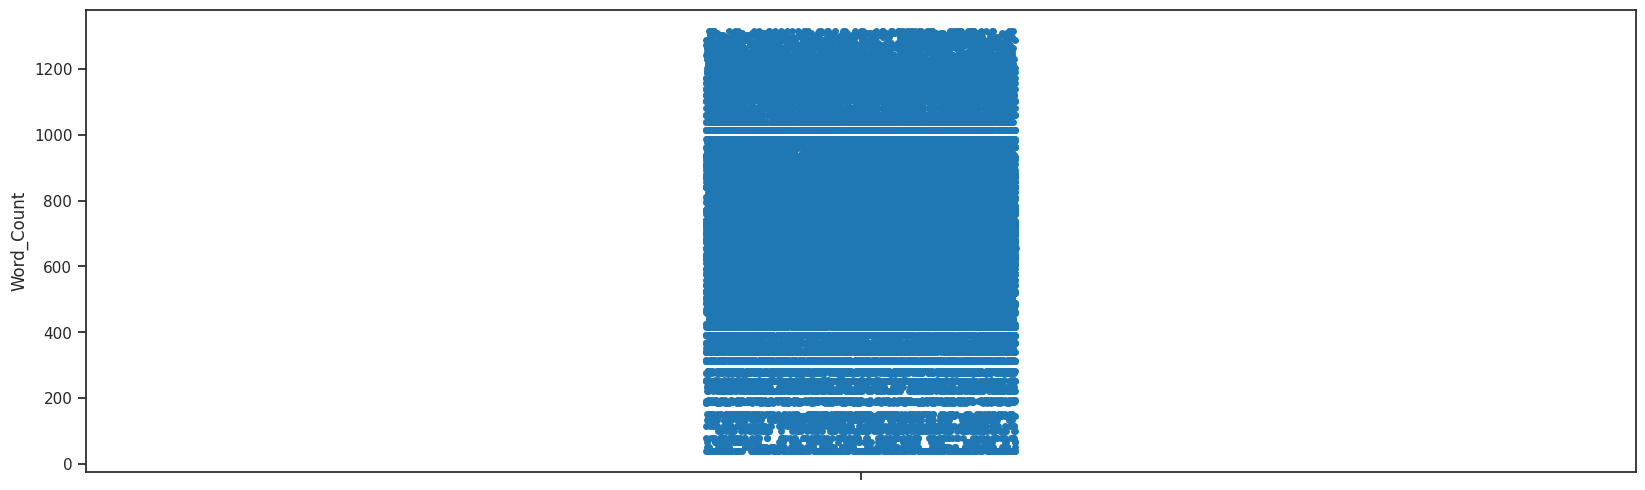

In [88]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in num_feature:
  fig=plt.figure(figsize=(20,6))
  sns.stripplot(df[col])
  plt.show()
  print('='*120)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I decide to separate the numerical values into symmetric and non-symmetric groups before removing outliers from them. Since there was no symmetric data available, I opted to cap the upper and lower limit values instead of just deleting them using the capping technique.


### 3. Categorical Encoding

In [89]:
#creating separate copy for categorial feature
cat_feature_encoding = cat_feature.copy()

In [90]:
# removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [91]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')


Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




* It is recommended to employ one-hot encoding over other binary, count, target, and ordinal encoding approaches since location does not exhibit any ordinal relationship. Even if there may be a chance that utilising one hot encoding on location may result in poor model performance, the decision to keep or remove the column will be made after a trial.

In [92]:
#creating copy
dff = df.copy()

In [93]:
# Encode your categorical columns
dff = pd.get_dummies(dff,columns= ['Time_Email_sent_Category','Customer_Location',
                                   'Email_Campaign_Type'], drop_first = True)

In [94]:
dff.head(1)

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   

   Total_Past_Communications  Word_Count  Total_Links  Total_Images  \
0                      33.00      440.00         8.00          0.00   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   

   Customer_Location_E  Customer_Location_F  Customer_Location_G  \
0                    1                    0                    0   

   Email_Campaign_Type_2  Email_Campaign_Type_3  
0                      1                      0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since the customer location and time email sent category does not display any ordinal relations and the remaining categorial features already had integer values that display ordinal relations that are advantageous to the compatibility model, I employed one hot encoding technique in this instance.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [95]:
# Manipulate Features to minimize feature correlation and create new features
dff.drop(columns = ['Email_ID'], inplace = True)

In [96]:
#combining total image and total link to find its percentage in total word count
# Percentage of words that are links+image
dff['Percentage_of_words_that_are_links_image'] = ((dff['Total_Links']+ dff['Total_Images'])/ dff['Word_Count'])*100

In [97]:
# Total Number of Images and link
dff['Images_per_link'] = dff['Total_Images'] + dff['Total_Links']

In [98]:
# Number of Images per link
dff['Images_plus_link'] = dff['Total_Images'] / dff['Total_Links']

In [99]:
#dropping total link and image 
dff.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [100]:
#replacing infinity values with 0
np.isinf(dff).values.sum()
dff.replace([np.inf, -np.inf], 0, inplace=True)

#### 2. Feature Selection

In [101]:
# Select your features wisely to avoid overfitting
dff.shape

(48291, 19)

#####Feature selection by removing columns from a dataset that have a low variance

In [102]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns 
          if column not in data.columns[var_thres.get_support()]] 
          #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var 

In [103]:
# Calling the function
df_removed_var=dropping_constant(dff)

Columns dropped: []


In [104]:
#correlation matrix

corr = df_removed_var.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

#####Multicolinearity

In [105]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [106]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Email_Type
Email_Source_Type
Total_Past_Communications
Word_Count
Customer_Location_G
Email_Campaign_Type_2
Email_Campaign_Type_3


In [107]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [108]:
correlation(df_removed_var,0.6)

['Email_Campaign_Type_3',
 'Email_Campaign_Type_2',
 'Time_Email_sent_Category_3',
 'Images_plus_link']

In [109]:
#dropping highly correlated values
df_removed=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G','Email_Source_Type'],axis=1)
df_removed.shape

(48291, 16)

In [110]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()
  
#removing dependent variable from column
X.drop(columns=['Email_Status'], axis =1, inplace = True)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Series([], Name: feature, dtype: object)

In [111]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Email_Status']]])

variables  VIF
0                                 Email_Type 7.91
1                      Subject_Hotness_Score 2.83
2                  Total_Past_Communications 5.73
3                                 Word_Count 7.39
4                 Time_Email_sent_Category_2 3.80
5                 Time_Email_sent_Category_3 1.92
6                        Customer_Location_B 1.17
7                        Customer_Location_C 1.23
8                        Customer_Location_D 1.29
9                        Customer_Location_E 1.40
10                       Customer_Location_F 1.17
11                     Email_Campaign_Type_3 2.23
12  Percentage_of_words_that_are_links_image 2.36
13                           Images_per_link 6.35
14                          Images_plus_link 2.83

##### What all feature selection methods have you used  and why?

We used dropping constant features, dropping multicolinear columns, and VIF validation.

##### Which all features you found important and why?

In [112]:
#important features
df_removed.columns.to_list()

['Email_Type',
 'Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Email_Campaign_Type_3',
 'Percentage_of_words_that_are_links_image',
 'Images_per_link',
 'Images_plus_link']

In [113]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [114]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Email_Status"],axis=1),y=df["Email_Status"])

Features  Importances
6                        Customer_Location_B         0.01
10                       Customer_Location_F         0.01
7                        Customer_Location_C         0.01
8                        Customer_Location_D         0.01
0                                 Email_Type         0.01
5                 Time_Email_sent_Category_3         0.02
9                        Customer_Location_E         0.02
4                 Time_Email_sent_Category_2         0.02
11                     Email_Campaign_Type_3         0.03
14                          Images_plus_link         0.07
13                           Images_per_link         0.11
1                      Subject_Hotness_Score         0.12
3                                 Word_Count         0.17
12  Percentage_of_words_that_are_links_image         0.18
2                  Total_Past_Communications         0.19

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [115]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Customer_Location_B', 'Customer_Location_F']
Skew Symmetric Distributed Features : - ['Email_Type', 'Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Email_Status', 'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3', 'Customer_Location_C', 'Customer_Location_D', 'Customer_Location_E', 'Email_Campaign_Type_3', 'Percentage_of_words_that_are_links_image', 'Images_per_link', 'Images_plus_link']


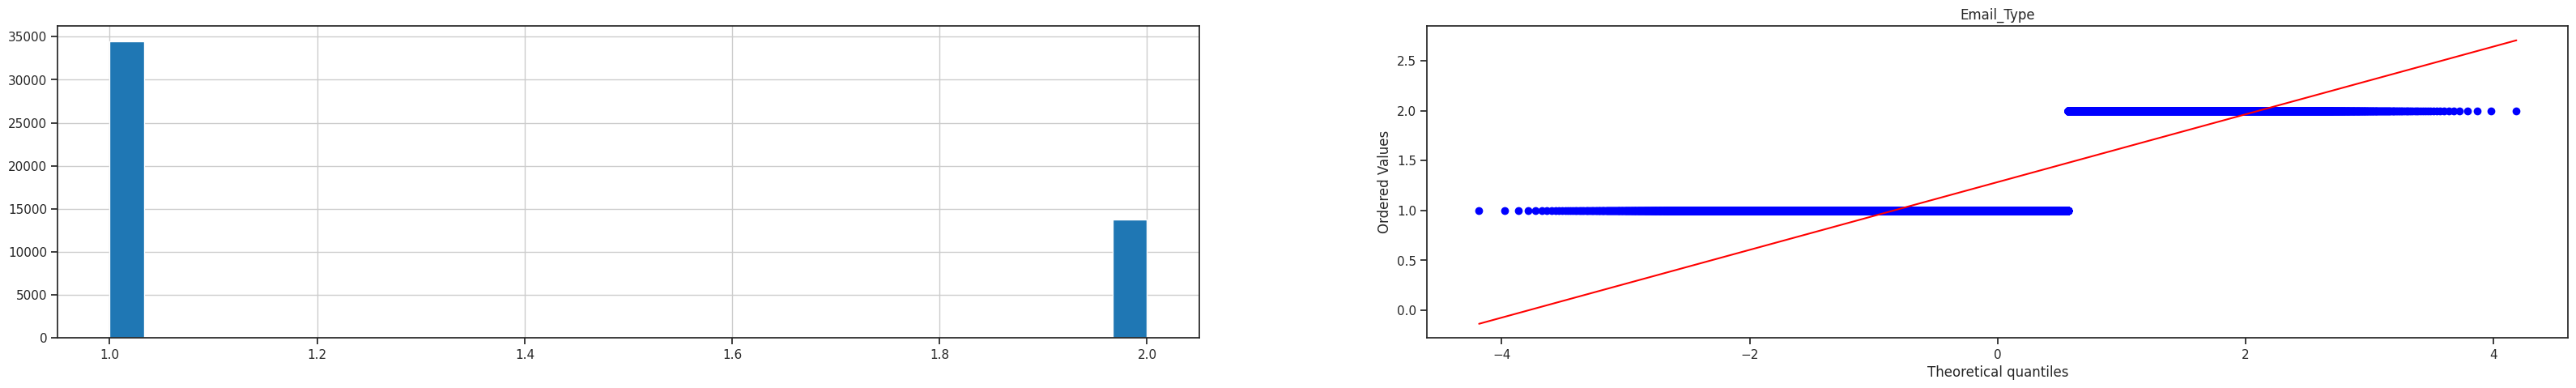

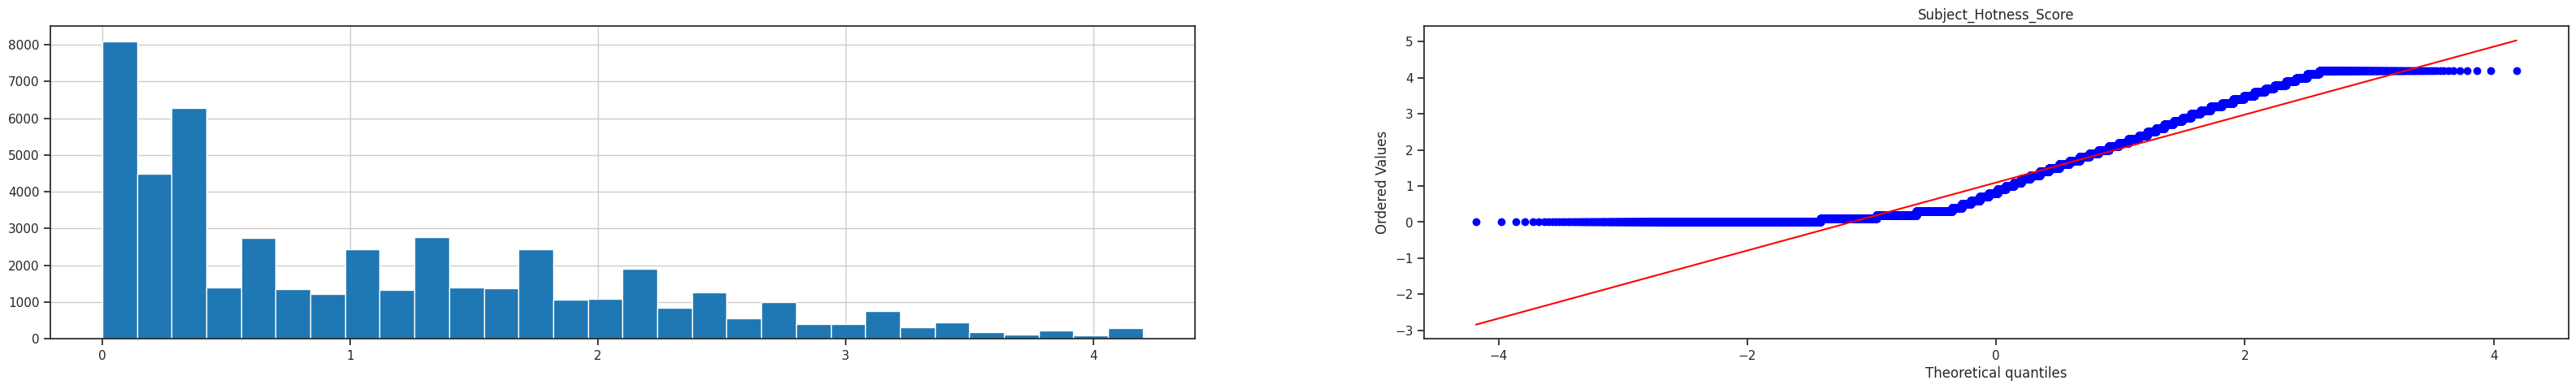

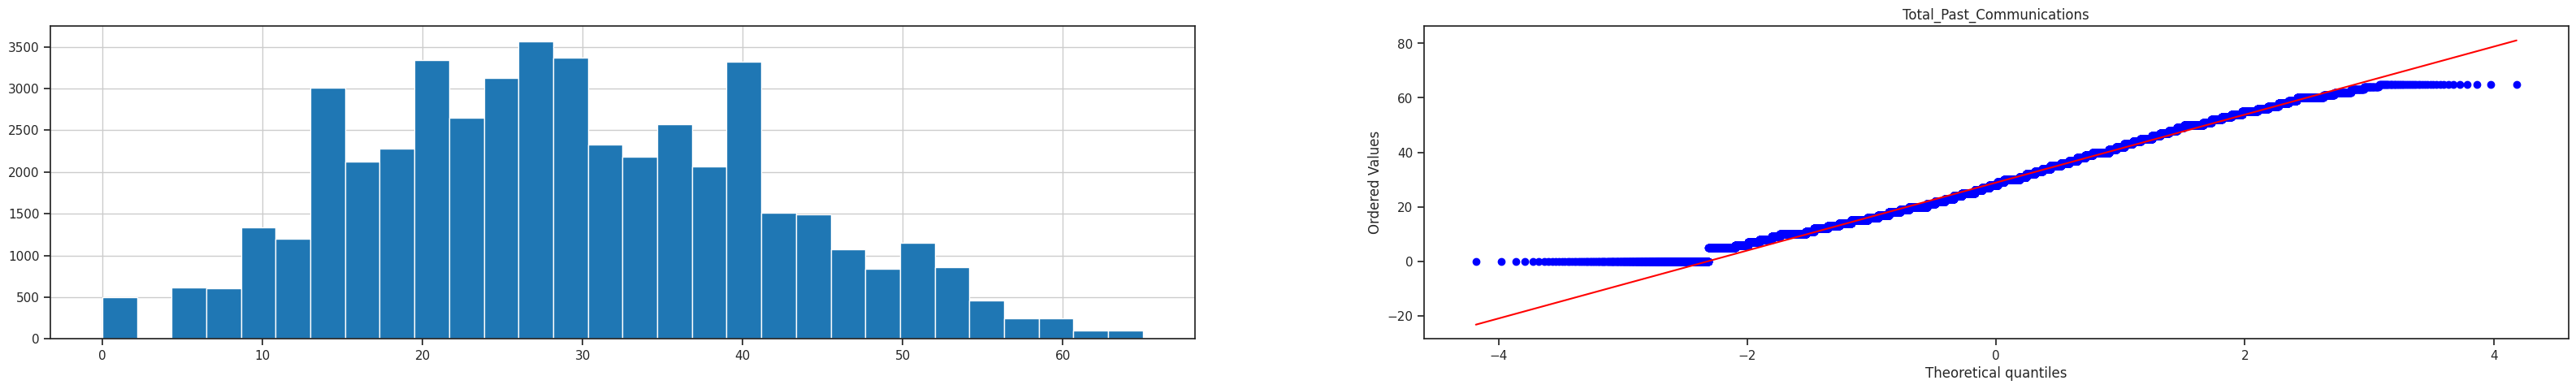

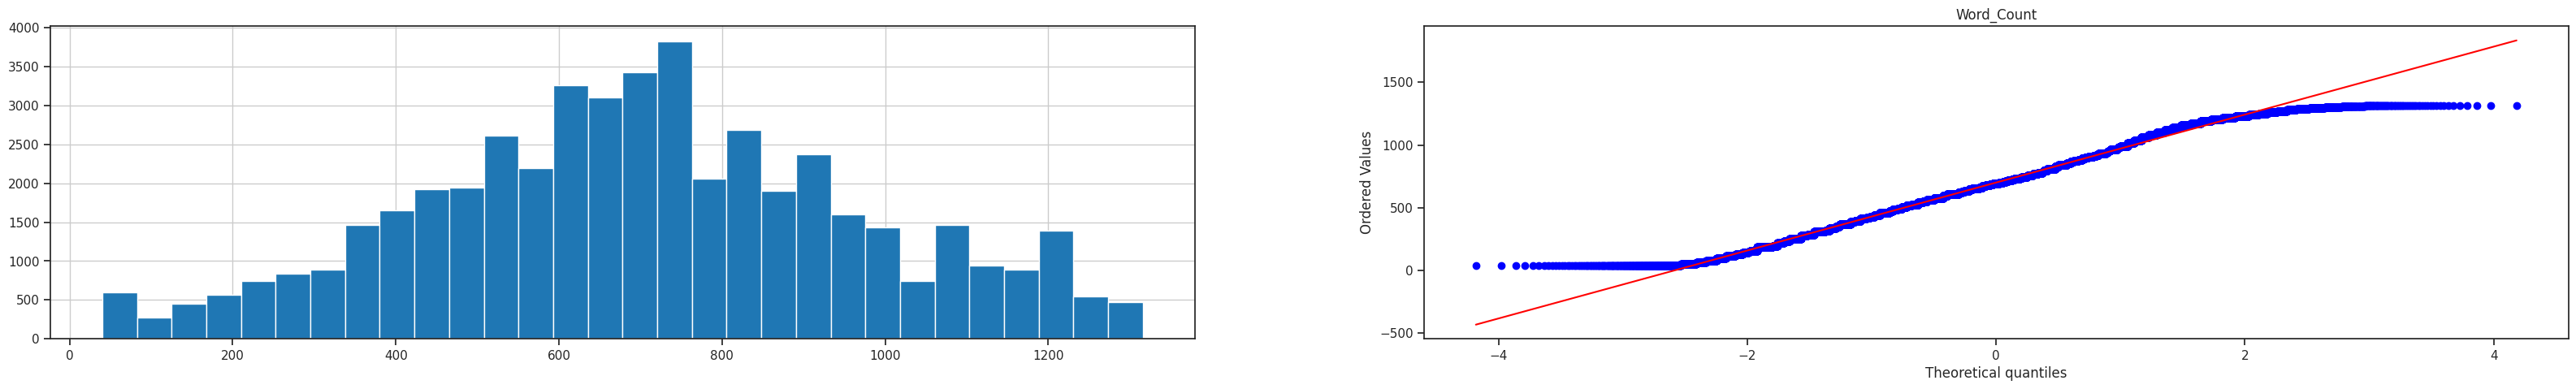

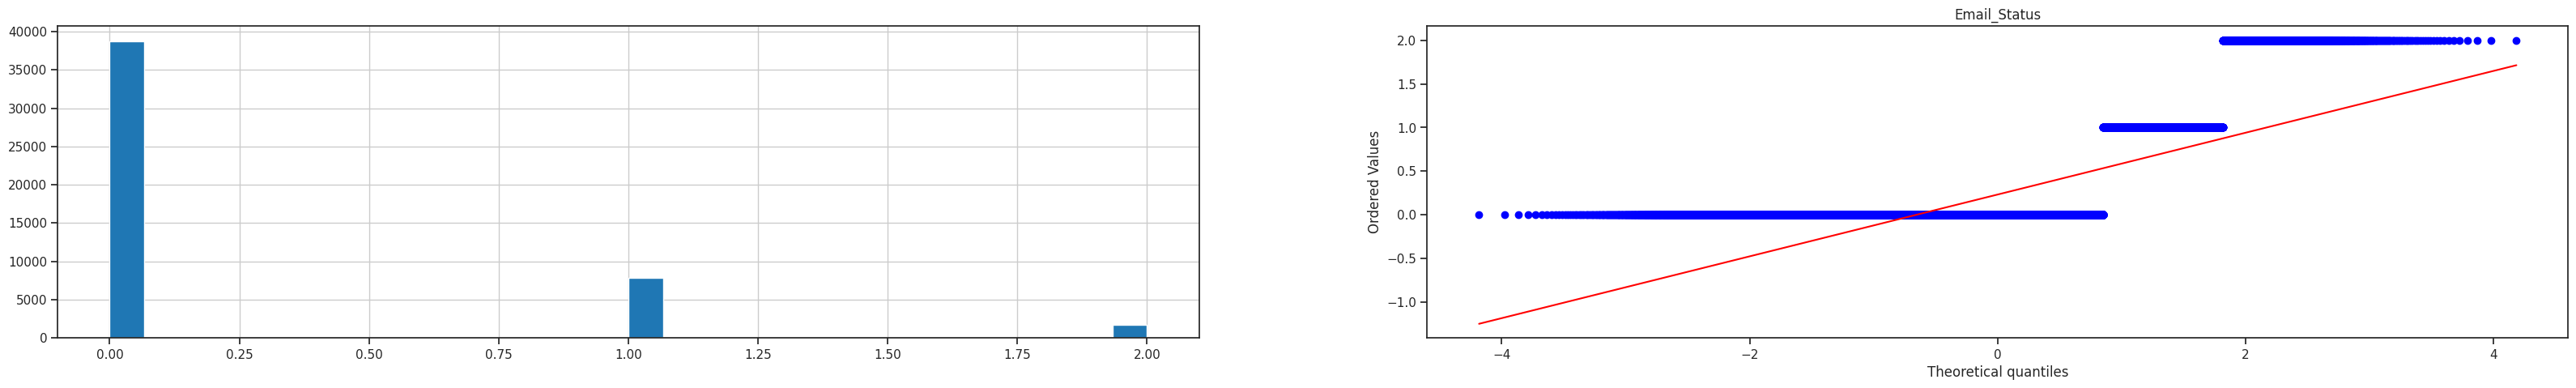

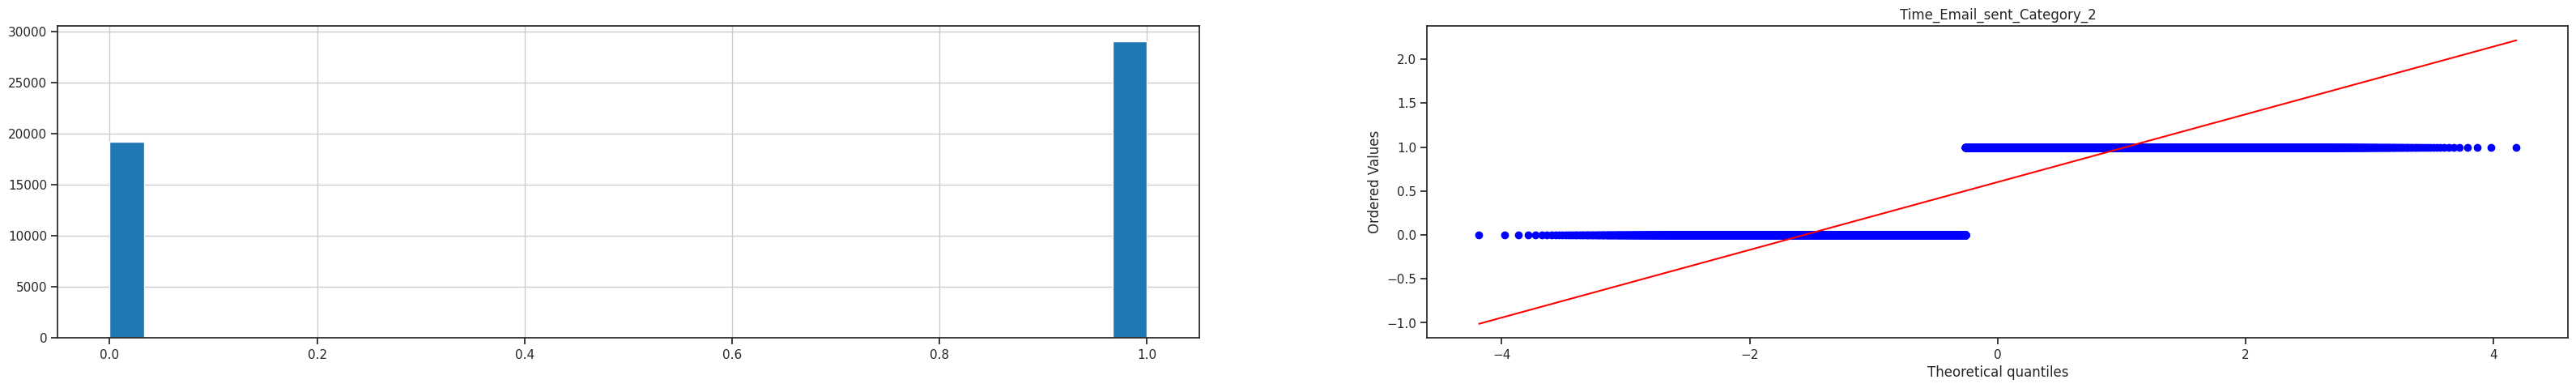

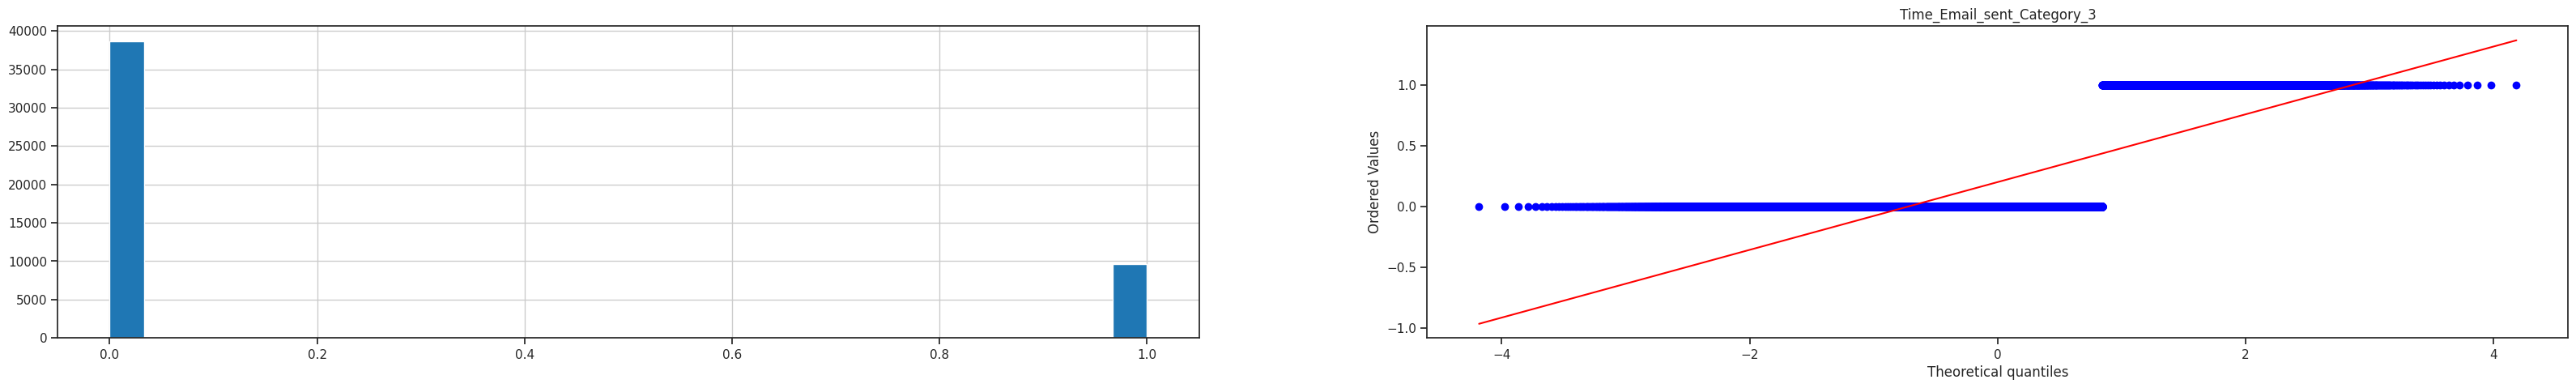

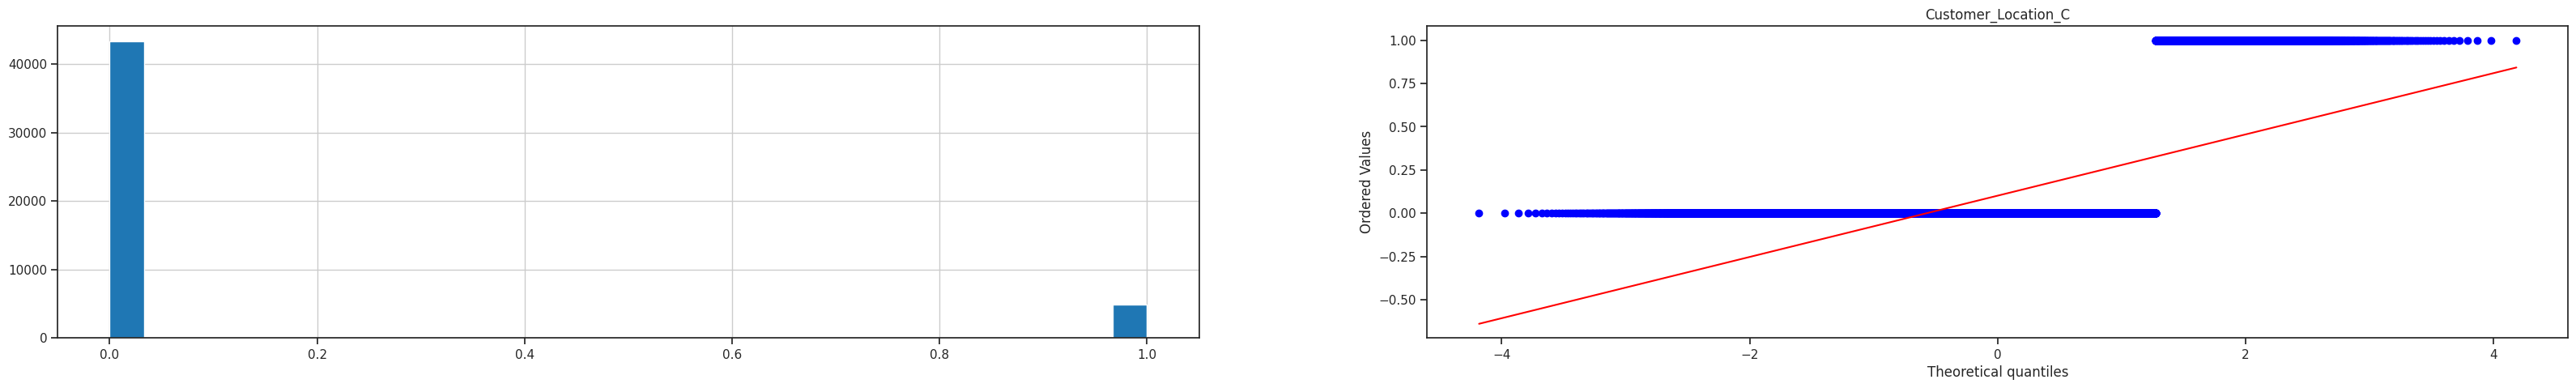

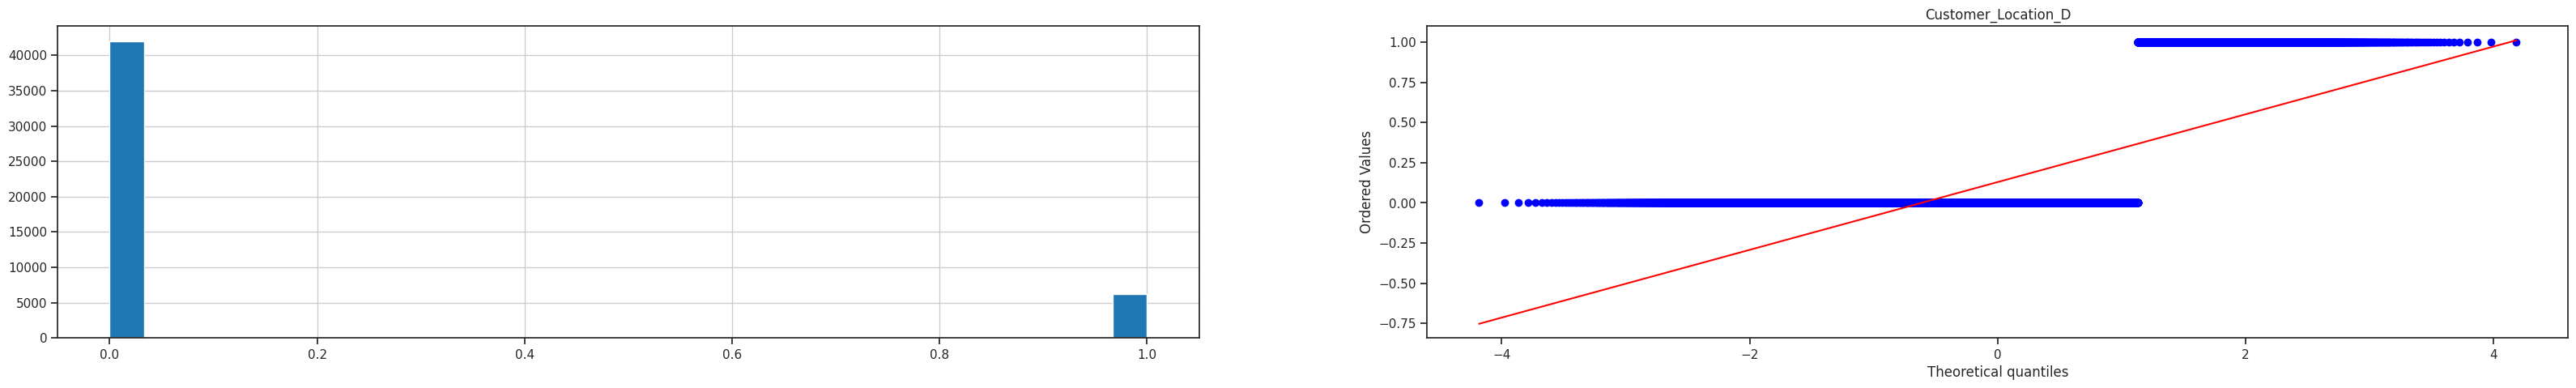

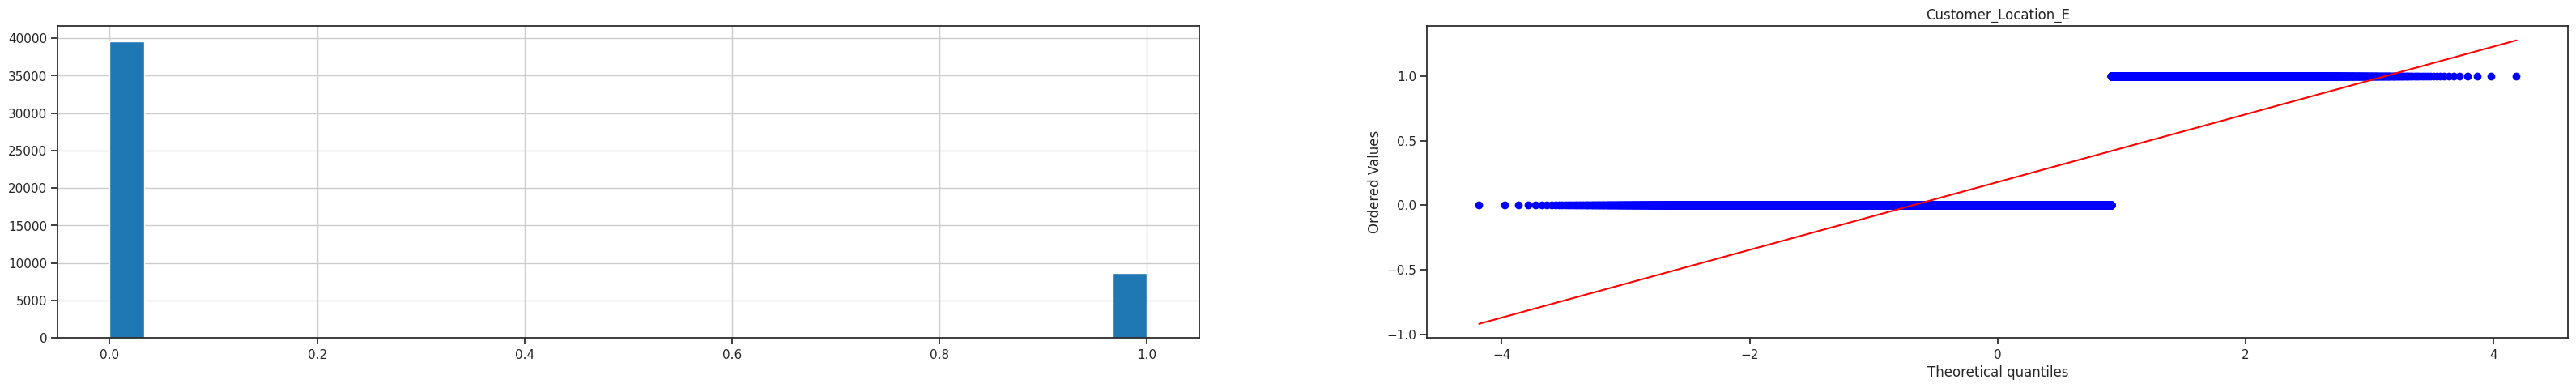

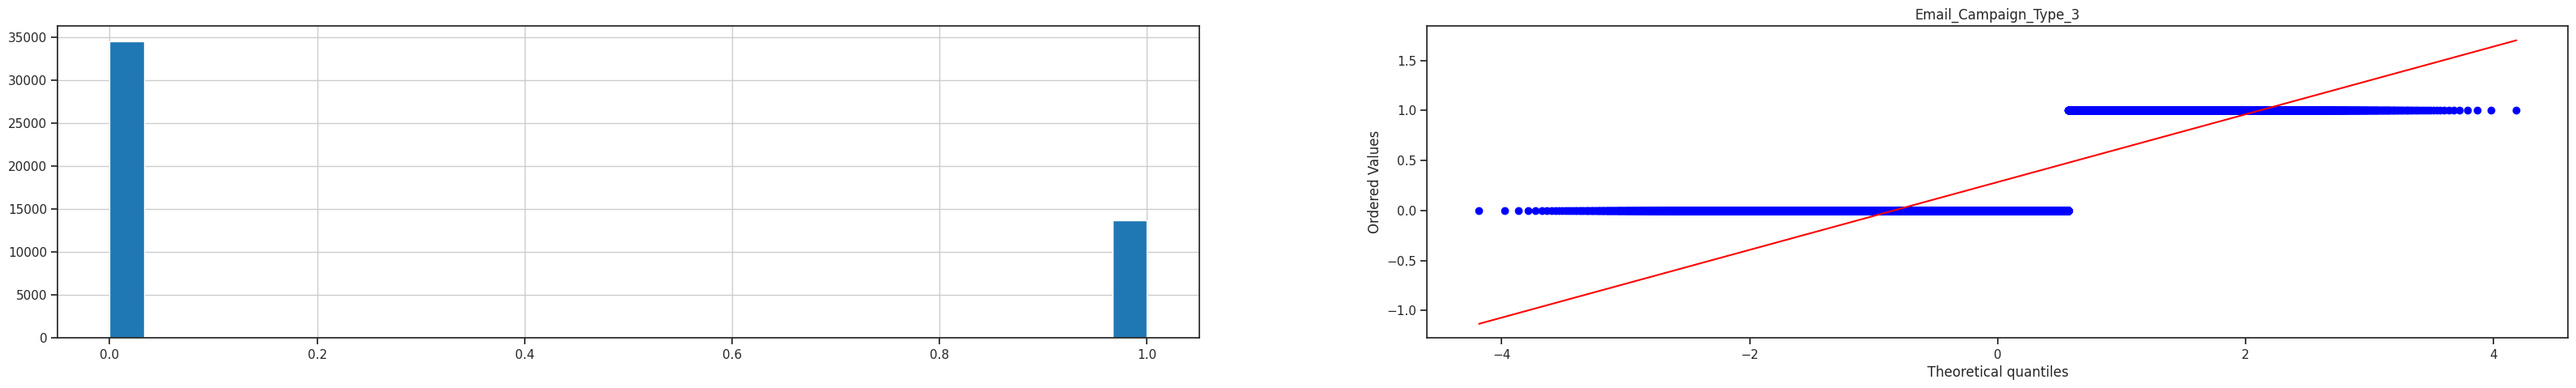

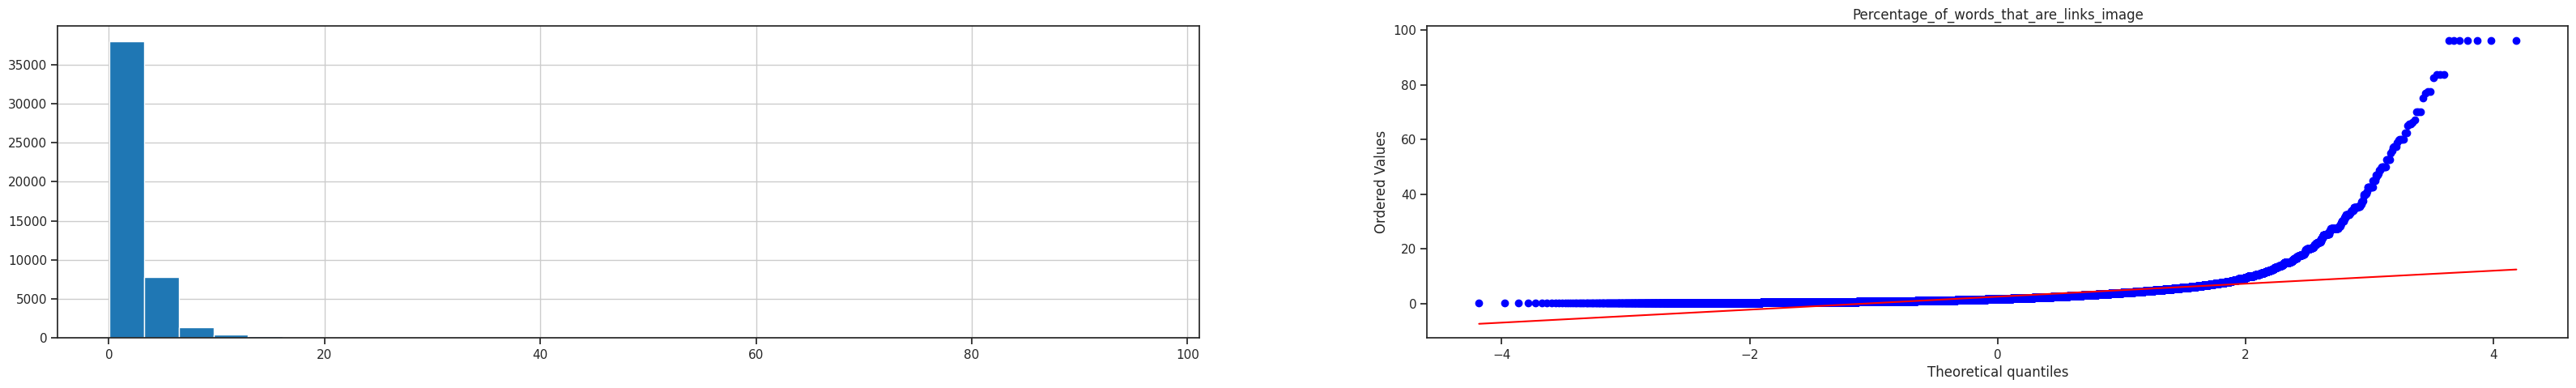

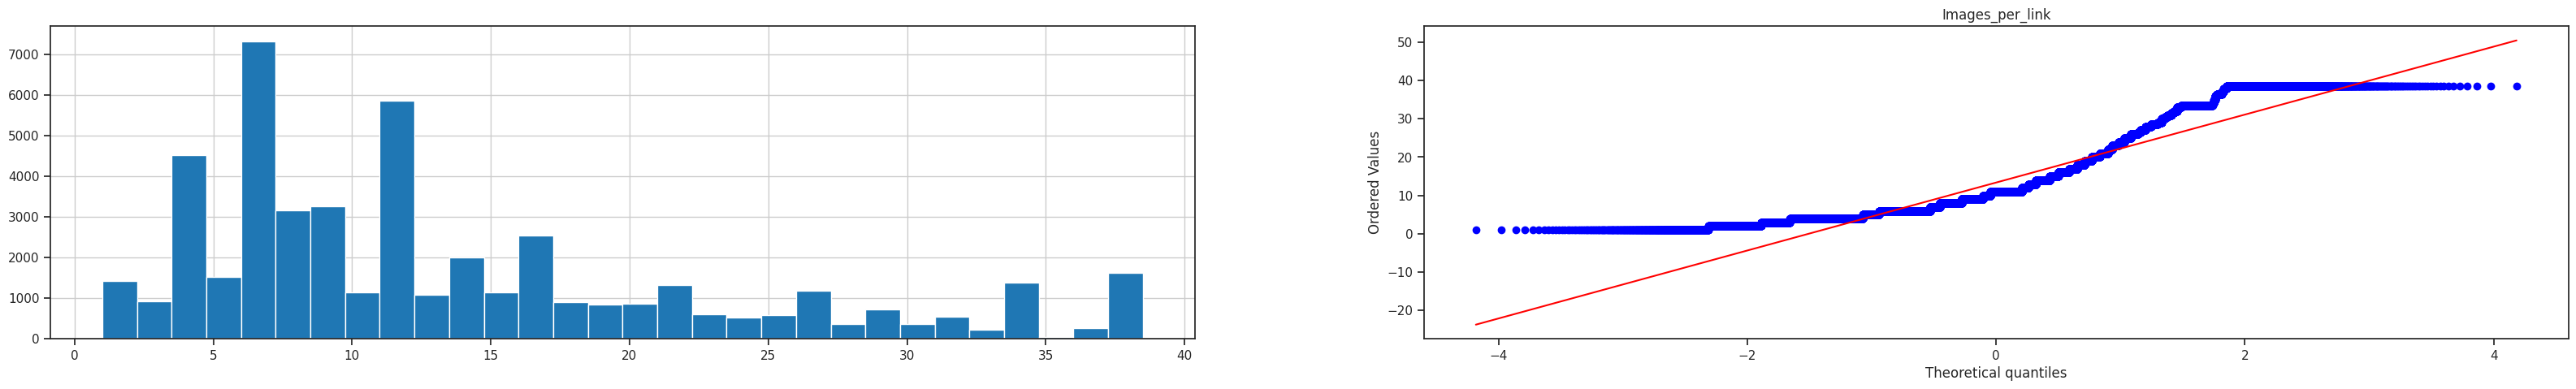

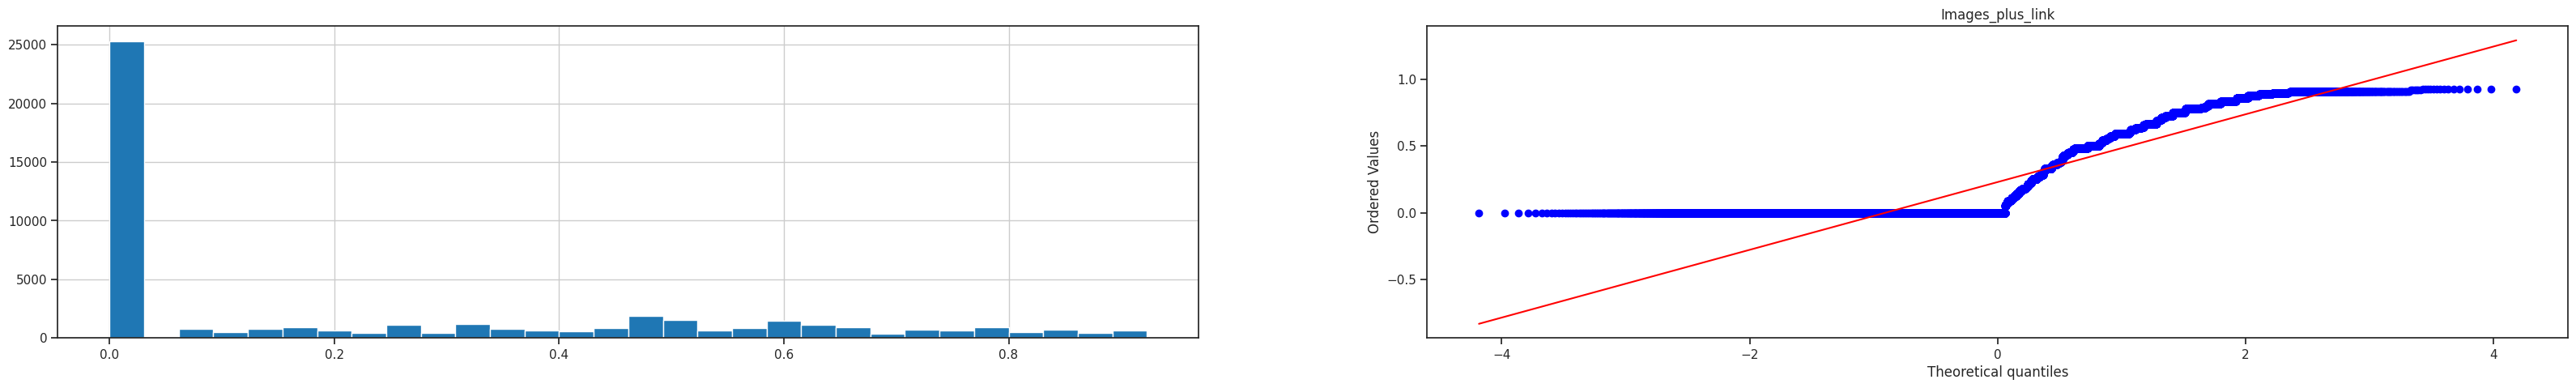

In [116]:
#vizualization 
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(40,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [117]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count']:
  df_removed[col]=np.sqrt(df_removed[col])

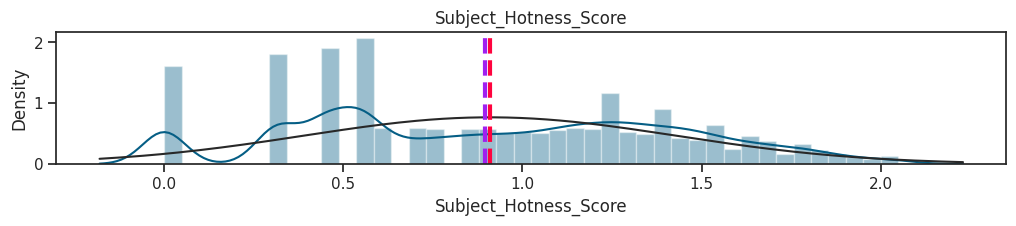

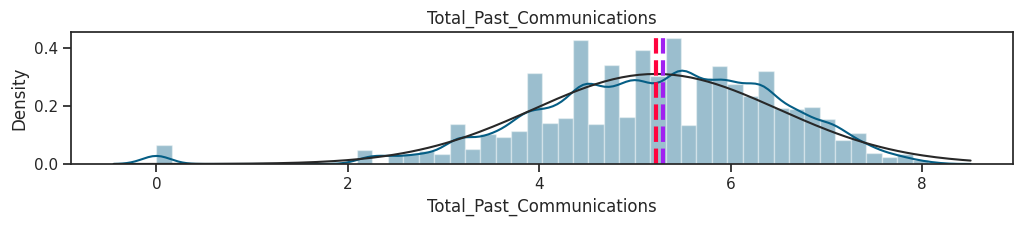

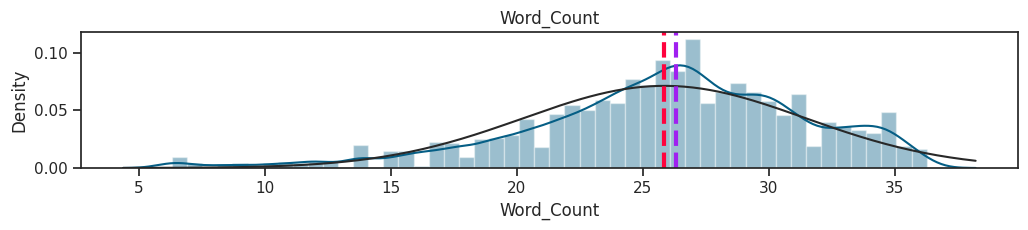

In [118]:
for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count']) :
    plt.figure(figsize = (20,12))
    plt.subplot(6,2,i+1);
    sns.distplot(df_removed[col], color = '#055E85', fit = norm);
    feature = df_removed[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

Since some of the features had categorial features and didn't need to be transformed, I used square root transformation to three of the features to convert them into gaussian normal distribution.


### 6. Data Scaling

In [119]:
# Scaling your data
# Checking the data
df_removed.head()

Email_Type  Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0           1                   1.48                       5.74       20.98   
2           2                   0.32                       6.00       31.02   
3           1                   1.73                       5.00       24.70   
4           1                   0.00                       4.24       30.77   
6           1                   1.79                       5.83       10.77   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   
2             1                           1                           0   
3             0                           1                           0   
4             0                           1                           0   
6             0                           0                           1   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   
6                    0                    0                    0   

   Customer_Location_E  Customer_Location_F  Email_Campaign_Type_3  \
0                    1                    0                      0   
2                    0                    0                      1   
3                    1                    0                      0   
4                    0                    0                      1   
6                    1                    0                      0   

   Percentage_of_words_that_are_links_image  Images_per_link  Images_plus_link  
0                                      1.82             8.00              0.00  
2                                      0.52             5.00              0.00  
3                                      2.62            16.00              0.00  
4                                      0.42             4.00              0.00  
6                                      3.45             4.00              0.00

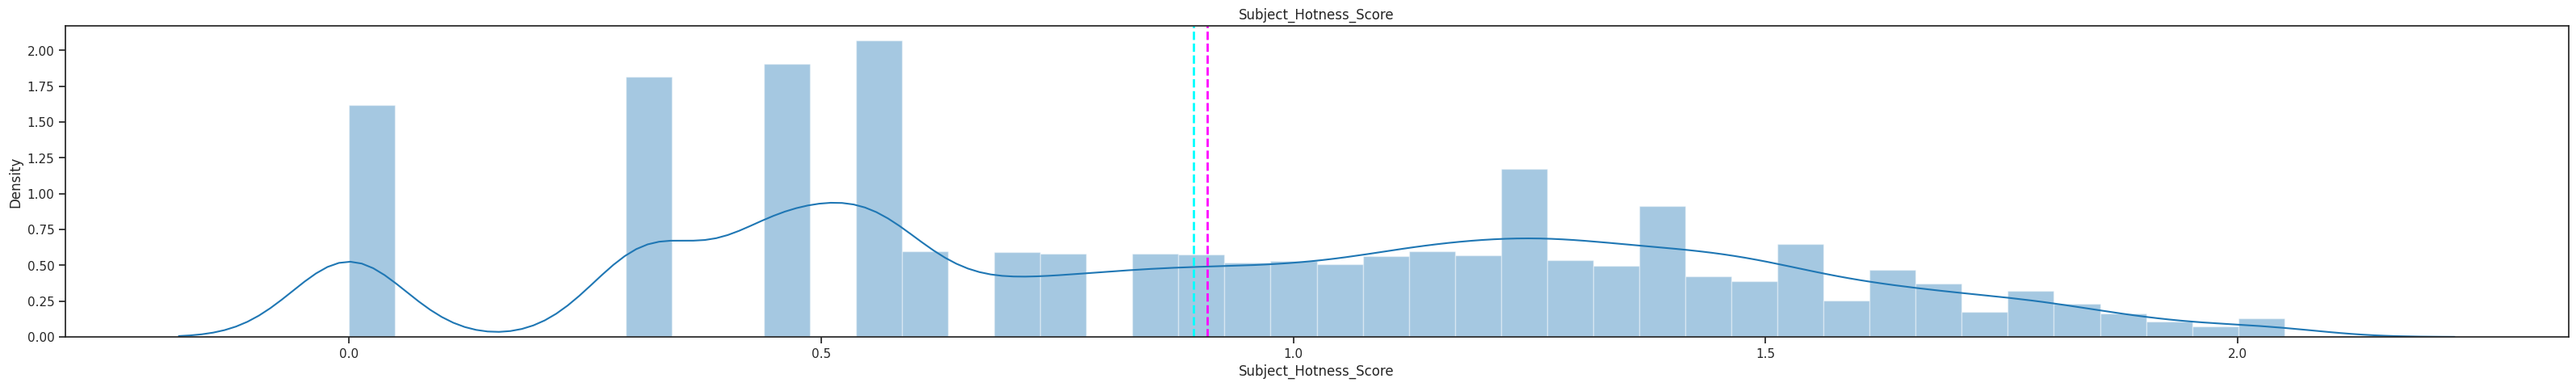

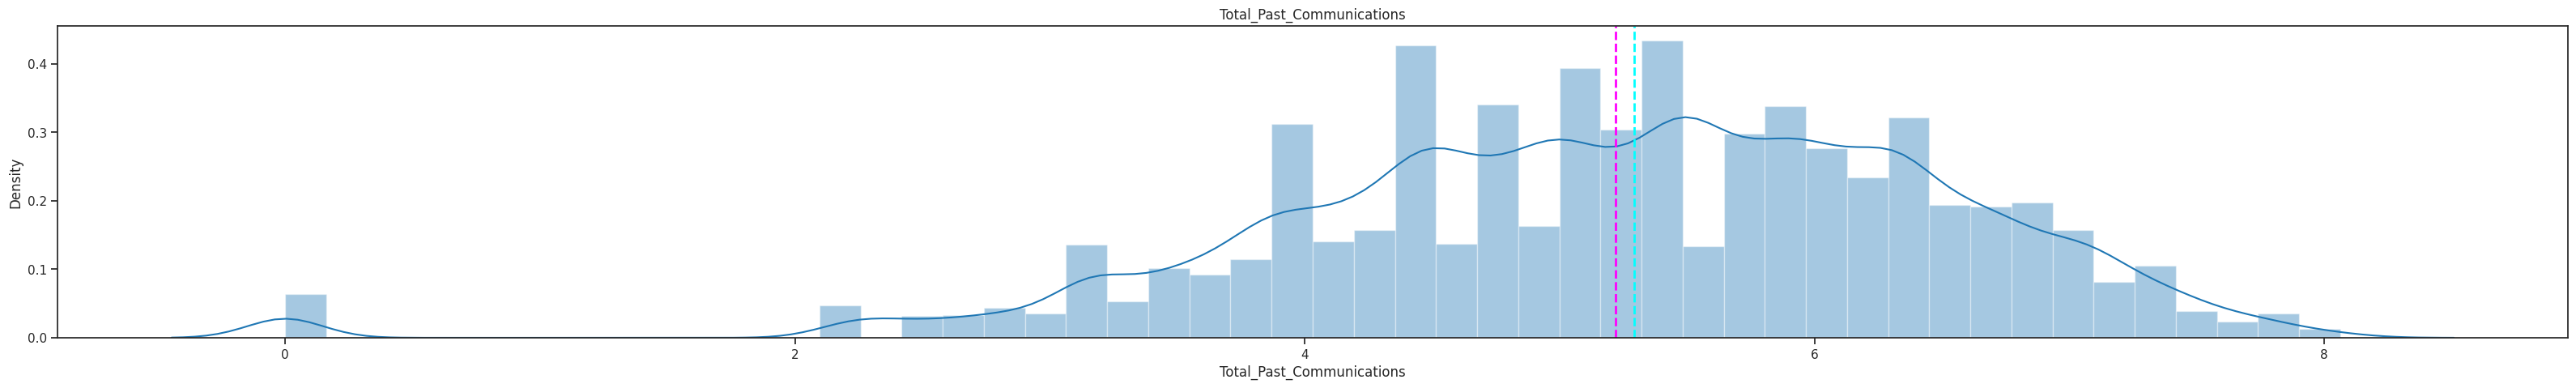

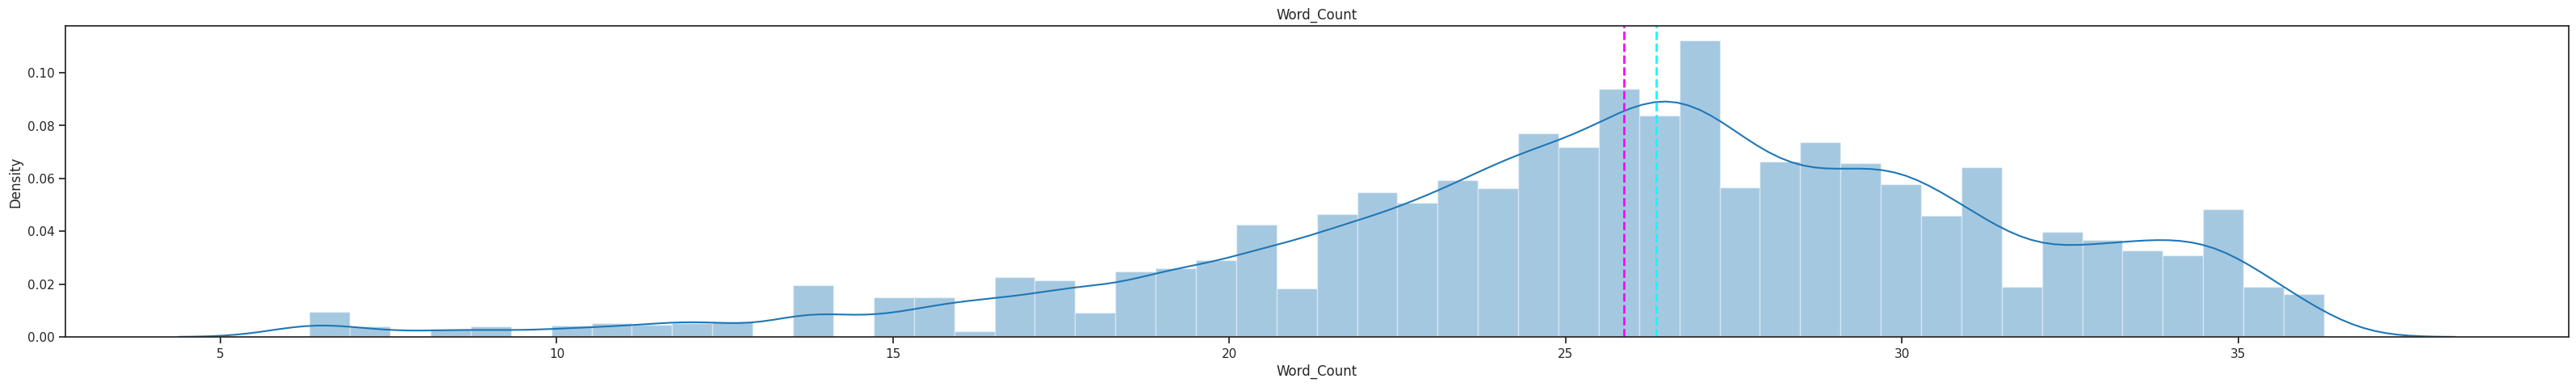

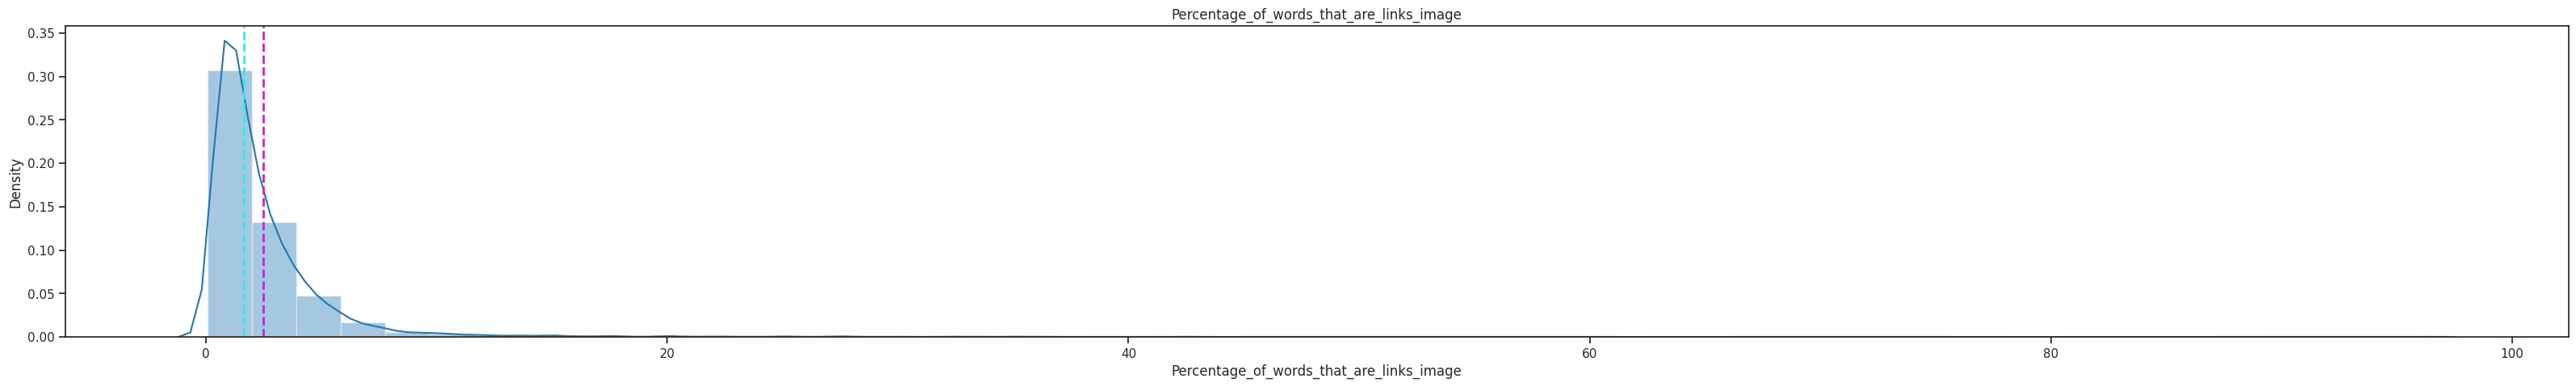

In [120]:

# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  fig=plt.figure(figsize=(40,5))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [121]:
#standard scaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  df_removed[col] = StandardScaler().fit_transform(df_removed[col].values.reshape(-1, 1))

In [122]:
df_removed.head()

Email_Type  Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0           1                   1.11                       0.41       -0.87   
2           2                  -1.14                       0.61        0.92   
3           1                   1.58                      -0.17       -0.21   
4           1                  -1.75                      -0.76        0.88   
6           1                   1.69                       0.48       -2.70   

   Email_Status  Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0             0                           0                           0   
2             1                           1                           0   
3             0                           1                           0   
4             0                           1                           0   
6             0                           0                           1   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   
6                    0                    0                    0   

   Customer_Location_E  Customer_Location_F  Email_Campaign_Type_3  \
0                    1                    0                      0   
2                    0                    0                      1   
3                    1                    0                      0   
4                    0                    0                      1   
6                    1                    0                      0   

   Percentage_of_words_that_are_links_image  Images_per_link  Images_plus_link  
0                                     -0.19             8.00              0.00  
2                                     -0.55             5.00              0.00  
3                                      0.04            16.00              0.00  
4                                     -0.58             4.00              0.00  
6                                      0.27             4.00              0.00

##### Which method have you used to scale you data and why?

We have use Standard scaler for data scaling as it is the simplest method and with a good scaling ratio

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

There is no need for dimensionality reduction on this dataset.

A method for reducing the number of features in a dataset is dimensionality reduction. It is frequently utilised when there are a lot of features, as this might result in issues like overfitting and sluggish computation.

In [123]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not need

### 8. Data Splitting

In [124]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_removed.drop("Email_Status",axis=1),df_removed["Email_Status"], 
    test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (38632, 15)
Number transactions y_train dataset:  (38632,)
Number transactions X_test dataset:  (9659, 15)
Number transactions y_test dataset:  (9659,)


##### What data splitting ratio have you used and why? 

As test data for the data splitting, 20% of the data has been divided. Since the training model is still fairly tiny, 80% of the data would be enough to evaluate it.


### 9. Handling Imbalanced Dataset

In [125]:
df['Email_Status'].value_counts()

0    38772
1     7841
2     1678
Name: Email_Status, dtype: int64

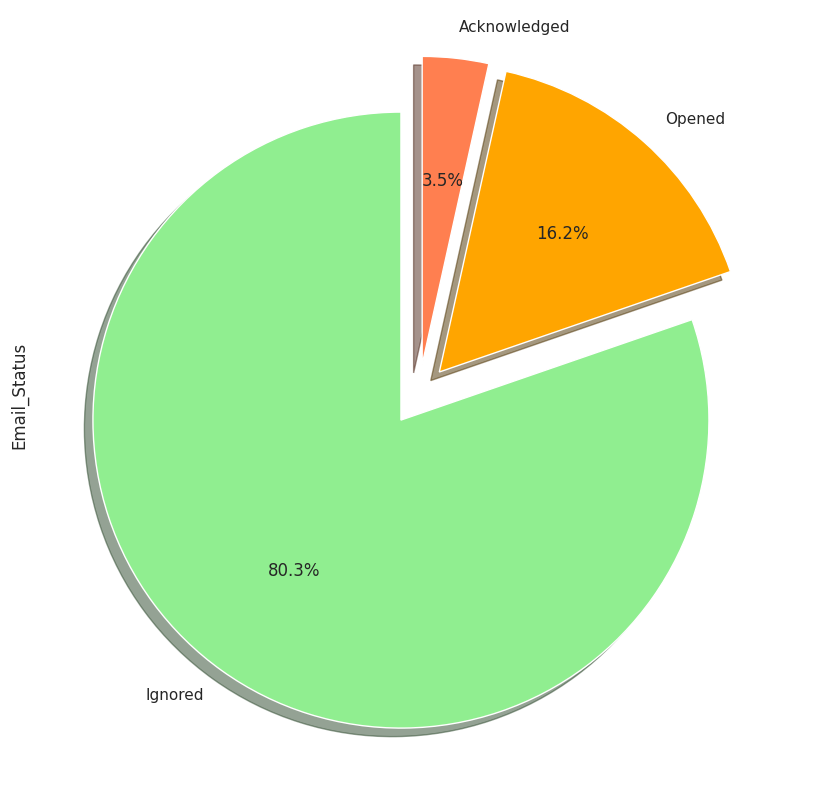

In [126]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(22,10),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Ignored','Opened','Acknowledged'],
                               colors=['lightgreen','orange','coral'],
                               explode=[0.1,0.1,0.1]
                              );

##### Do you think the dataset is imbalanced? Explain Why.

The dataset dependant column data ratio in our situation is 80:16:4. Therefore, it is evident that there will be bias when building models and that they will typically have a good chance of predicting the majority. As a result, the dataset needs to be balanced before moving on to the model construction phase.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [127]:
#SMOTE
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (93108, 15)
Number transactions y_train dataset:  (93108,)
Number transactions X_test dataset:  (9659, 15)
Number transactions y_test dataset:  (9659,)


Class=0, n=31036 (33.333%)
Class=1, n=31036 (33.333%)
Class=2, n=31036 (33.333%)


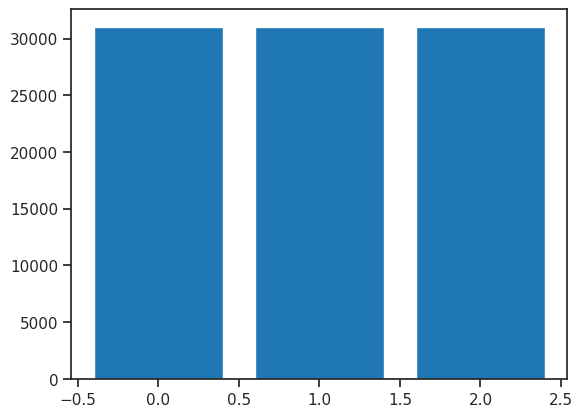

In [128]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 80:16:4 dataset.

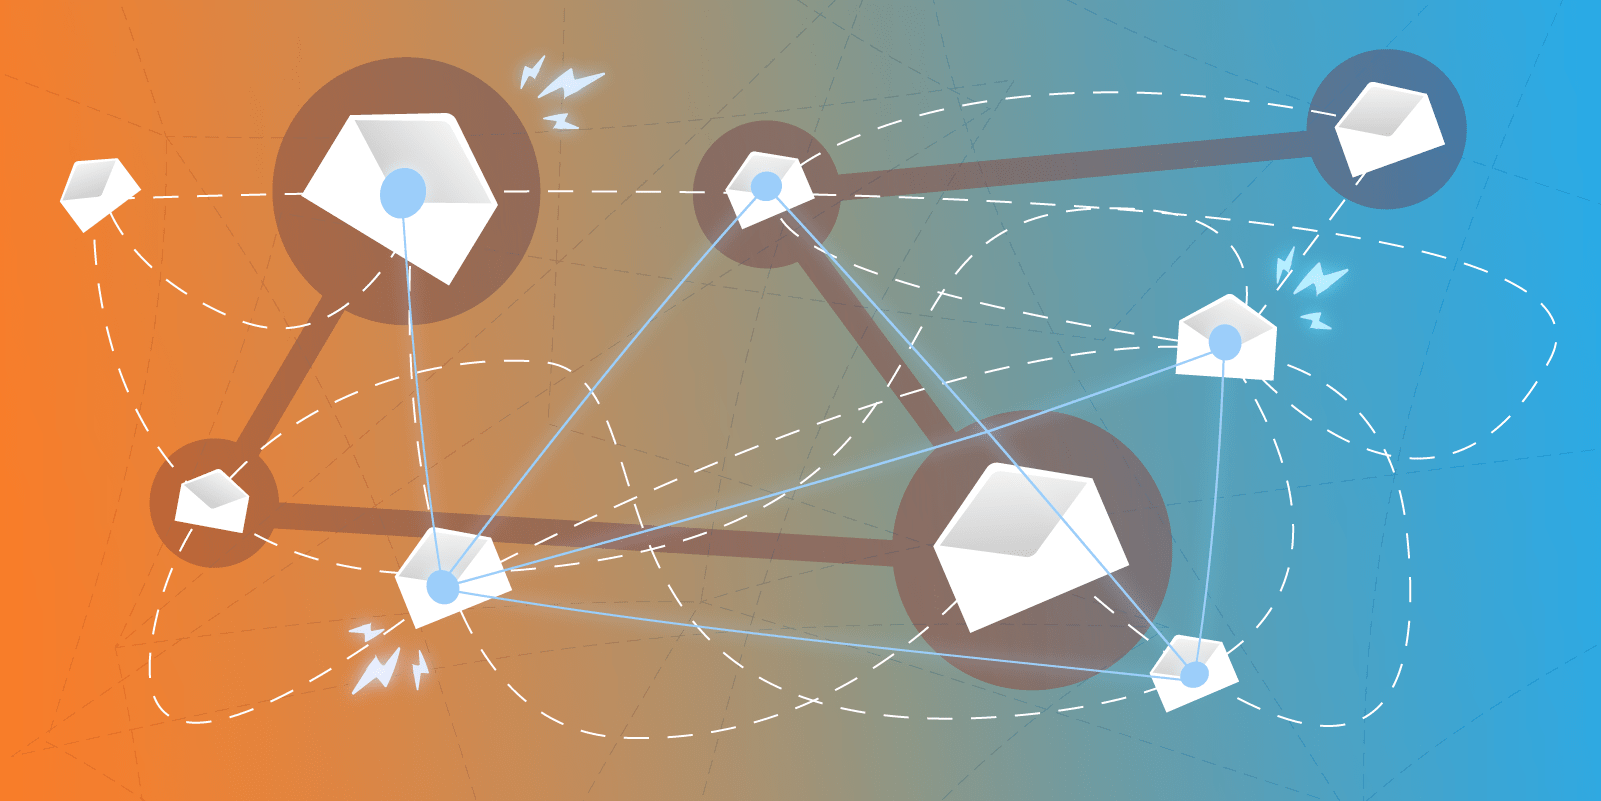

## ***7. ML Model Implementation***

### ML Model - 1 Implementing Logistic Regression

In [129]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [130]:
# Checking the coefficients
lr.coef_

array([[ 5.95663177e-01,  3.59097983e-01, -2.09271174e-02,
         4.23243887e-01,  2.91842613e-01,  4.26000466e-01,
         9.39790084e-01,  7.47238891e-01,  7.03541581e-01,
         5.75979768e-01,  9.35037638e-01, -6.67006483e-01,
         4.08715138e-02,  4.17707973e-03, -4.28261568e-02],
       [-1.94294429e-01,  1.11987551e-01, -4.53945808e-03,
        -2.22913852e-01,  1.47410047e-02,  1.35443424e-02,
         4.27035034e-02, -8.34375836e-02,  3.79077117e-02,
        -4.44491694e-03, -1.83749977e-01,  4.25811649e-01,
        -6.05954915e-04, -8.99965824e-03,  1.13202024e-01],
       [-4.01368747e-01, -4.71085534e-01,  2.54665755e-02,
        -2.00330035e-01, -3.06583618e-01, -4.39544808e-01,
        -9.82493588e-01, -6.63801307e-01, -7.41449293e-01,
        -5.71534851e-01, -7.51287661e-01,  2.41194834e-01,
        -4.02655589e-02,  4.82257851e-03, -7.03758667e-02]])

In [131]:
# Checking the intercept value
lr.intercept_

array([-0.95633806,  0.27651568,  0.67982239])

In [132]:
# Predict on the model
# Get the predicted probabilities
train_probability = lr.predict_proba(X_train)
test_probability = lr.predict_proba(X_test)

In [133]:
# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [134]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5301800060145208
The accuracy on test data is  0.5930220519722539


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[20703  4749  5584]
 [ 9658  9367 12011]
 [ 5861  5881 19294]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

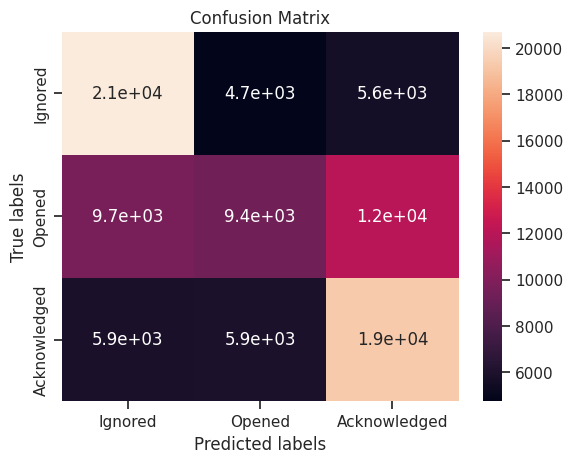

In [135]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5108 1199 1429]
 [ 605  472  491]
 [  95  112  148]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

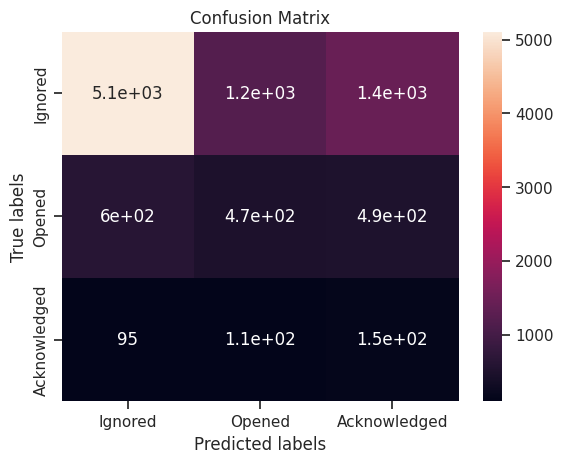

In [136]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [137]:
#train
#printing classification report
print(metrics.classification_report(y_pred_train, y_train))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_train = roc_auc_score(y_train, train_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_train : {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.67      0.57      0.62     36222
           1       0.30      0.47      0.37     19997
           2       0.62      0.52      0.57     36889

    accuracy                           0.53     93108
   macro avg       0.53      0.52      0.52     93108
weighted avg       0.57      0.53      0.54     93108

 
roc_auc_score_train : 0.7161178673236672


In [138]:
#test
#printing classification report
print(metrics.classification_report(y_pred, y_test))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_test = roc_auc_score(y_test, test_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_test : {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.66      0.88      0.75      5808
           1       0.30      0.26      0.28      1783
           2       0.42      0.07      0.12      2068

    accuracy                           0.59      9659
   macro avg       0.46      0.41      0.39      9659
weighted avg       0.54      0.59      0.53      9659

 
roc_auc_score_test : 0.687017060158568


I built the model using the logistic regression approach. Because of my poor results.

I discovered precision of 66%, recall of 58%, and a f1-score of 61% for emails that were omitted in the training sample. Email opened for class 2 received a precision of 31%, recollection of 46%, and f1-score of 37%, whereas email acknowledged for class 3 received a precision of 62%, recall of 52%, and f1-score of 57%. With a roc auc score of 71%, accuracy is 53%, average precision, recall, and f1_score are 53%, 52%, and 54%, respectively.

I discovered precision of 67%, recall of 88%, and a f1-score of 76% for emails that were disregarded in the test sample. Email opened for class 2 received precision of 31%, recall of 28%, and f1-score of 29%; email acknowledged for class 3 received precision of 47%, recall of 7%, and f1-score of 12%. With a roc auc score of 69%, accuracy is 60% and average precision, recall, and f1_score are 48%, 41%, and 39%, respectively.

#### 2. Cross- Validation & Hyperparameter Tuning

In [139]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(fit_intercept=True, max_iter=10000,
            class_weight='balanced',multi_class='multinomial')
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000000 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [140]:
# Predict on the model
# Get the predicted probabilities
train_probability2 = grid_result.predict_proba(X_train)
test_probability2 = grid_result.predict_proba(X_test)

In [141]:
# Predict on the model
# Get the predicted classes
y_pred_train2 = grid_result.predict(X_train)
y_pred2 = grid_result.predict(X_test)

In [142]:
#train
#printing classification report
print(metrics.classification_report(y_pred_train2, y_train))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_train = roc_auc_score(y_train, train_probability2,multi_class='ovr',average='weighted')
print(f"roc_auc_score_train : {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.67      0.57      0.62     36095
           1       0.30      0.47      0.37     20118
           2       0.62      0.52      0.57     36895

    accuracy                           0.53     93108
   macro avg       0.53      0.52      0.52     93108
weighted avg       0.57      0.53      0.54     93108

 
roc_auc_score_train : 0.7161247019434429


In [143]:
#test
#printing classification report
print(metrics.classification_report(y_pred2, y_test))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_test = roc_auc_score(y_test, test_probability2,multi_class='ovr',average='weighted')
print(f"roc_auc_score_test : {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.66      0.88      0.75      5795
           1       0.31      0.27      0.28      1802
           2       0.43      0.07      0.12      2062

    accuracy                           0.59      9659
   macro avg       0.46      0.41      0.39      9659
weighted avg       0.54      0.59      0.53      9659

 
roc_auc_score_test : 0.6875221603000516


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach. Cross-validation is done in GridSearchCV in addition to Grid Search. The model is trained using cross-validation.Because of this, I used the GridsearCV approach to optimise the hyperparameters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I discovered precision of 66%, recall of 57%, and a f1-score of 61% for emails that were omitted in the training sample. Email opened for class 2 received a precision of 30%, recall of 46%, and f1-score of 36%, whereas email acknowledged for class 3 received a precision of 63%, recall of 52%, and f1-score of 57%. With a roc auc score of 71%, accuracy is 53% and average precision, recall, and f1_score are 53%, 52%, and 52%, respectively.

I discovered precision of 67%, recall of 88%, and a f1-score of 76% for emails that were disregarded in the test sample. Email opened for class 2 received precision of 30%, recall of 28%, and f1-score of 29%; email acknowledged for class 3 received precision of 48%, recall of 7%, and f1-score of 12%. With a roc auc score of 69%, accuracy is 60% and average precision, recall, and f1_score are 48%, 41%, and 39%, respectively.

### ML Model - 2 Implementing Random Forest Classifier

In [144]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [146]:
# Predict on the model
# Get the predicted probabilities
train_probability3 = rf_model.predict_proba(X_train)
test_probability3 = rf_model.predict_proba(X_test)

In [147]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train3)
test_accuracy = accuracy_score(y_test,y_pred3)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9998496369807106
The accuracy on test dataset is 0.7423128688270008


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[31031     4     1]
 [    3 31031     2]
 [    0     4 31032]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

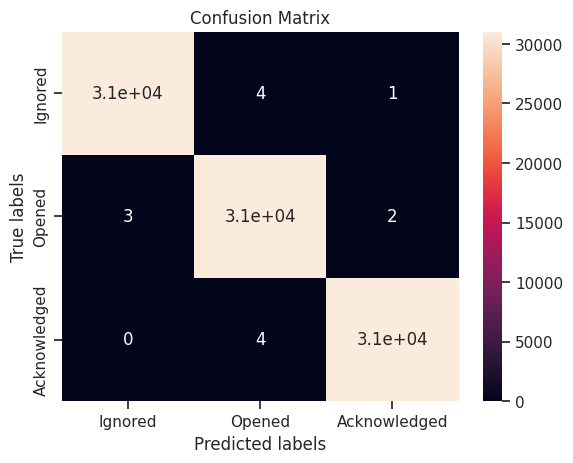

In [148]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6606  925  205]
 [ 902  519  147]
 [ 160  150   45]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

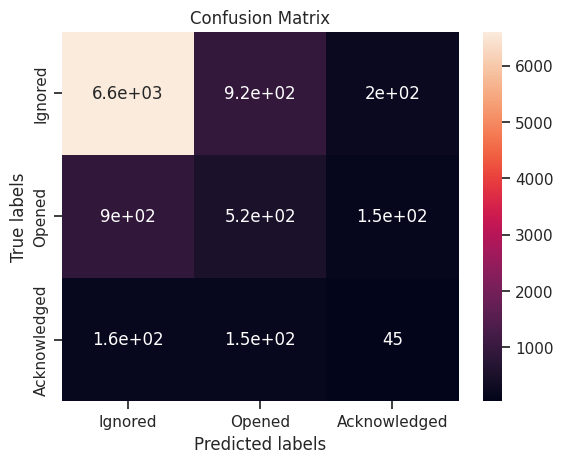

In [149]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [150]:
#result train
print(metrics.classification_report(y_pred_train3, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31034
           1       1.00      1.00      1.00     31039
           2       1.00      1.00      1.00     31035

    accuracy                           1.00     93108
   macro avg       1.00      1.00      1.00     93108
weighted avg       1.00      1.00      1.00     93108

 
roc_auc_score
0.9999980385506385


In [151]:
#test result
print(metrics.classification_report(y_pred3, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7668
           1       0.33      0.33      0.33      1594
           2       0.13      0.11      0.12       397

    accuracy                           0.74      9659
   macro avg       0.44      0.43      0.44      9659
weighted avg       0.74      0.74      0.74      9659

 
roc_auc_score
0.7305085673568734


We developed the model using the Random Forest technique. I saw overfitting as I arrived.

For the training dataset, I discovered 100% for everyone.

I discovered precision of 86%, recall of 86%, and a f1-score of 86% for emails that were disregarded in the test dataset. Email opened for class 2 received precision of 31%, recall of 33%, and f1-score of 32%; email acknowledged for class 3 received precision of 14%, recall of 10%, and f1-score of 12%. With a roc auc score of 71%, accuracy is 75% and average precision, recall, and f1_score are 44%, 43%, and 43%, respectively.


In [152]:
#finding important feature
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [153]:
#sorting in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
2                  Total_Past_Communications                0.20
3                                 Word_Count                0.16
1                      Subject_Hotness_Score                0.15
12  Percentage_of_words_that_are_links_image                0.15
13                           Images_per_link                0.12
14                          Images_plus_link                0.07
11                     Email_Campaign_Type_3                0.03
0                                 Email_Type                0.02
4                 Time_Email_sent_Category_2                0.02
5                 Time_Email_sent_Category_3                0.02
6                        Customer_Location_B                0.01
7                        Customer_Location_C                0.01
8                        Customer_Location_D                0.01
9                        Customer_Location_E                0.01
10                       Customer_Location_F                0.01

In [154]:
#finding importance
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

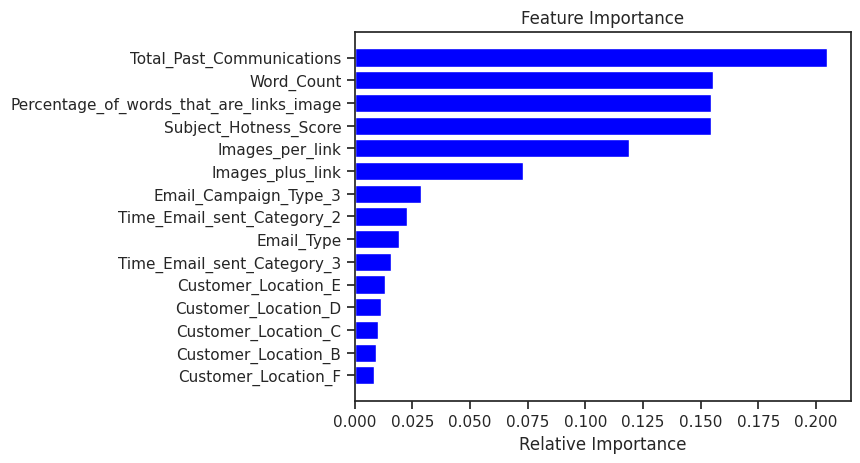

In [155]:
#plotting
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [5,10,15]

# Maximum depth of trees
max_depth = [2,2,3]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.2s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=5, min_sample

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 2, 3], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [5, 10, 15]},
             scoring='f1', verbose=2)

In [157]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: nan using {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 5}


In [158]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)


In [159]:
# Predict on the model
# Get the predicted probabilities
train_probability4 = rf_grid.predict_proba(X_train)
test_probability4 = rf_grid.predict_proba(X_test)

In [160]:
#result train
print(metrics.classification_report(y_pred_train4, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65     37225
           1       0.24      0.40      0.30     18667
           2       0.64      0.53      0.58     37216

    accuracy                           0.53     93108
   macro avg       0.53      0.51      0.51     93108
weighted avg       0.59      0.53      0.55     93108

 
roc_auc_score
0.7002485574377403


In [161]:
#test result
print(metrics.classification_report(y_pred4, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      6361
           1       0.18      0.19      0.19      1479
           2       0.56      0.11      0.18      1819

    accuracy                           0.63      9659
   macro avg       0.49      0.39      0.39      9659
weighted avg       0.61      0.63      0.58      9659

 
roc_auc_score
0.7117246771978066


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach. Cross-validation is done in GridSearchCV in addition to Grid Search. The model is trained using cross-validation.Because of this, I used the GridsearCV approach to optimise the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I discovered precision of 77%, recall of 57%, and f1-score of 66% for ignored emails in the training dataset. Email opened for class 2 received precision of 21%, recall of 45%, and f1-score of 28%; email acknowledged for class 3 received precision of 64%, recall of 54%, and f1-score of 59%. With a roc auc score of 74%, accuracy is 54%, average precision, recall, and f1_score are 54%, 52%, and 51%, respectively.

I discovered precision of 77%, recall of 88%, and a f1-score of 83% for emails that were disregarded in the test sample. Email opened for class 2 received a precision of 19%, recall of 27%, and f1-score of 22%; email acknowledged for class 3 received a precision of 57%, recall of 10%, and f1-score of 17%. With a roc auc score of 74%, accuracy is 67% and average precision, recall, and f1_score are 51%, 42%, and 41%, respectively.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

The metrics I utilised to gauge the model's effectiveness and its effects on business are as follows:

**Accuracy**

**Preciseness**

**Recall**

**F1 score**

**The ROC AUC**

In conclusion, the Random Forest Classifier can be viewed as an effective model for the business, particularly when it receives high scores in each of these evaluation metrics, demonstrating its ability to accurately predict outcomes, recognise all positive instances, and correctly classify instances as positive or negative.


### ML Model - 3 Implementing XgBoost Classifier

In [162]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [163]:
# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [164]:
# Predict on the model
# Get the predicted probabilities
train_probability5 = xg_models.predict_proba(X_train)
test_probability5 = xg_models.predict_proba(X_test)

In [165]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train5)
test_accuracy = accuracy_score(y_test,y_pred5)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8437406023112944
The accuracy on test dataset is 0.7867274044932188


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[29514  1035   487]
 [ 3877 21156  6003]
 [  697  2450 27889]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

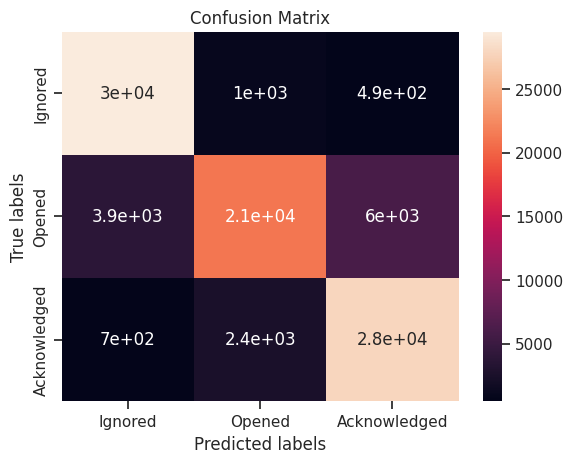

In [166]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7206  374  156]
 [1071  342  155]
 [ 197  107   51]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

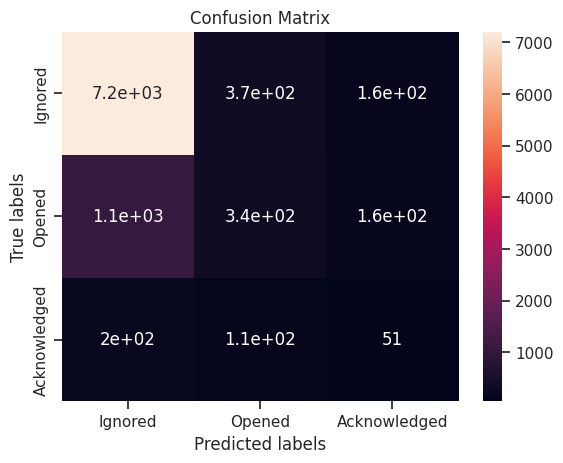

In [167]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [168]:
#result train
print(metrics.classification_report(y_pred_train5, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     34088
           1       0.68      0.86      0.76     24641
           2       0.90      0.81      0.85     34379

    accuracy                           0.84     93108
   macro avg       0.84      0.85      0.84     93108
weighted avg       0.86      0.84      0.85     93108

 
roc_auc_score
0.9513844828373402


In [169]:
#test result
print(metrics.classification_report(y_pred5, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8474
           1       0.22      0.42      0.29       823
           2       0.14      0.14      0.14       362

    accuracy                           0.79      9659
   macro avg       0.43      0.47      0.44      9659
weighted avg       0.84      0.79      0.81      9659

 
roc_auc_score
0.7548201752577501


I observed precision of 95%, recall of 85%, and a f1-score of 90% for emails that were omitted in the training dataset. Email opened for class 2 received a precision of 62%, recall of 82%, and f1-score of 70%. Email acknowledged for class 3 received a precision of 87%, recall of 77%, and f1-score of 82%. With a roc auc score of 93%, accuracy is 81%, while average precision, recall, and f1_score are 81%, 81%, and 81%, respectively.

I obtained precision of 93%, recall of 85%, and a f1-score of 89% for emails that were disregarded in the test sample. Email opened for class 2 received precision of 19%, recall of 41%, and f1-score of 26%; email acknowledged for class 3 received precision of 13%, recall of 12%, and f1-score of 13%. With a roc auc score of 75%, accuracy is 79% and average precision, recall, and f1_score are 42%, 46%, and 43%, respectively.


#### 2. Cross- Validation & Hyperparameter Tuning

In [170]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [5,10,15]

# Maximum depth of trees
max_depth = [2,2,3]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[09:33:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   1.8s
[09:33:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.8s
[09:33:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.6s
[09:33:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=5; total time=   0.6s
[09:33:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_sam

In [171]:
#best parameter
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 5}


In [172]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6 = xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [173]:
# Predict on the model
# Get the predicted probabilities
train_probability6 = xg_grid1.predict_proba(X_train)
test_probability6 = xg_grid1.predict_proba(X_test)

In [174]:
#result train
print(metrics.classification_report(y_pred_train6, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.72      0.59      0.64     37933
           1       0.17      0.46      0.25     11823
           2       0.71      0.51      0.59     43352

    accuracy                           0.53     93108
   macro avg       0.53      0.52      0.50     93108
weighted avg       0.64      0.53      0.57     93108

 
roc_auc_score
0.7237356507798017


In [175]:
#test result
print(metrics.classification_report(y_pred6, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6185
           1       0.17      0.26      0.20      1016
           2       0.67      0.10      0.17      2458

    accuracy                           0.63      9659
   macro avg       0.52      0.42      0.39      9659
weighted avg       0.65      0.63      0.57      9659

 
roc_auc_score
0.7521015456295901


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV, which finds the ideal hyperparameters to improve the model's performance using the Grid Search approach. Cross-validation is done in GridSearchCV in addition to Grid Search. The model is trained using cross-validation.Because of this, I used the GridsearCV approach to optimise the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I discovered precision of 77%, recall of 69%, and a f1-score of 73% for emails that were omitted in the training sample. Email opened for class 2 received a precision of 33%, recall of 55%, and f1-score of 42%; email acknowledged for class 3 received a precision of 74%, recall of 58%, and f1-score of 65%. With an average precision, recall, and f1_score of 62%, 61%, and 60%, respectively, and a roc auc score of 80%, accuracy is 62%.

I discovered precision of 77%, recall of 89%, and a f1-score of 82% for emails that were disregarded in the test sample. Email opened for class 2 received precision of 28%, recall of 31%, and f1-score of 30%; email acknowledged for class 3 received precision of 48% and recall of 10% and a 16% f1-score With a roc auc score of 74%, accuracy is 68% and average precision, recall, and f1_score are 51%, 43%, and 43%, respectively.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The following evaluation metrics would be taken into account for a beneficial business impact when analysing an email campaign's effectiveness in a categorization model:

* **Precision**: Out of all positive predictions made by the model, this indicator represents the percentage of real positive forecasts (emails that were opened and produced the desired action).

* **Recall**: This measure shows the percentage of emails that were opened and led to the desired action that were actually true positive predictions (out of all emails that were opened and led to the desired action).

* **F1 Score**: This metric balances the trade-off between precision and recall by combining the two.

* **ROC AUC**: This metric demonstrates the model's capacity to differentiate between positive and negative instances.

**Precision, recall**, which together give F1 score, are the evaluation criteria that would be taken into account for a positive business impact of an email campaign effectiveness in a categorization model. These metrics would show how well the model could identify people who were most likely to participate in the campaign, as well as identify everyone who participated and appropriately categorise incidents as positive or negative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I've selected the hyperparameter-optimized XGBoost model. As a result, I employed Random Forest and XgBoost algorithms for increased accuracy. So I experimented with XGBoost and Random Forest. I want to compare these evaluation measures of theirs.

**Hypertuned Random Forest Classifier**⚡

---

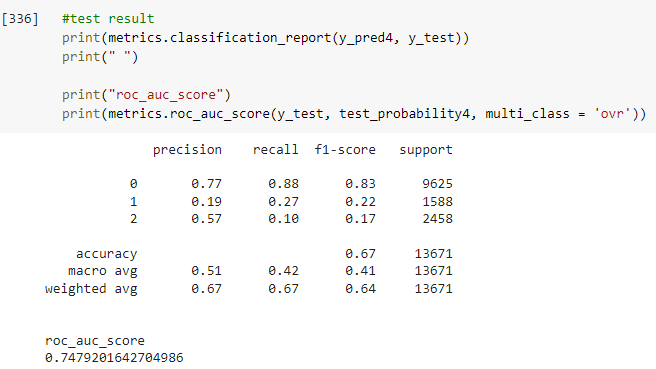

---

**Hypertuned XgBoost Classifier**⚡

---
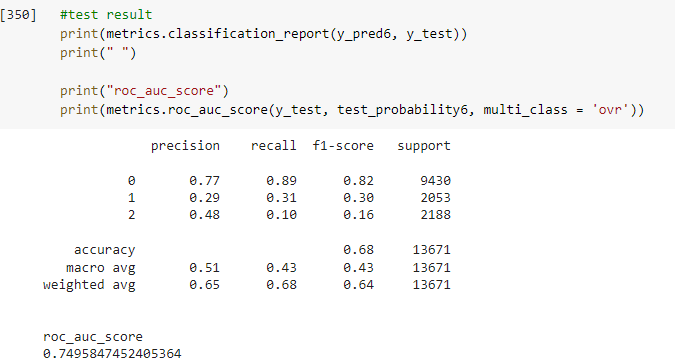

We can easily observe from the image above that XGBoost outperformed random forest in terms of f1_score. Additionally enhanced for xg boost are accuracy and roc auc score. Even with average precision and f1_score scores, the recall, precision, and f1_score are all low. It is greater for xgboost than for random forest. Plus

As a result, I have decided that XGBoost should be used as the last prediction model before actual user engagement.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

It is clear that XGBoost has beaten Random Forest in terms of accuracy, roc auc score, and f1_score when comparing the performance of the two models on different assessment measures.

In comparison to Random Forest, XGBoost has higher recall, precision, and f1_score. As a result, XGBoost has been chosen as the final prediction model for actual user interaction after extensive deliberation.

This choice was selected because the model performed better on the aforementioned measures.


# **Conclusion**

* The customer location function enables us to see that the percentage of emails that are ignored, read, and acknowledged is largely consistent across locations. Additionally, it indirectly affects our aim variable. To avoid the notion that someone's location affects whether they read, acknowledge, or ignore our emails would be better.


* Even though only a small number of emails were sent, according to the Email Campaign Type feature, Campaign Type 1 had a very high likelihood of being viewed. Most emails sent as part of email campaign type 2 were not opened. Campaign 3 looks to have been successful since, despite the fact that fewer emails were sent during this campaign, more of them were viewed and acknowledged.


* The time the email was sent cannot be considered a relevant aspect when classifying emails. Both the significance of the trait and this particular instance proved it. Emails in category 2 sent in the middle of the day will surely be viewed and acknowledged more than emails in categories 1 and 2 sent during the same time period.


* When we review all of the previous correspondence, we may observe that more emails are viewed and acknowledged when there are more of them. All that is necessary in this case is to establish a relationship with your clients.


* The more words an email has, the more likely it is to be ignored. We ignore emails that are too long.


* More images were included in emails that were deleted.


* All continuous variables, with the exception of Word Count, contained outliers. After examination, it was determined that outliers make up more than 5% of the minority data and have the potential to skew the results either way, making it better to keep them in.


* Information loss is possible even though SMOTE looks to have done significantly better.


* The XGBoost technique performed as well as it could given the uneven data and outliers, with the Random Forest Hyperparameter Tuned model coming in second with an F1 Score of 0.68 on the test set.
